In [5]:
import os
import sys
import pprint
import inspect
# Get current working directory instead of __file__
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
trait_model_path = os.path.abspath(os.path.join(os.getcwd(), "..", "TraitPredictionModel"))
sys.path.append(trait_model_path)
from modelFunc import setAndTestPlotModel, setAndTestPlotModel_with_extra_input, setAndTestModelByDate, run_test_and_save_results, run_test_and_save_results_with_extra_input
# model
from ModelArchitecture.ConvNeXtTinyModel import ConvNeXtTinyWheatModelWithConfidence
from ModelArchitecture.DenseNetModel import DenseNet121WheatModel
from ModelArchitecture.EfficientNetV2Model import EfficientNetV2SWheatCountWithConfidence
from ModelArchitecture.RepVGGA1Model import RepVGGA1WheatModelWithConfidence
from ModelArchitecture.EfficientNetV2MModel import EfficientNetV2MWheatModelWithConfidence
from ModelArchitecture.RepVGGB1g4Model import RepVGGB1g4Model
from ModelArchitecture.RegNetY8GFModel import RegNetY8GFModel
from ModelArchitecture.MobileViTV2Model import MobileViTV2WheatModel
from ModelArchitecture.MobileViTV2AddoneextrainputModel import MobileViTV2ConfidenceAddoneextrainput, MobileViTV2ConfidenceAddtwoextrainput
from ModelArchitecture.ConvNeXtTinyAddoneextrainputModel import ConvNeXtTinyConfidenceAddoneextrainput, ConvNeXtTinyConfidenceAddtwoextrainput
from ModelArchitecture.EfficientNetV2SAddextrainputModel import EfficientNetV2SConfidenceAddoneextrainput, EfficientNetV2SConfidenceAdd2Inputs
from ModelArchitecture.DenseNetAddextrainputModel import DenseNetConfidenceAddoneextrainput, DenseNetConfidenceAdd2Inputs
from ModelArchitecture.RepVGGA1AddextrainputModel import RepVGGA1ConfidenceAddoneextrainput, RepVGGA1ConfidenceAdd2Inputs
from ModelArchitecture.EfficientNetV2MAddextrainputModel import EfficientNetV2MConfidenceAddeonextrainput, EfficientNetV2MConfidenceAdd2Inputs
from ModelArchitecture.RegNetY8GFAddextrainputModel import RegNetY8GFConfidenceAddoneextrainput, RegNetYConfidenceAdd2Inputs
from ModelArchitecture.MobileOneModel import MobileOneConfidence, MobileOneConfidenceAddoneextrainput, MobileOneConfidenceAddtwoextrainput
from ModelArchitecture.MaxViTModel import MaxViTConfidenceModel, MaxViTConfidenceAddoneextrainput, MaxViTConfidenceAddtwoextrainput
from ModelArchitecture.CoatNetModel import CoAtNetConfidenceModel, CoAtNetConfidenceAddOneExtraInput, CoAtNetConfidenceAddTwoExtraInput
from ModelArchitecture.FocalNetModel import FocalNetConfidenceModel, FocalNetConfidenceAddoneextrainput, FocalNetConfidenceAddtwoextrainput
from ModelArchitecture.SwinTransformerV2Model import SwinV2ConfidenceModel, SwinV2ConfidenceAddOneExtraInput, SwinV2ConfidenceAddTwoExtraInput
from ModelArchitecture.EfficientFormerV2Model import EfficientFormerConfidenceModel, EfficientFormerConfidenceAddOneExtraInput, EfficientFormerConfidenceAddTwoExtraInput
from ModelArchitecture.PoolFormerModel import PoolFormerConfidenceModel, PoolFormerConfidenceAddOneExtraInput, PoolFormerConfidenceAddTwoExtraInput
from ModelArchitecture.ConvNeXtV2Model import ConvNeXtV2WheatModelWithConfidence, ConvNeXtV2ConfidenceAddoneextrainput, ConvNeXtV2ConfidenceAddtwoextrainput

In [6]:
current2025Data = ['totEarNum', 'days', 'LAI', 'SPAD']

# run_test_and_save_results_with_extra_input(dataPath, modelTarget, modelDict[modelBackbone], modelPath, extraInpList)
# run_test_and_save_results(dataPath, modelTarget, modelDict[modelBackbone], modelPath)

In [7]:
def get_imported_class_dict():
    current_module = sys.modules[__name__]
    return {
        name: obj
        for name, obj in globals().items()
        if inspect.isclass(obj) and obj.__module__ != current_module.__name__
    }
modelDict = get_imported_class_dict()

def loopTestModelNoExtraByPath(modelFilePath):

    countModel = 0
    for fullModelName in sorted(os.listdir(modelFilePath)):

        # check if not .gitkeep file
        if( fullModelName == ".gitkeep" or fullModelName[0] == '.' ):
            continue

        modelPath = modelFilePath + fullModelName

        modelTarget = (fullModelName.split("_")[0])
        if( modelTarget not in current2025Data ):
            continue
        
        modelDict = get_imported_class_dict()
        modelBackbone = (fullModelName.split("_")[1])
        countModel += 1

        if(modelTarget == 'LAI'):
            dataPath = "./2025_LAI_Raw1.csv"
            # continue
        elif(modelTarget == 'SPAD'):
            dataPath = "./2025_SPAD_Raw1.csv"
            # continue
        elif(modelTarget == 'days'):
            dayData = fullModelName.split('_')[-1].split('.')[0]
            if(dayData == "noERR"):
                dataPath = "./2025_SPAD_Raw1.csv"
                # continue
            elif(dayData == "from3"):
                dataPath = "./2025_SPAD_Raw1.csv"
                # continue
            elif(dayData == "from4"):
                dataPath = "./2025_LAI_From4_Raw1.csv"
                # continue
            print(countModel)
            print("modelPath: ", modelPath)
            print("dataPath: ", dataPath)
            print("modelTarget: ", modelTarget)
            print("modelBackbone: ", modelBackbone)
            run_test_and_save_results(dataPath, modelTarget, modelDict[modelBackbone], modelPath,
                                      result_csv_path = "./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv",
                                      output_dir = "./ModelTestResult/NoExtraInputModel/growthPredictions/predictions",
                                      plot_dir = "./ModelTestResult/NoExtraInputModel/growthPredictions/plots",
                                      daysData = dayData, 
                                      use_all_data_as_test=True)
            continue

        else:
            dataPath = "./2025_totEarNum_day_Raw1.csv"
            # continue
            

        
        print(countModel)
        print("modelPath: ", modelPath)
        print("dataPath: ", dataPath)
        print("modelTarget: ", modelTarget)
        print("modelBackbone: ", modelBackbone)
        run_test_and_save_results(dataPath, modelTarget, modelDict[modelBackbone], modelPath,
                                      result_csv_path = "./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv",
                                      output_dir = "./ModelTestResult/NoExtraInputModel/growthPredictions/predictions",
                                      plot_dir = "./ModelTestResult/NoExtraInputModel/growthPredictions/plots", 
                                      use_all_data_as_test=True)

def loopTestModelExtraInputByPath(modelFilePath):

    countModel = 0
    for fullModelName in sorted(os.listdir(modelFilePath)):
        
        # check if not .gitkeep file
        if( fullModelName == ".gitkeep" or fullModelName[0] == '.' ):
            continue

        modelPath = modelFilePath + fullModelName

        modelTarget = (fullModelName.split("_")[0])
        if( modelTarget not in current2025Data ):
            continue

        modelDict = get_imported_class_dict()
        modelBackbone = fullModelName.split("_")[1]

        extraInputList = fullModelName.split("_")[2].split('-')

        skip = False
        for extraInput in extraInputList:
            if(extraInput not in current2025Data):
                # print(fullModelName)
                skip = True
                continue
        if(skip):
            continue

        if("LAI" == modelTarget or "LAI" in extraInputList):
            dataPath = "./2025_LAI_Raw1.csv"
        elif("SPAD" == modelTarget or "SPAD" in extraInputList):
            dataPath = "./2025_SPAD_Raw1.csv"
        else:
            dataPath = "./2025_totEarNum_day_Raw1.csv"
        
        countModel += 1
        print(countModel, "/ 78")
        print("modelPath: ", modelPath)
        print("dataPath: ", dataPath)
        print("modelTarget: ", modelTarget)
        print("modelBackbone: ", modelBackbone)
        run_test_and_save_results_with_extra_input(dataPath, modelTarget, modelDict[modelBackbone], modelPath, extraInputList, use_all_data_as_test=True)


        



1
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/LAI_CoAtNetConfidenceModel_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  CoAtNetConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing: 100%|██████████| 38/38 [00:20<00:00,  1.82it/s]



Test Results:
R² Score : -30.2877
MAE      : 7.8611
RMSE     : 7.9990


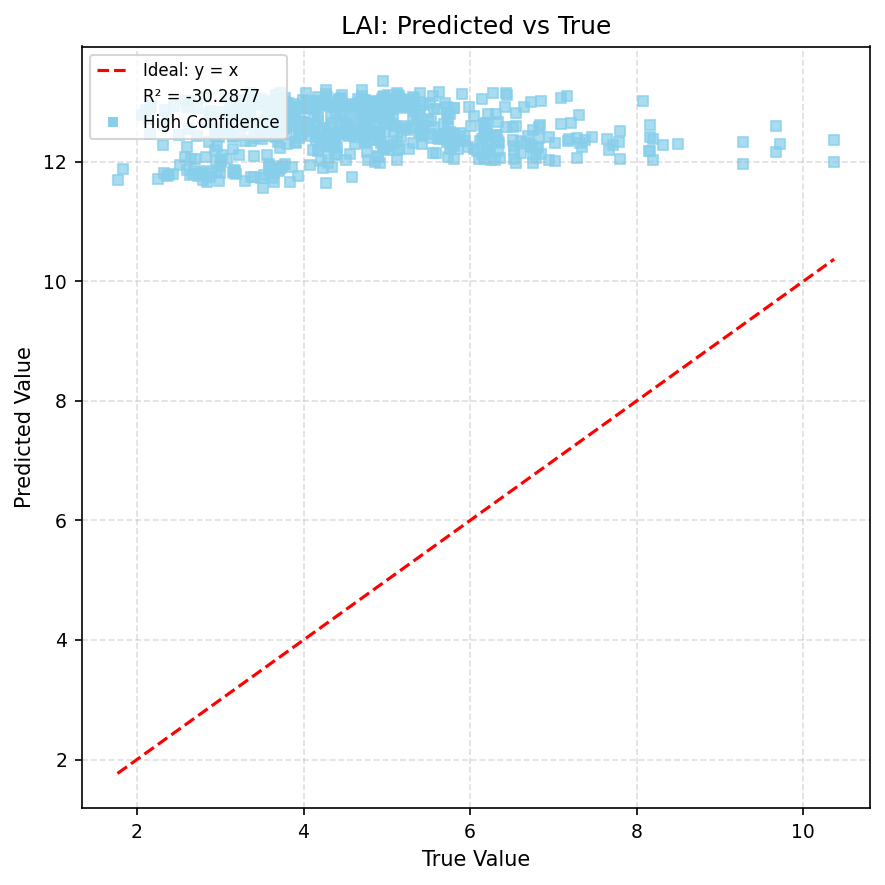


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
2
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/LAI_ConvNeXtTinyWheatModelWithConfidence_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  ConvNeXtTinyWheatModelWithConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing: 100%|██████████| 38/38 [00:20<00:00,  1.87it/s]



Test Results:
R² Score : -81.3767
MAE      : 12.9002
RMSE     : 12.9792


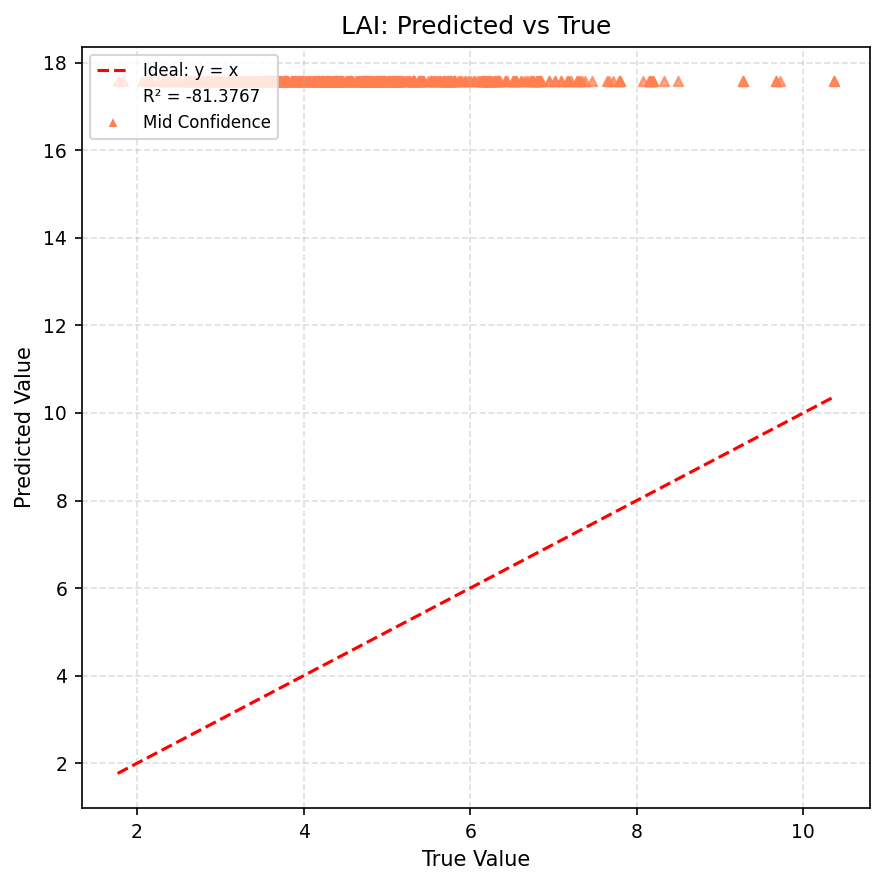


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
3
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/LAI_DenseNet121WheatModel_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  DenseNet121WheatModel
Using device: cuda


c:\Users\Crop2024_GA\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Crop2024_GA\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing: 100%|██████████| 38/38 [00:20<00:00,  1.86it/s]



Test Results:
R² Score : -25.9423
MAE      : 7.2759
RMSE     : 7.4227


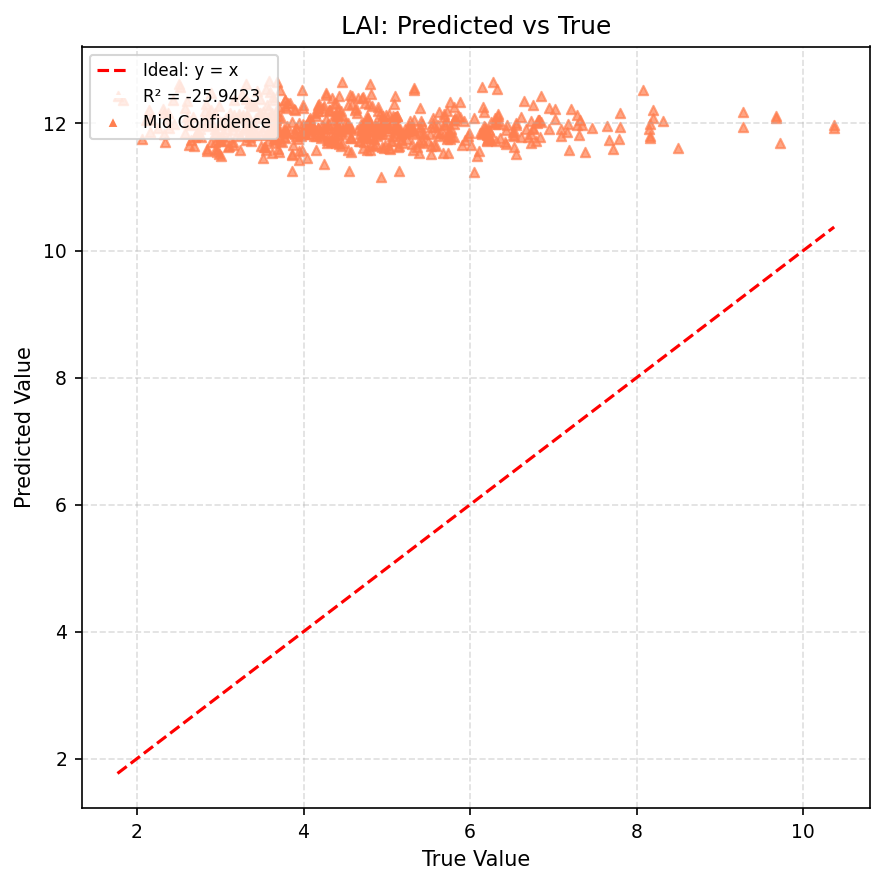


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
4
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/LAI_EfficientFormerConfidenceModel_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  EfficientFormerConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]



Test Results:
R² Score : -0.0946
MAE      : 1.1709
RMSE     : 1.4961


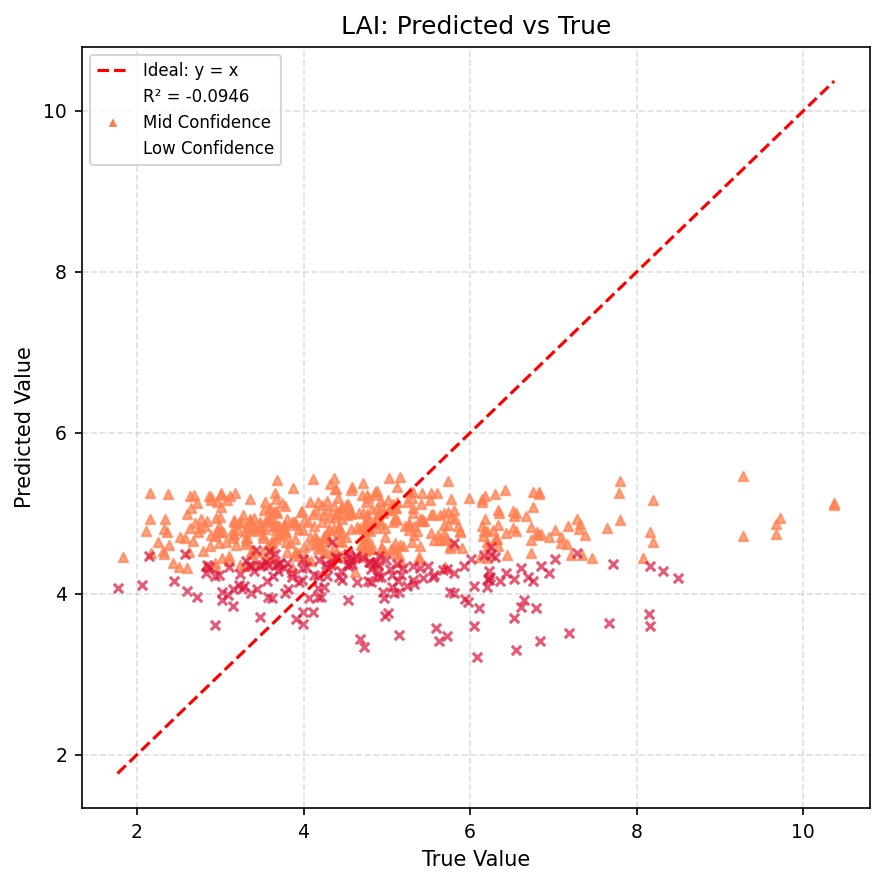


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
5
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/LAI_EfficientNetV2MWheatModelWithConfidence_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  EfficientNetV2MWheatModelWithConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]



Test Results:
R² Score : -0.6382
MAE      : 1.5092
RMSE     : 1.8303


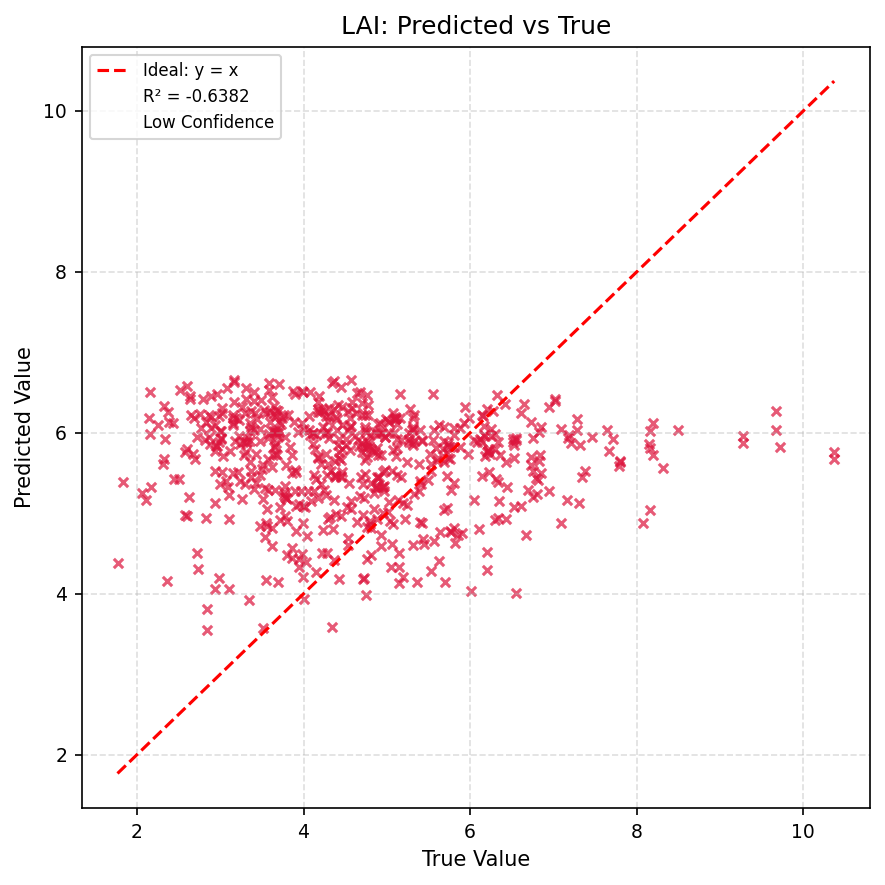


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
6
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/LAI_FocalNetConfidenceModel_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  FocalNetConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing: 100%|██████████| 38/38 [00:19<00:00,  1.90it/s]



Test Results:
R² Score : -21.1875
MAE      : 6.5824
RMSE     : 6.7360


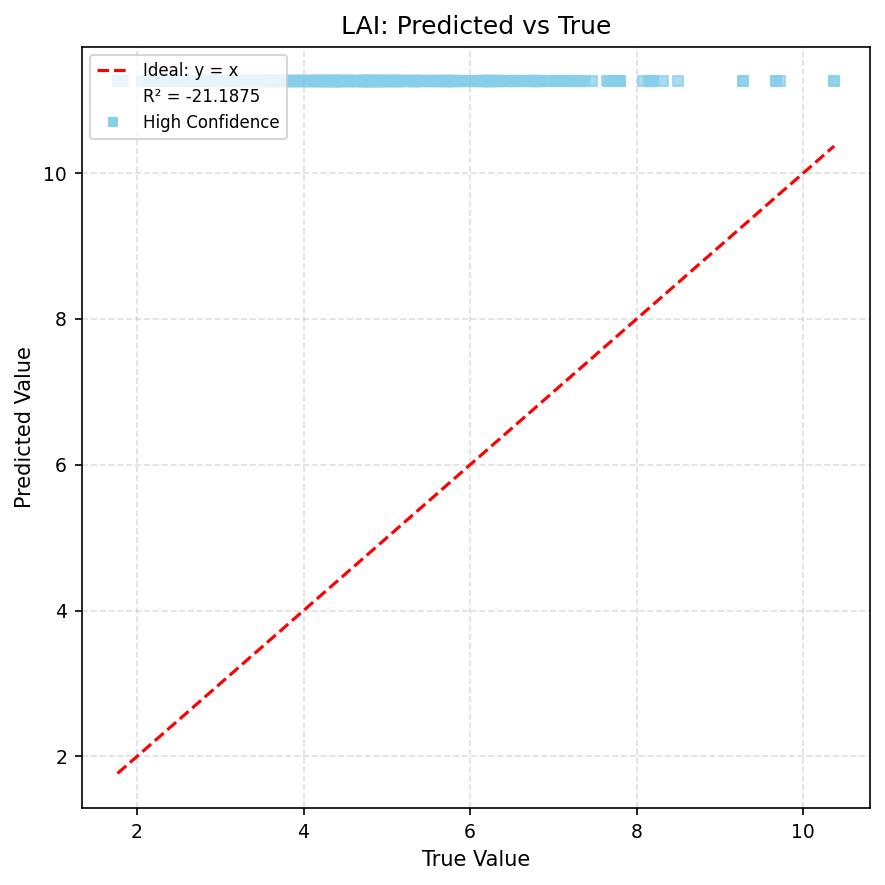


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
7
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/LAI_MaxViTConfidenceModel_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  MaxViTConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]



Test Results:
R² Score : -21.9624
MAE      : 6.6882
RMSE     : 6.8526


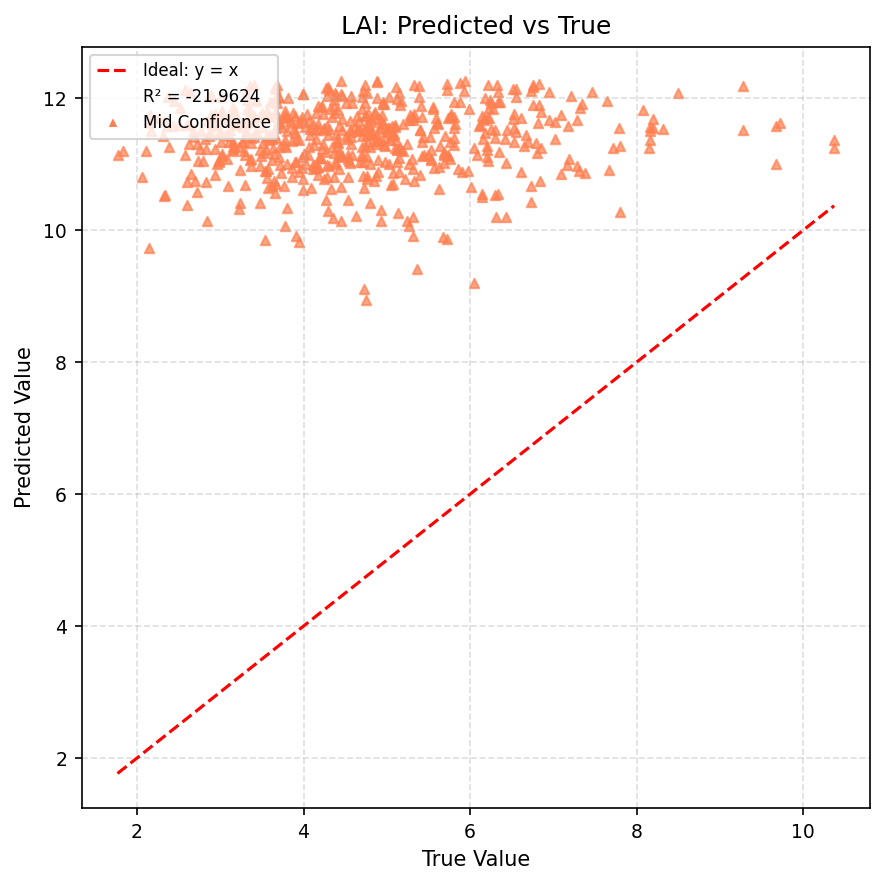


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
8
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/LAI_MobileOneConfidence_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  MobileOneConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]



Test Results:
R² Score : -41.8180
MAE      : 9.2224
RMSE     : 9.3575


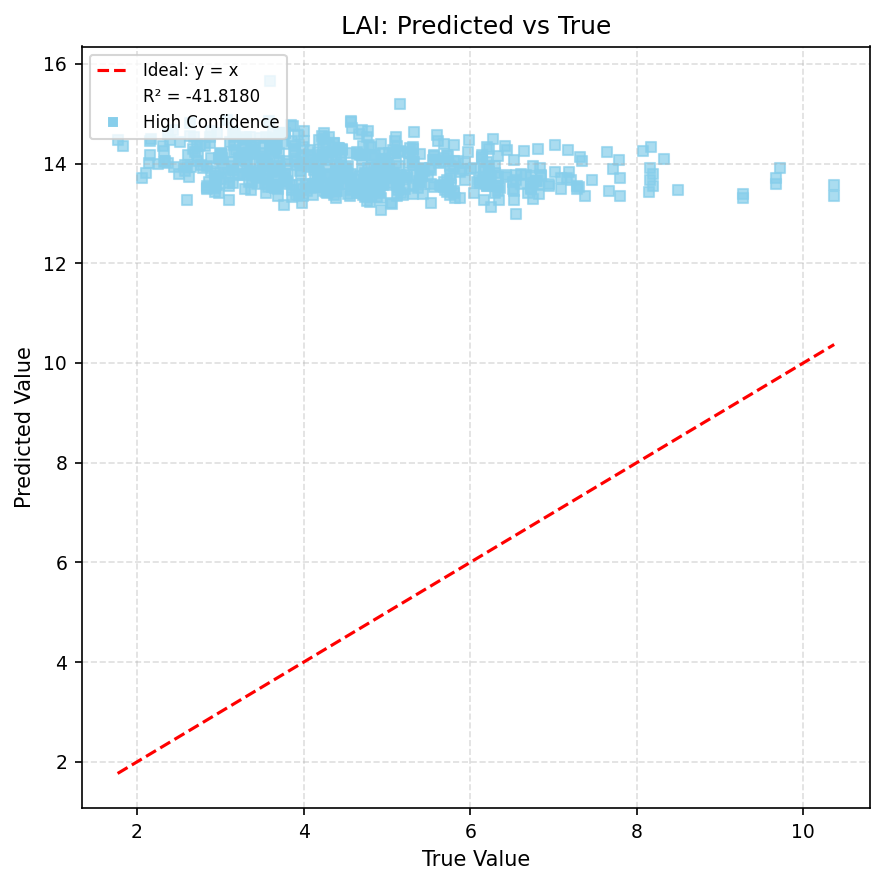


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
9
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/LAI_MobileViTV2WheatModel_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  MobileViTV2WheatModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]



Test Results:
R² Score : -0.5329
MAE      : 1.4946
RMSE     : 1.7705


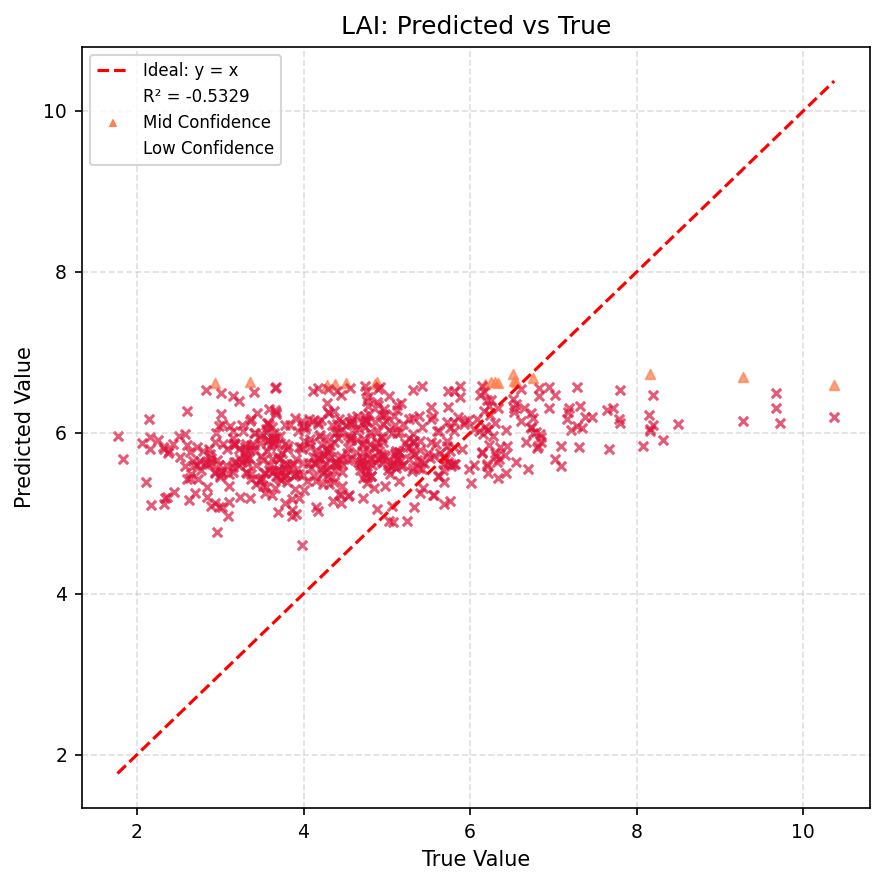


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
10
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/LAI_PoolFormerConfidenceModel_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  PoolFormerConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing: 100%|██████████| 38/38 [00:20<00:00,  1.83it/s]



Test Results:
R² Score : -42.2602
MAE      : 9.2773
RMSE     : 9.4057


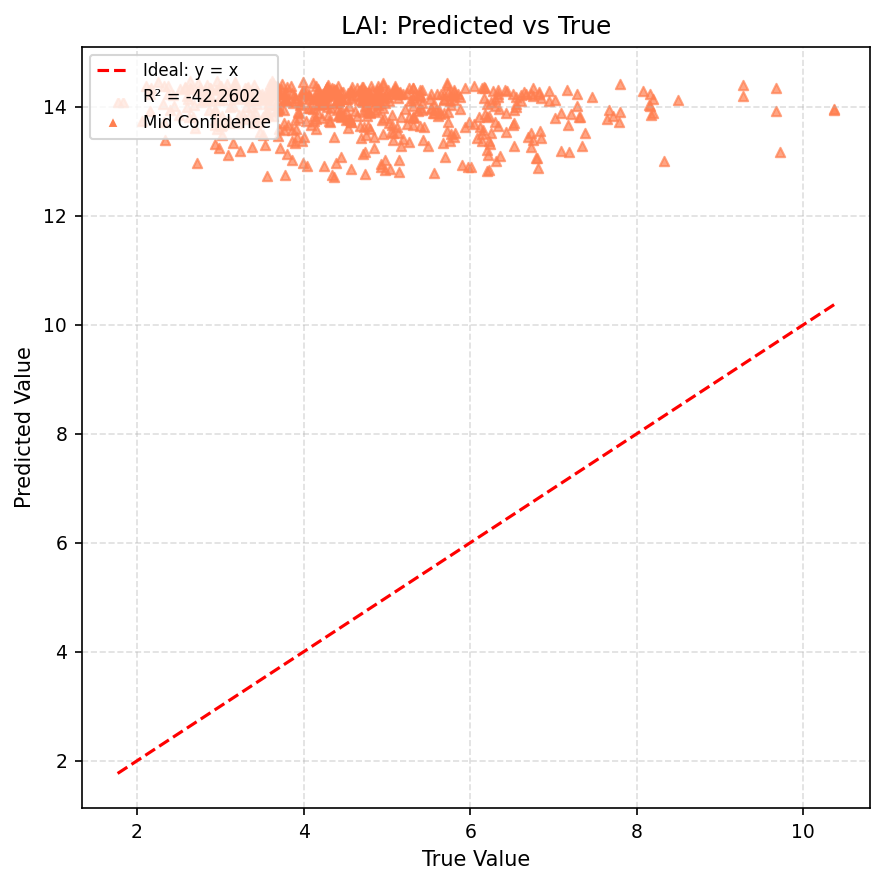


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
11
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/LAI_RegNetY8GFModel_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  RegNetY8GFModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing: 100%|██████████| 38/38 [00:21<00:00,  1.78it/s]



Test Results:
R² Score : -20.8609
MAE      : 6.5140
RMSE     : 6.6862


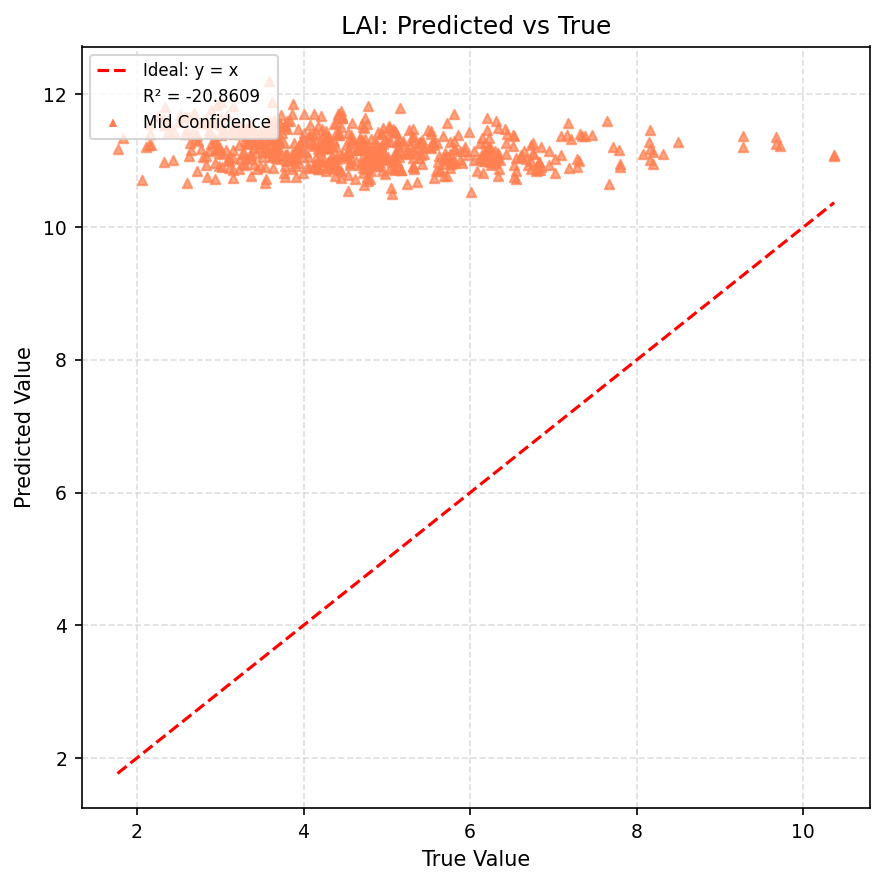


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
12
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/LAI_RepVGGB1g4Model_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  RepVGGB1g4Model
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing: 100%|██████████| 38/38 [00:20<00:00,  1.84it/s]



Test Results:
R² Score : -5.0408
MAE      : 3.1571
RMSE     : 3.5148


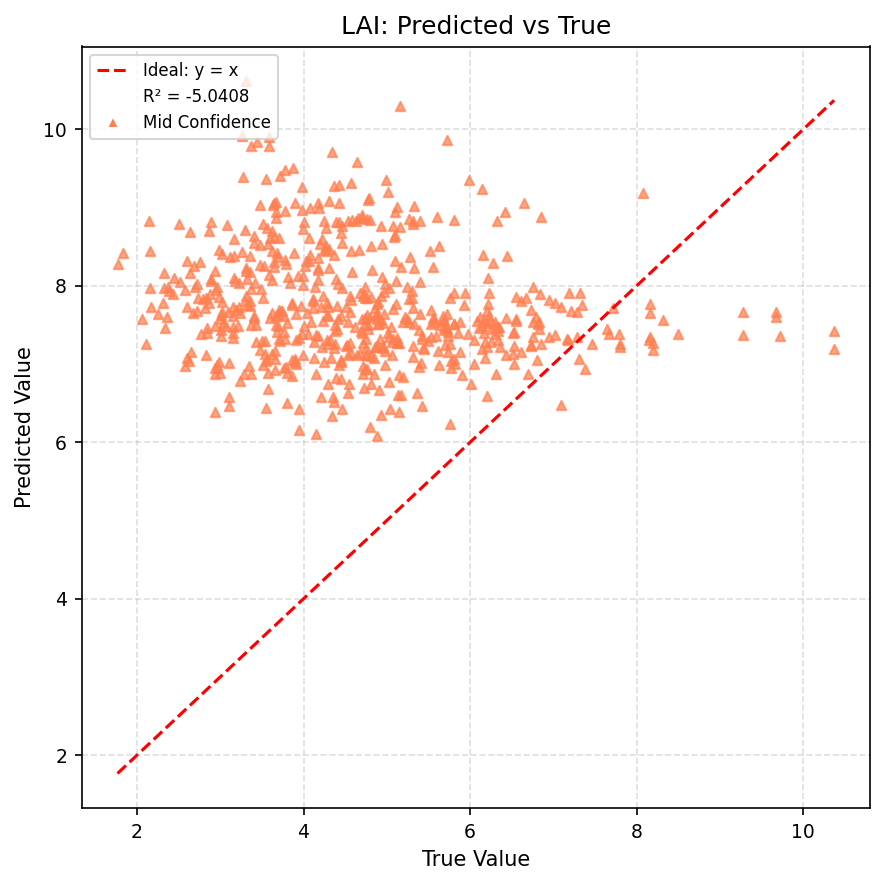


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
13
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/LAI_SwinV2ConfidenceModel_raw1.pth
dataPath:  ./2025_LAI_Raw1.csv
modelTarget:  LAI
modelBackbone:  SwinV2ConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 600
Test-Only → Test Batches: 38


Testing: 100%|██████████| 38/38 [00:20<00:00,  1.86it/s]



Test Results:
R² Score : -32.6449
MAE      : 8.1715
RMSE     : 8.2948


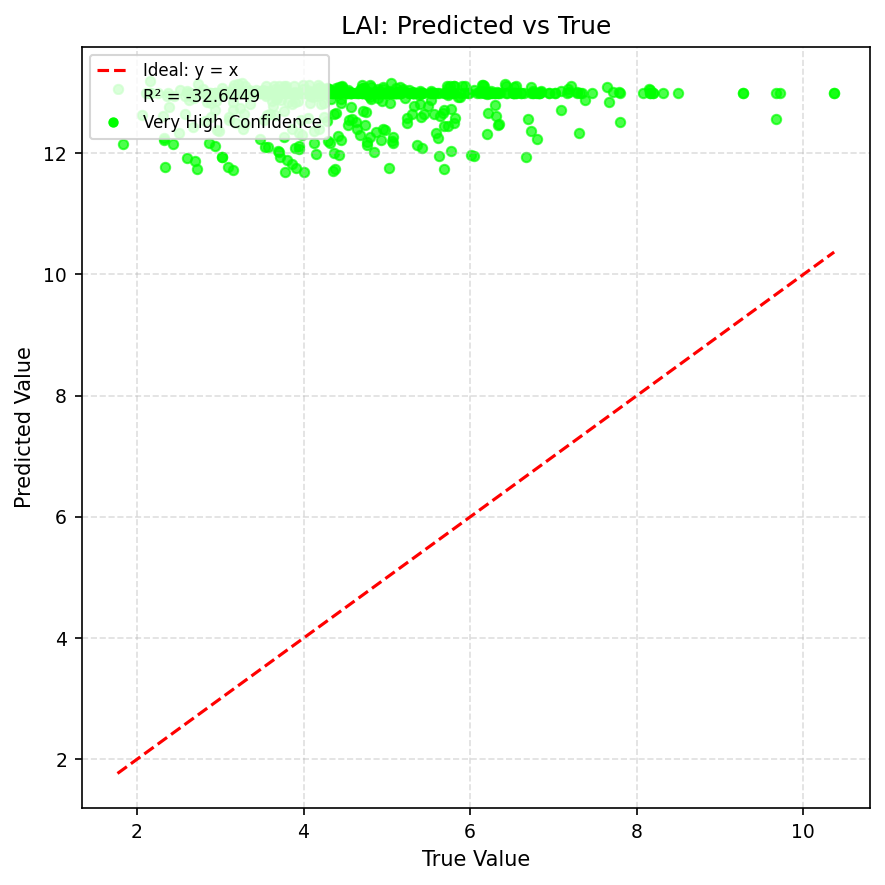


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
14
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/SPAD_CoAtNetConfidenceModel_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  CoAtNetConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:23<00:00,  2.43it/s]



Test Results:
R² Score : 0.0370
MAE      : 7.5974
RMSE     : 9.9819


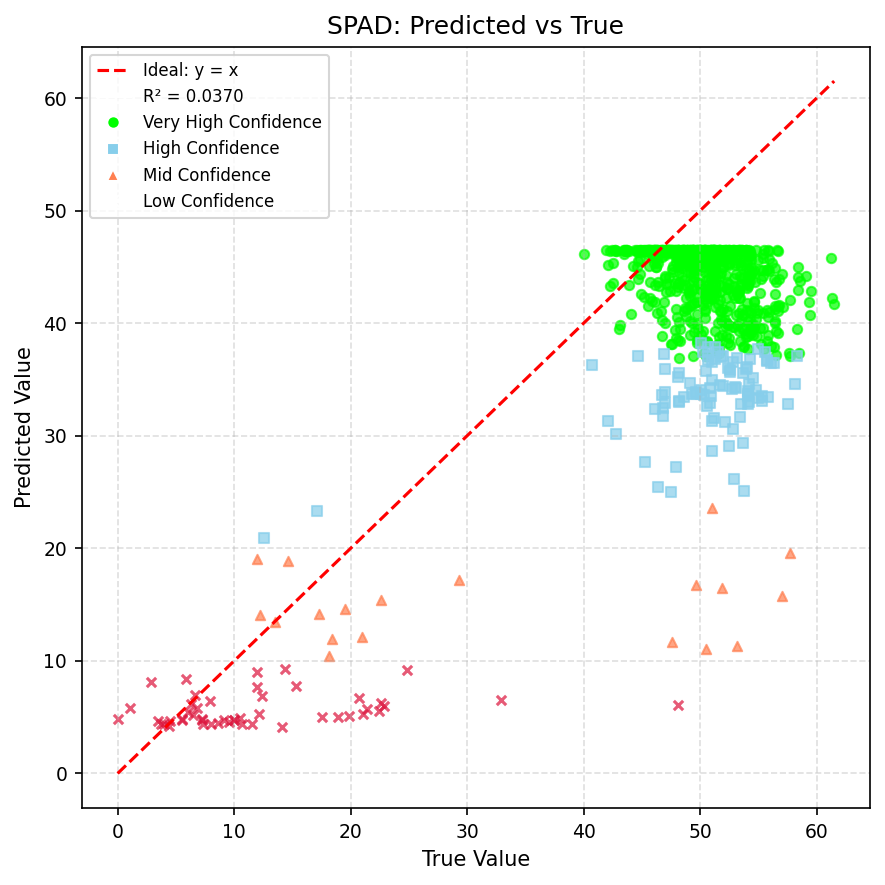


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
15
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/SPAD_ConvNeXtTinyWheatModelWithConfidence_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  ConvNeXtTinyWheatModelWithConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.61it/s]



Test Results:
R² Score : -0.0034
MAE      : 5.8390
RMSE     : 10.1893


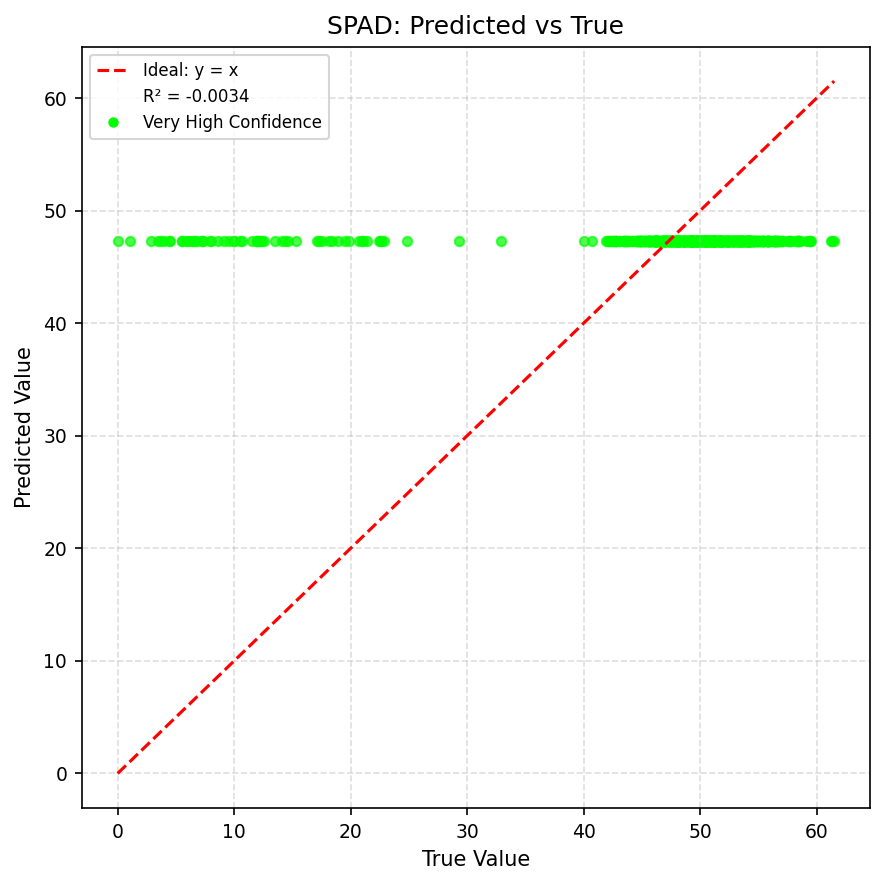


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
16
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/SPAD_DenseNet121WheatModel_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  DenseNet121WheatModel
Using device: cuda


c:\Users\Crop2024_GA\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Crop2024_GA\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:22<00:00,  2.59it/s]



Test Results:
R² Score : -5.8331
MAE      : 25.8000
RMSE     : 26.5892


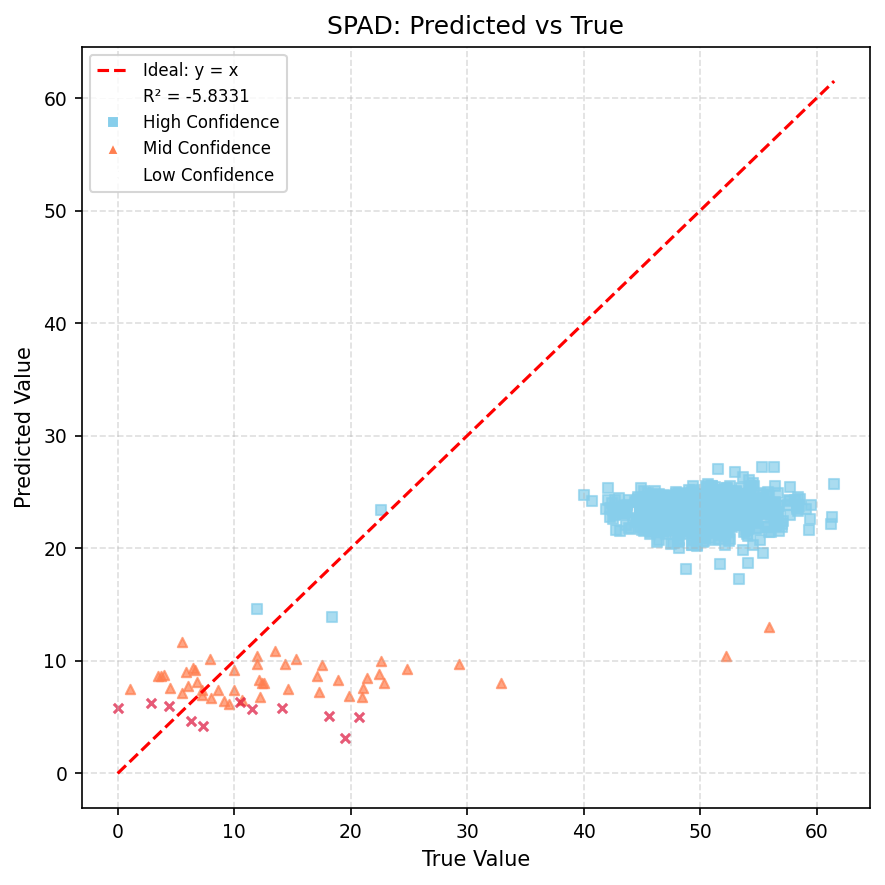


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
17
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/SPAD_EfficientFormerConfidenceModel_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  EfficientFormerConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:22<00:00,  2.56it/s]



Test Results:
R² Score : 0.4381
MAE      : 5.7513
RMSE     : 7.6247


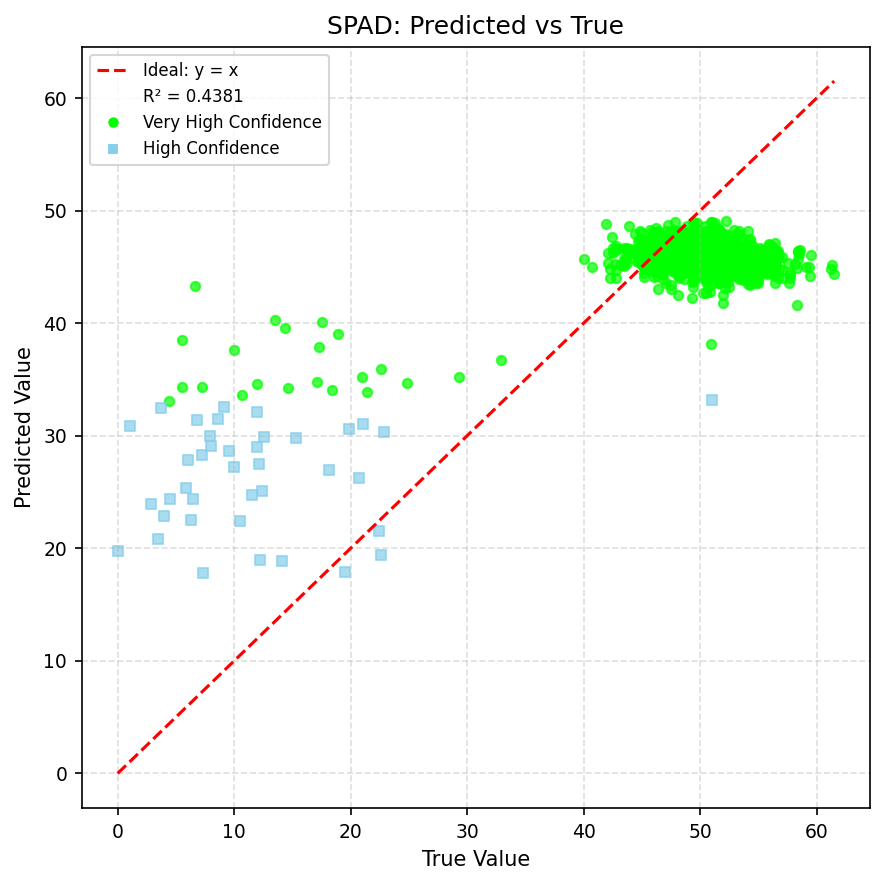


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
18
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/SPAD_EfficientNetV2MWheatModelWithConfidence_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  EfficientNetV2MWheatModelWithConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:22<00:00,  2.55it/s]



Test Results:
R² Score : -0.1433
MAE      : 9.5049
RMSE     : 10.8764


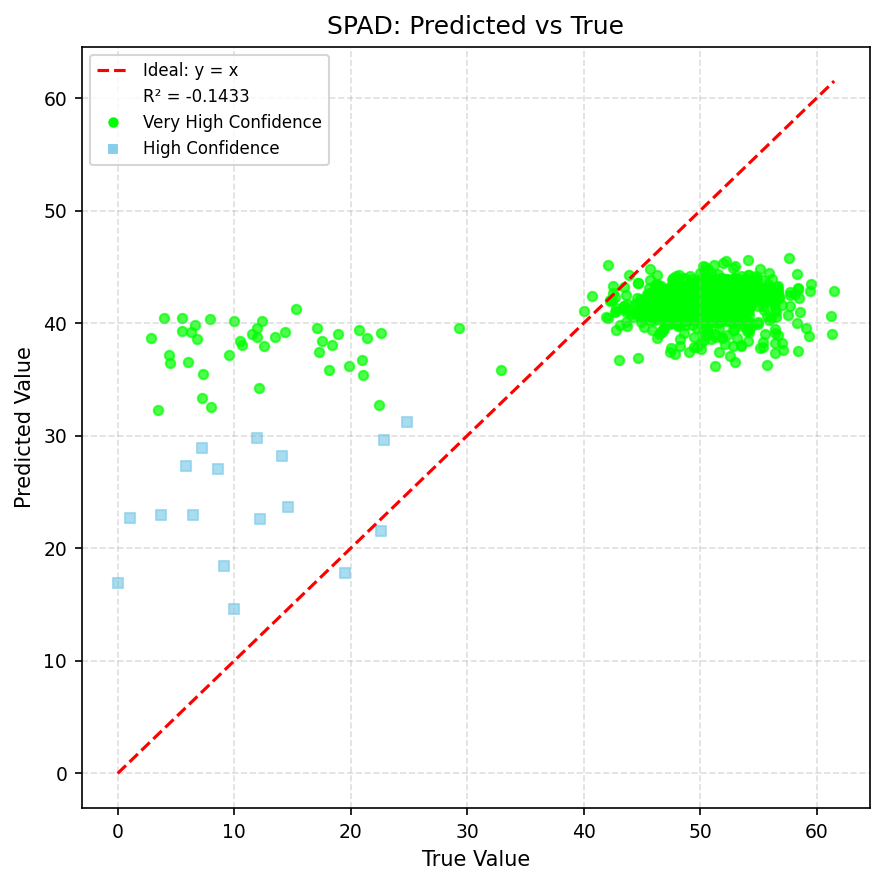


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
19
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/SPAD_FocalNetConfidenceModel_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  FocalNetConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:22<00:00,  2.55it/s]



Test Results:
R² Score : -0.1160
MAE      : 5.2896
RMSE     : 10.7453


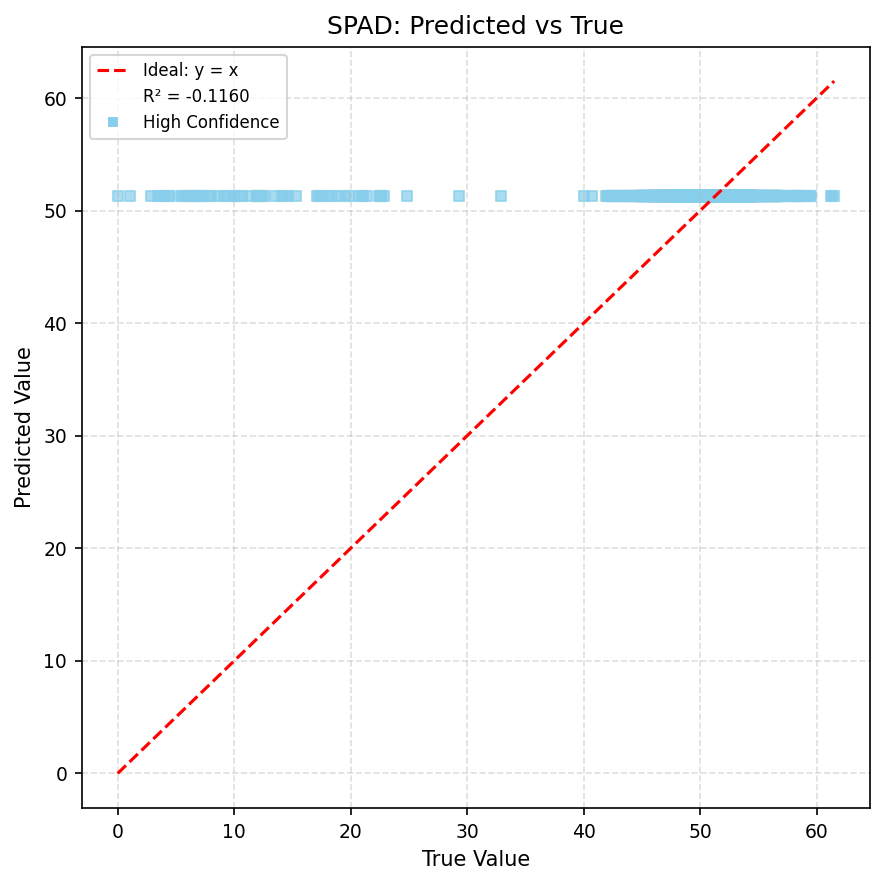


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
20
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/SPAD_MaxViTConfidenceModel_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  MaxViTConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.60it/s]



Test Results:
R² Score : 0.7554
MAE      : 3.4244
RMSE     : 5.0309


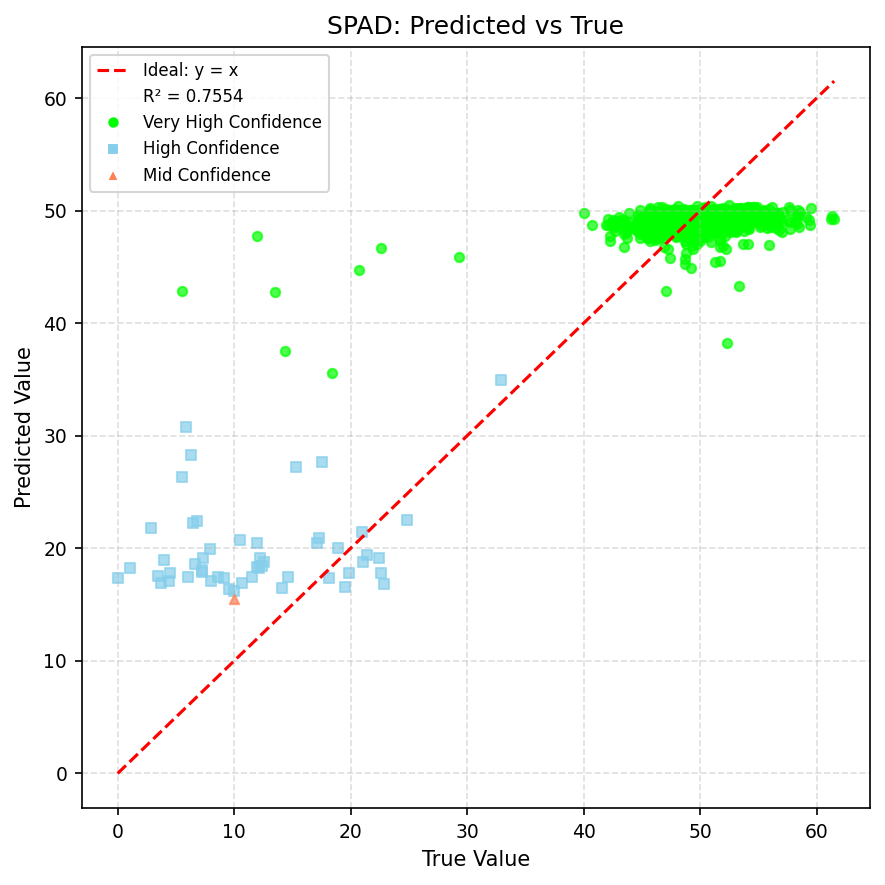


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
21
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/SPAD_MobileOneConfidence_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  MobileOneConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:22<00:00,  2.59it/s]



Test Results:
R² Score : 0.5367
MAE      : 4.4360
RMSE     : 6.9232


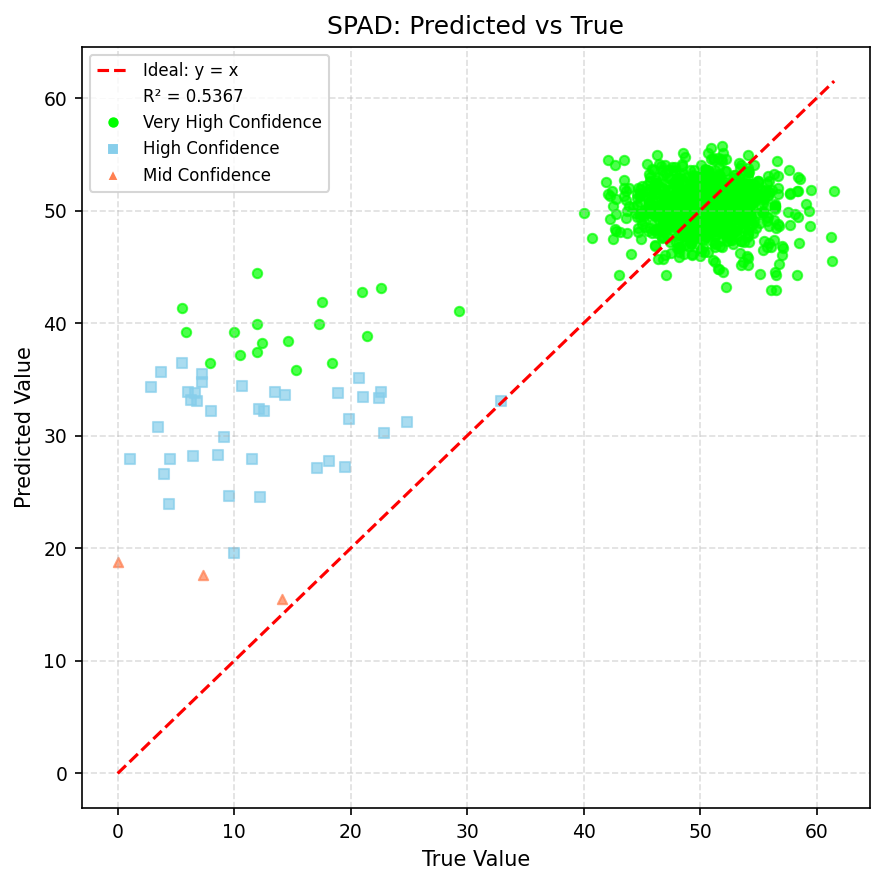


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
22
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/SPAD_MobileViTV2WheatModel_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  MobileViTV2WheatModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:22<00:00,  2.58it/s]



Test Results:
R² Score : -0.1583
MAE      : 9.7671
RMSE     : 10.9475


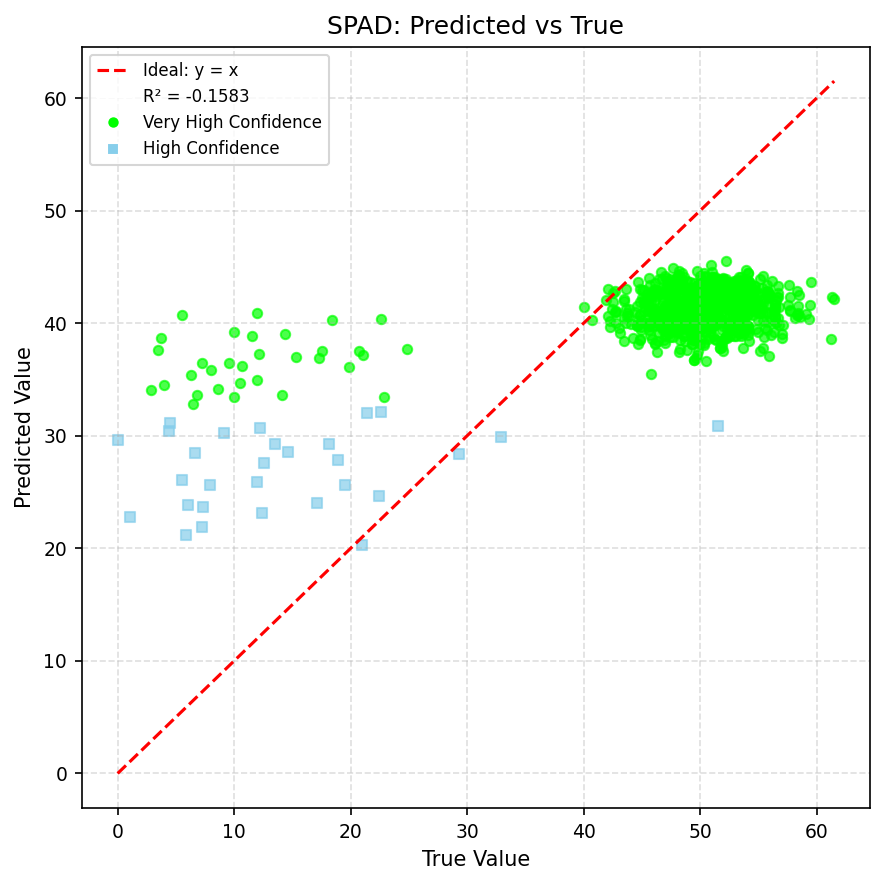


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
23
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/SPAD_PoolFormerConfidenceModel_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  PoolFormerConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.60it/s]



Test Results:
R² Score : 0.5176
MAE      : 5.1830
RMSE     : 7.0647


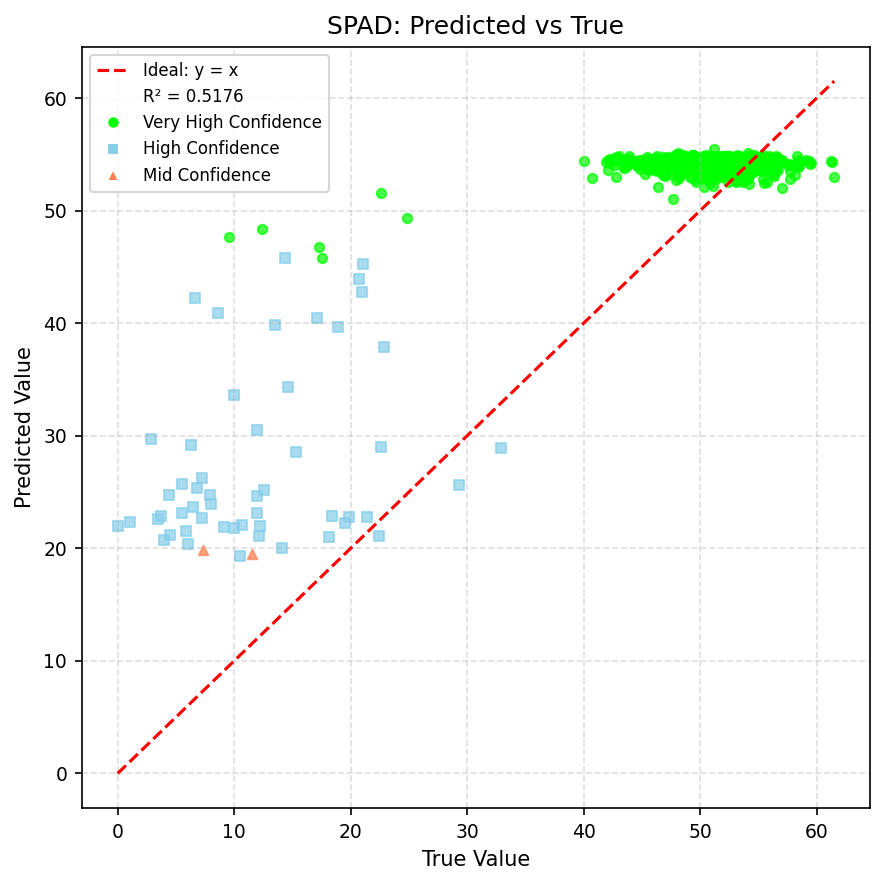


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
24
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/SPAD_RegNetY8GFModel_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  RegNetY8GFModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:23<00:00,  2.46it/s]



Test Results:
R² Score : 0.4363
MAE      : 6.0843
RMSE     : 7.6372


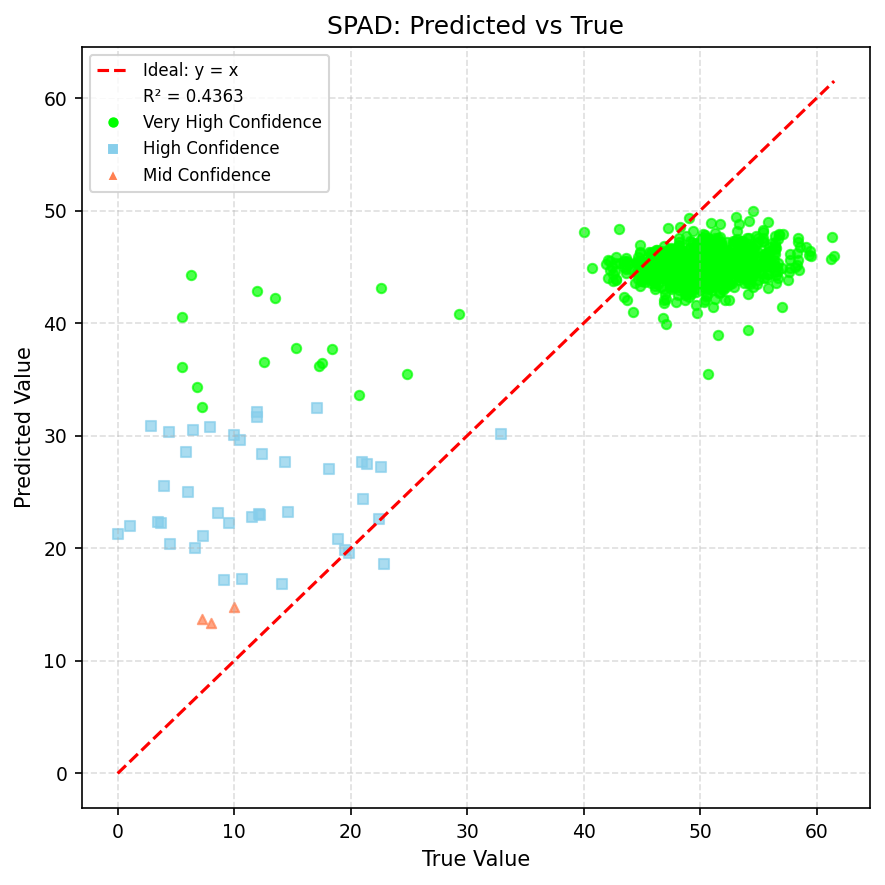


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
25
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/SPAD_RepVGGB1g4Model_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  RepVGGB1g4Model
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:22<00:00,  2.55it/s]



Test Results:
R² Score : -0.1896
MAE      : 10.4544
RMSE     : 11.0943


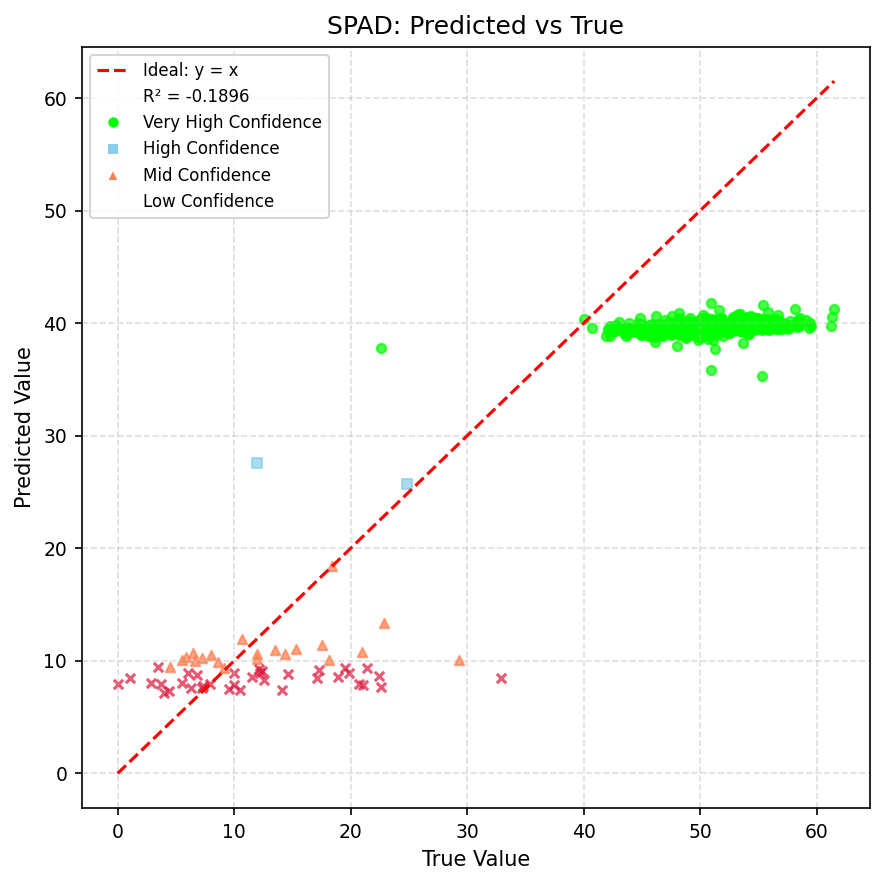


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
26
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/SPAD_SwinV2ConfidenceModel_raw1.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  SPAD
modelBackbone:  SwinV2ConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:22<00:00,  2.52it/s]



Test Results:
R² Score : -0.8408
MAE      : 13.2147
RMSE     : 13.8006


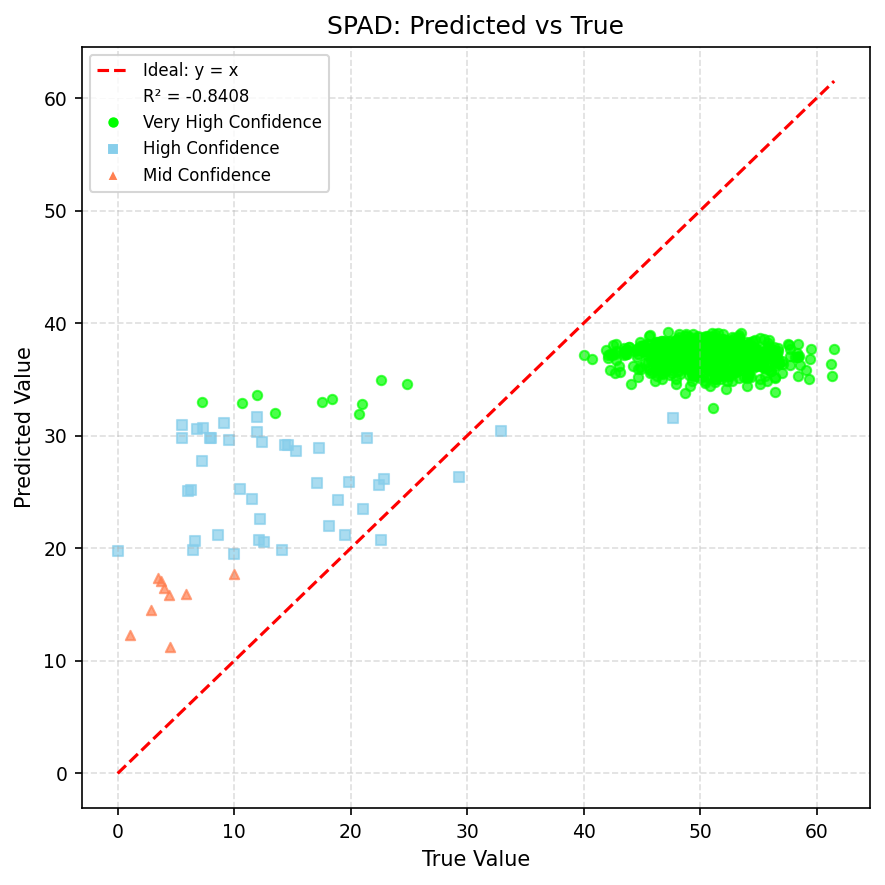


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
27
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_CoAtNetConfidenceModel_from3.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  CoAtNetConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.61it/s]



Test Results:
R² Score : 0.3769
MAE      : 16.6140
RMSE     : 21.5189


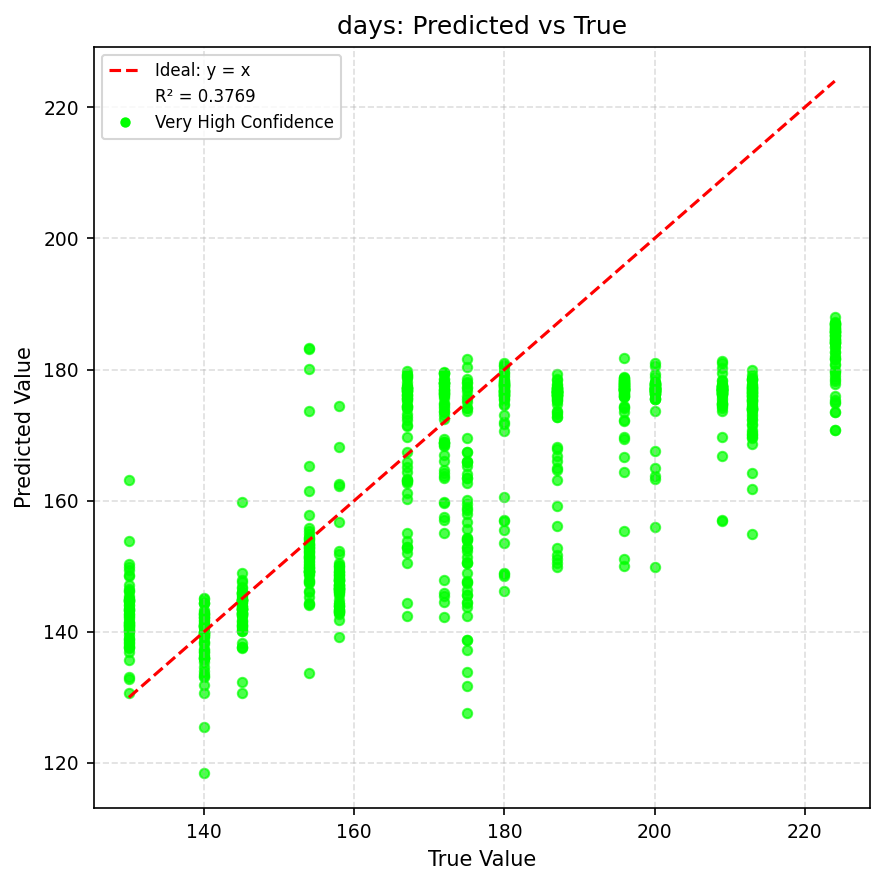


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
28
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_CoAtNetConfidenceModel_from4.pth
dataPath:  ./2025_LAI_From4_Raw1.csv
modelTarget:  days
modelBackbone:  CoAtNetConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 720
Test-Only → Test Batches: 45


Testing: 100%|██████████| 45/45 [00:20<00:00,  2.16it/s]



Test Results:
R² Score : 0.0709
MAE      : 17.9326
RMSE     : 20.6734


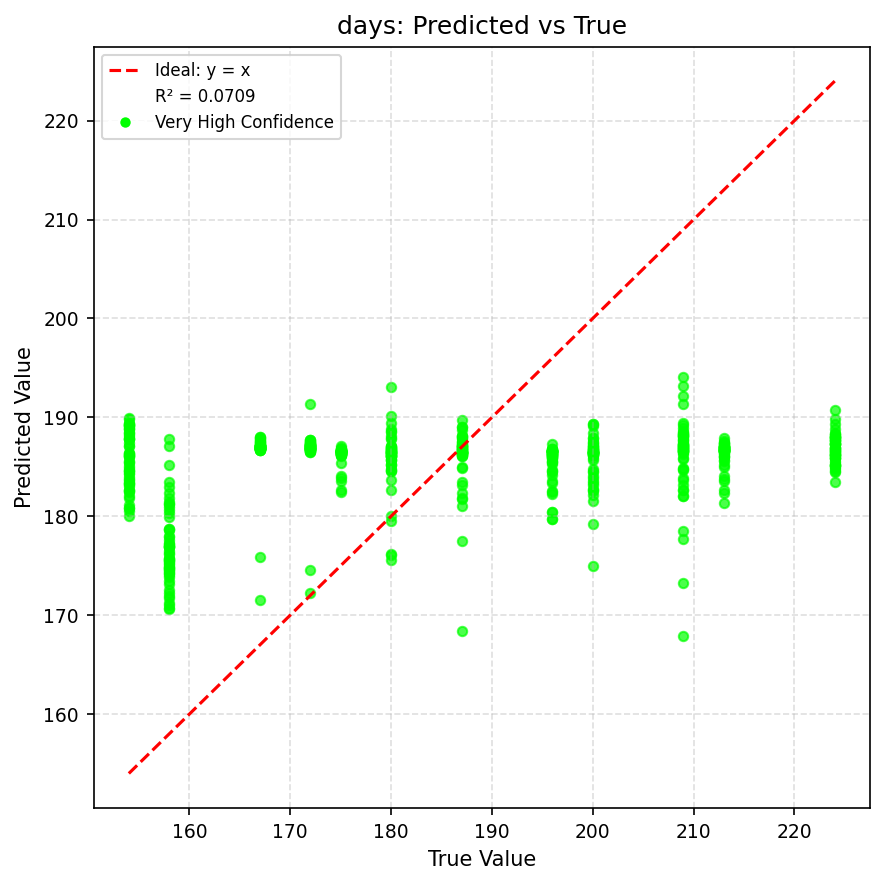


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
29
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_CoAtNetConfidenceModel_noERR.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  CoAtNetConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.59it/s]



Test Results:
R² Score : -0.6956
MAE      : 19.9307
RMSE     : 35.4978


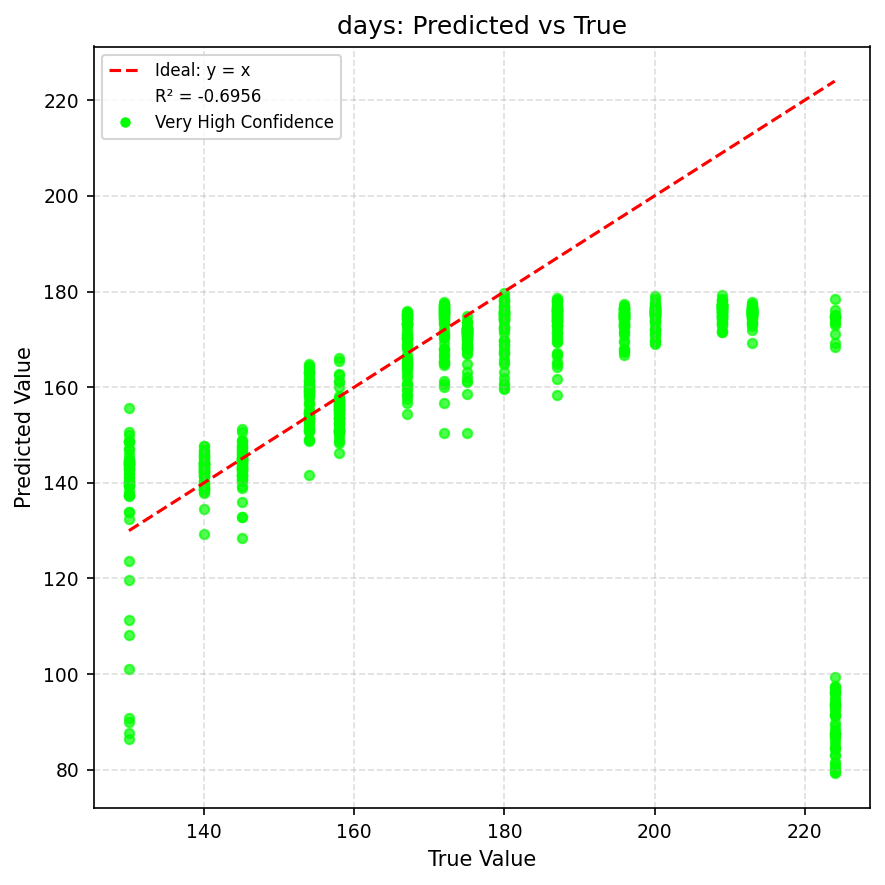


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
30
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_ConvNeXtTinyWheatModelWithConfidence_from3.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  ConvNeXtTinyWheatModelWithConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.60it/s]



Test Results:
R² Score : 0.1486
MAE      : 21.0371
RMSE     : 25.1543


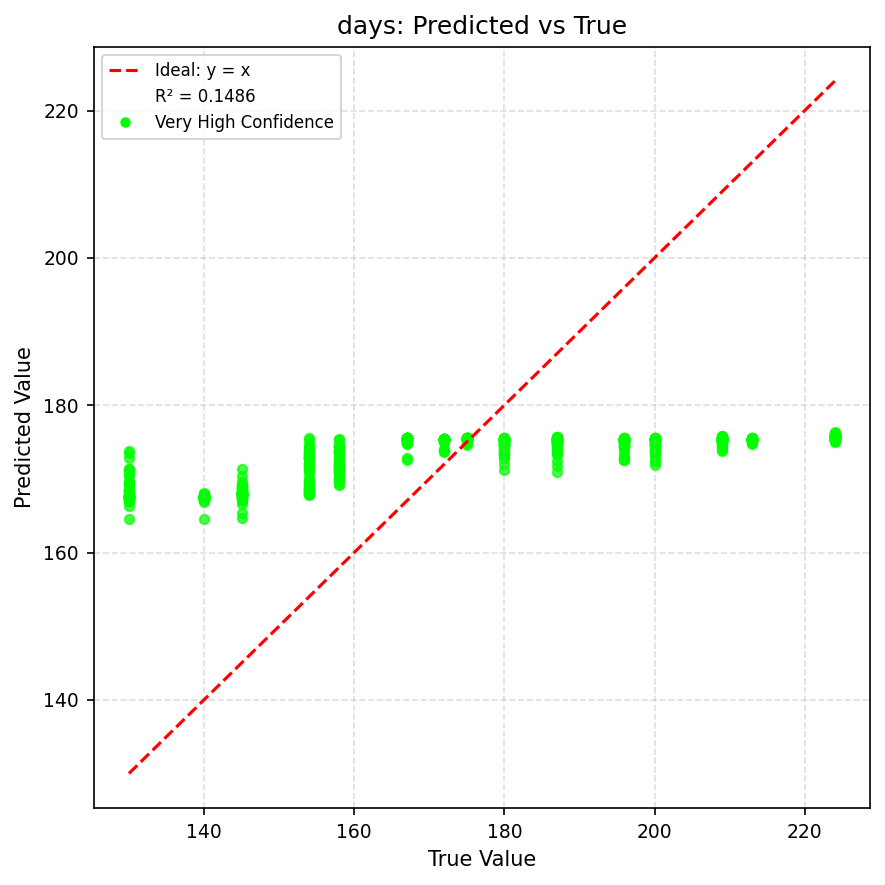


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
31
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_ConvNeXtTinyWheatModelWithConfidence_from4.pth
dataPath:  ./2025_LAI_From4_Raw1.csv
modelTarget:  days
modelBackbone:  ConvNeXtTinyWheatModelWithConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 720
Test-Only → Test Batches: 45


Testing: 100%|██████████| 45/45 [00:20<00:00,  2.16it/s]



Test Results:
R² Score : -1.1398
MAE      : 25.1815
RMSE     : 31.3747


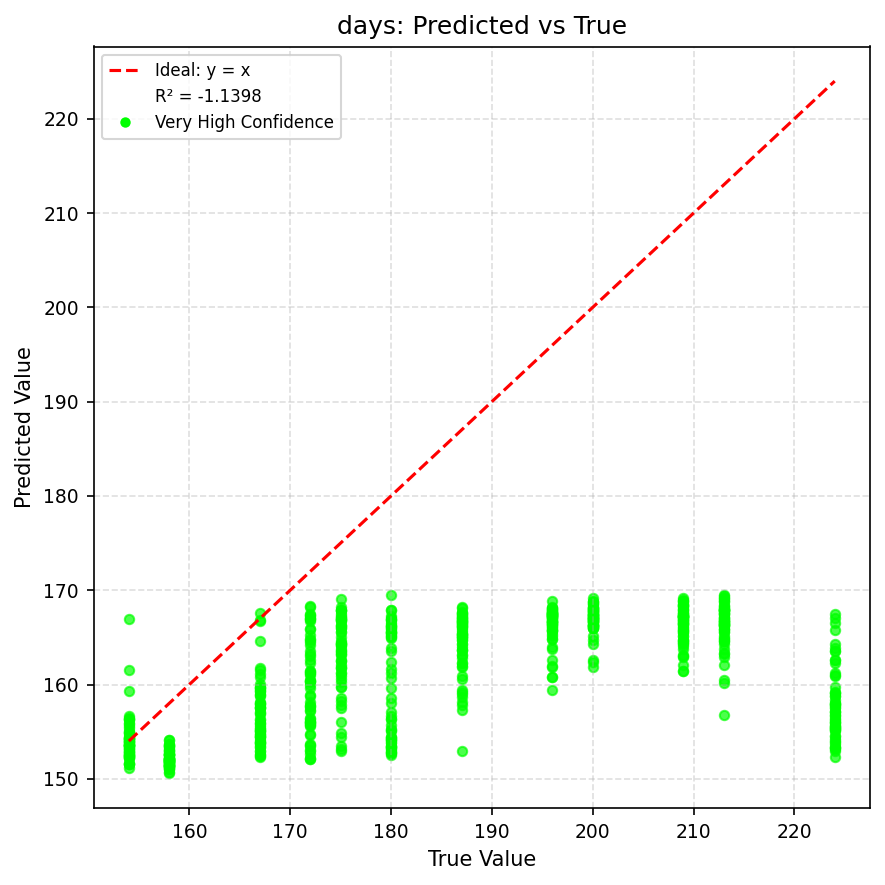


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
32
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_ConvNeXtTinyWheatModelWithConfidence_noERR.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  ConvNeXtTinyWheatModelWithConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.61it/s]



Test Results:
R² Score : 0.3202
MAE      : 19.1400
RMSE     : 22.4765


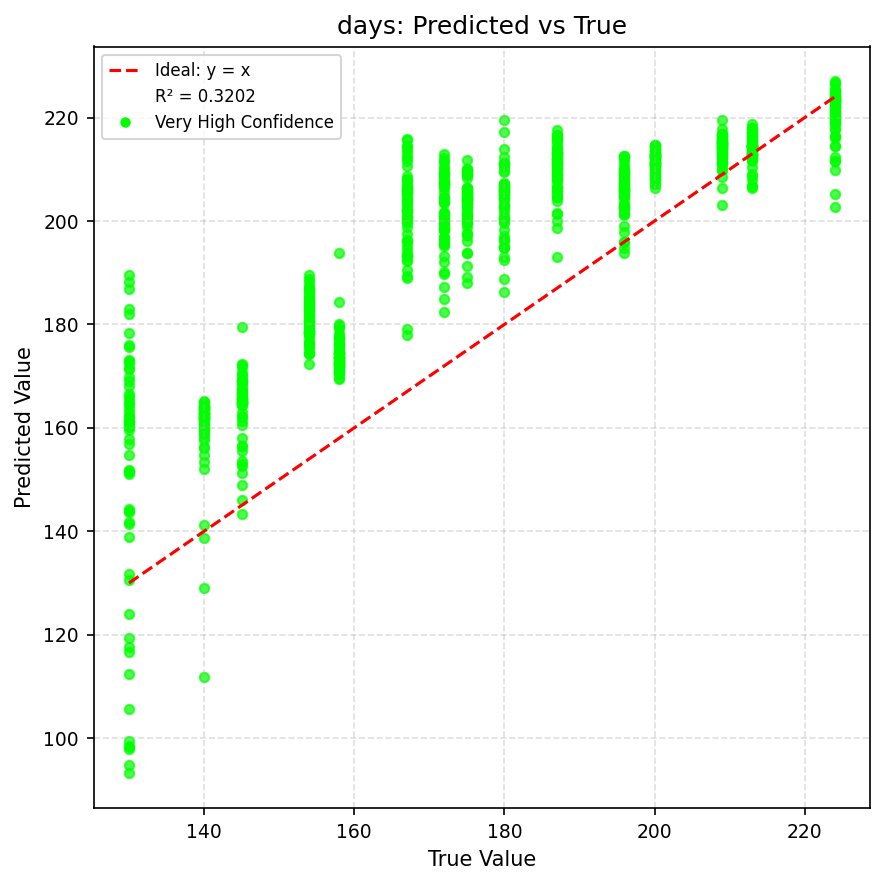


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
33
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_DenseNet121WheatModel_from3.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  DenseNet121WheatModel
Using device: cuda


c:\Users\Crop2024_GA\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Crop2024_GA\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.59it/s]



Test Results:
R² Score : -6.0414
MAE      : 70.6701
RMSE     : 72.3387


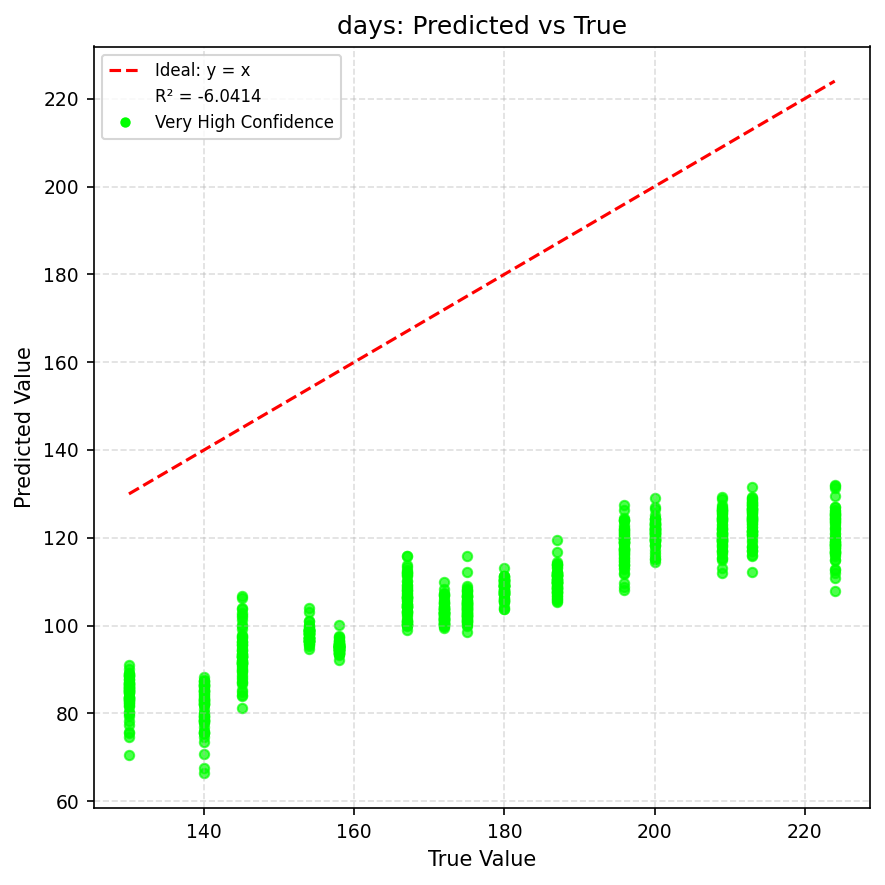


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
34
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_DenseNet121WheatModel_from4.pth
dataPath:  ./2025_LAI_From4_Raw1.csv
modelTarget:  days
modelBackbone:  DenseNet121WheatModel
Using device: cuda


c:\Users\Crop2024_GA\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Crop2024_GA\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Loaded Test-Only Dataset → Total Samples: 720
Test-Only → Test Batches: 45


Testing: 100%|██████████| 45/45 [00:20<00:00,  2.15it/s]



Test Results:
R² Score : 0.7533
MAE      : 7.8428
RMSE     : 10.6538


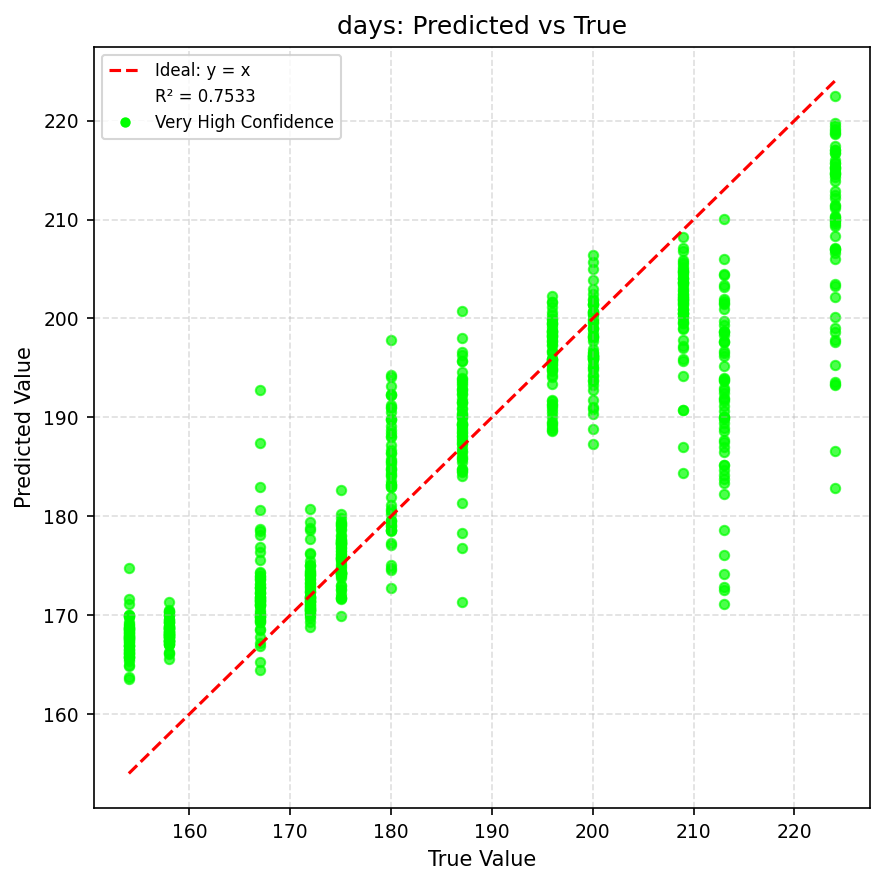


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
35
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_DenseNet121WheatModel_noERR.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  DenseNet121WheatModel
Using device: cuda


c:\Users\Crop2024_GA\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Crop2024_GA\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.62it/s]



Test Results:
R² Score : -19.9588
MAE      : 123.7665
RMSE     : 124.8025


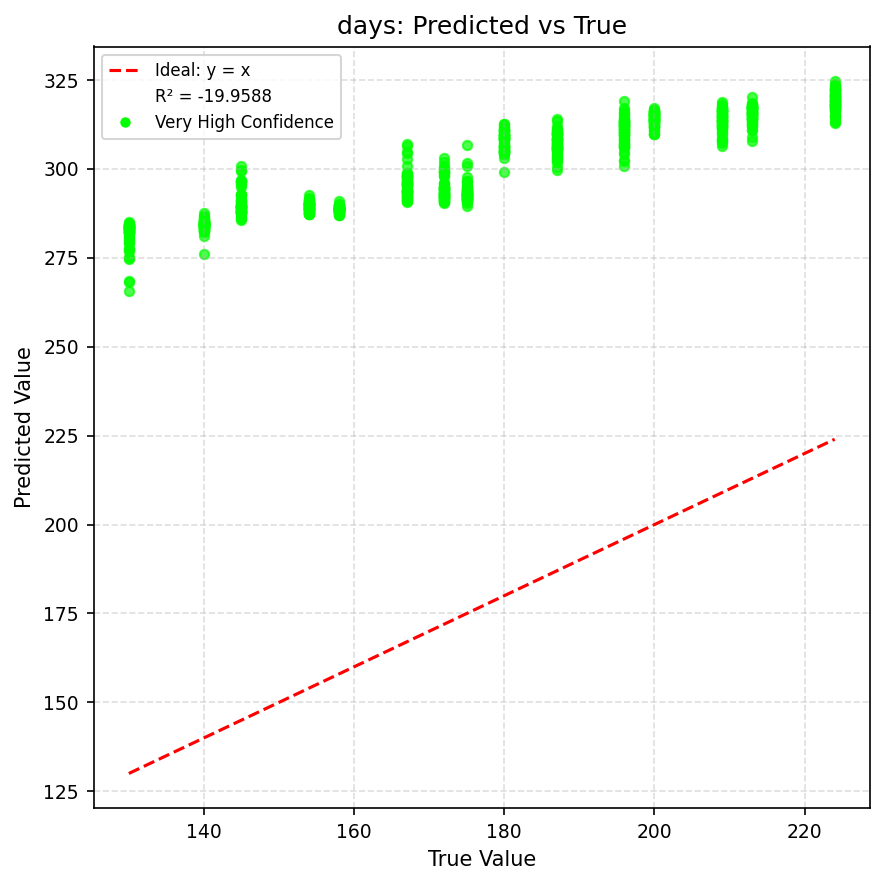


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
36
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_EfficientFormerConfidenceModel_from3.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  EfficientFormerConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:30<00:00,  1.86it/s]



Test Results:
R² Score : 0.0575
MAE      : 22.1834
RMSE     : 26.4649


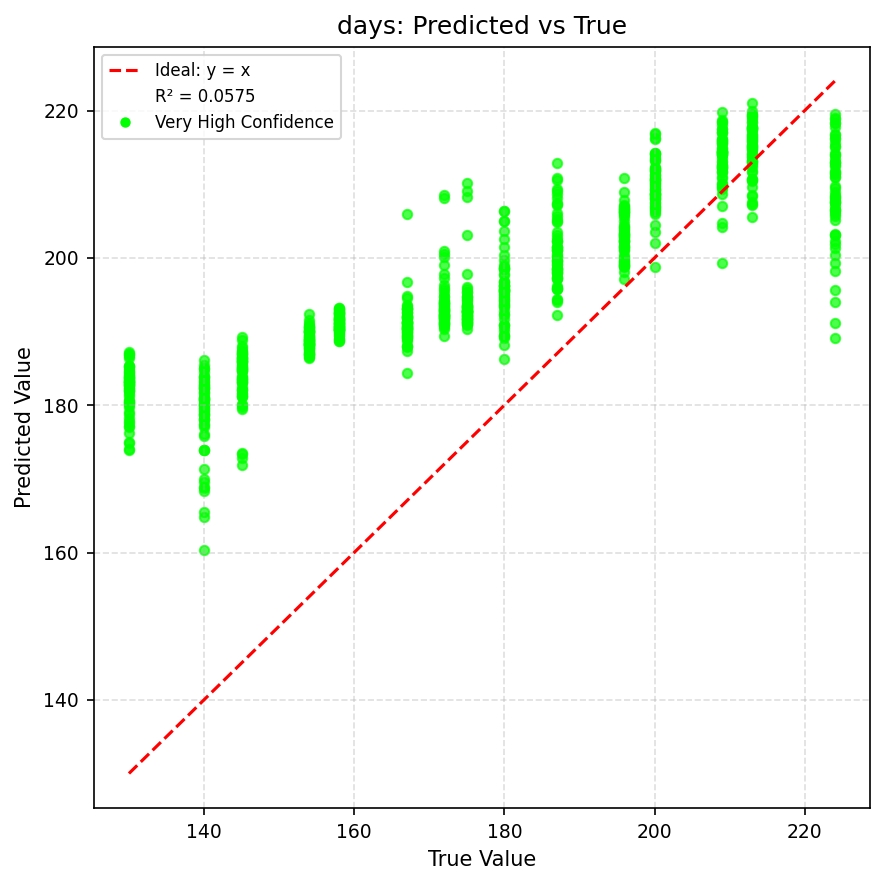


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
37
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_EfficientFormerConfidenceModel_from4.pth
dataPath:  ./2025_LAI_From4_Raw1.csv
modelTarget:  days
modelBackbone:  EfficientFormerConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 720
Test-Only → Test Batches: 45


Testing: 100%|██████████| 45/45 [00:21<00:00,  2.10it/s]



Test Results:
R² Score : 0.3022
MAE      : 15.6149
RMSE     : 17.9162


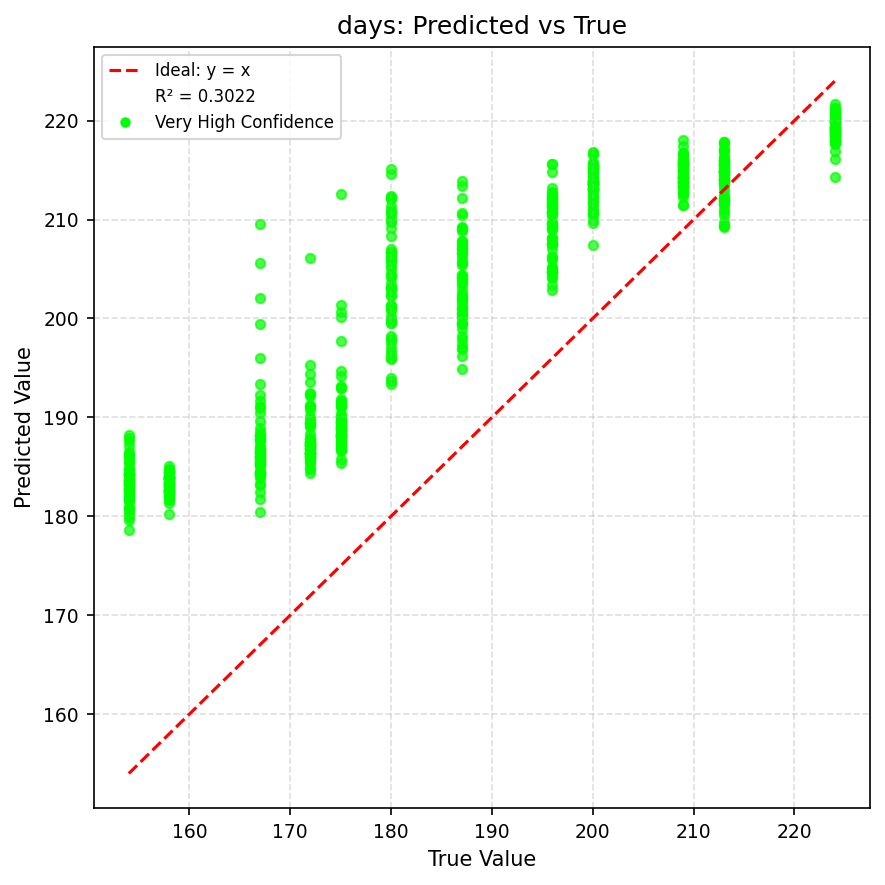


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
38
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_EfficientFormerConfidenceModel_noERR.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  EfficientFormerConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:22<00:00,  2.58it/s]



Test Results:
R² Score : 0.6840
MAE      : 12.3783
RMSE     : 15.3256


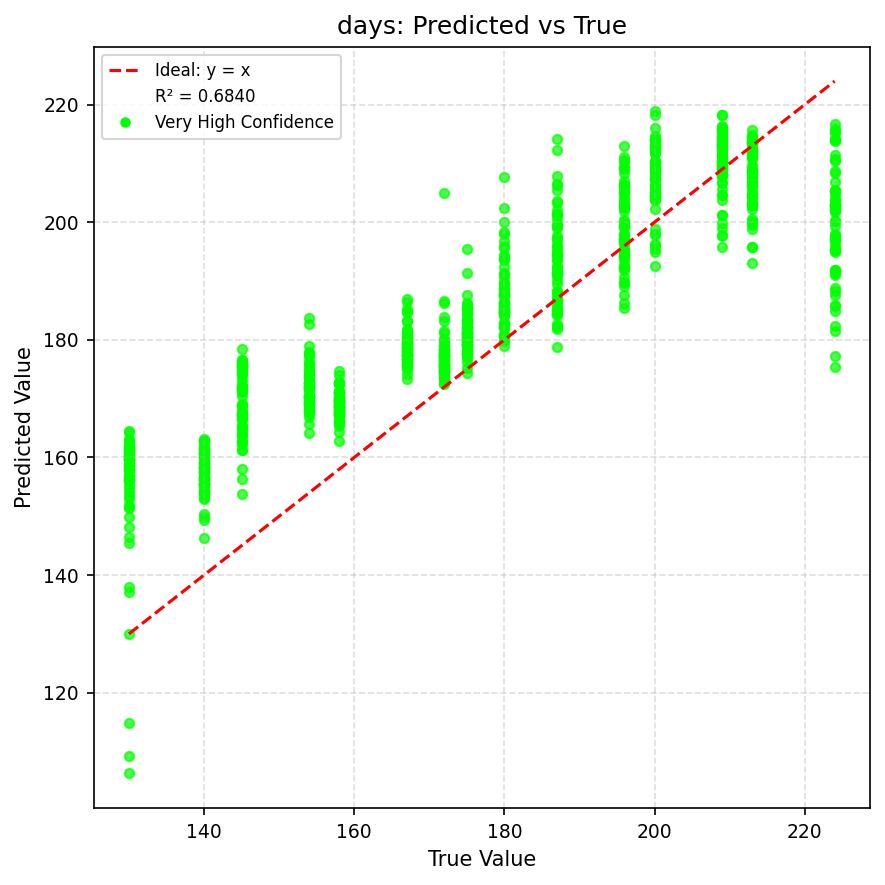


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
39
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_EfficientNetV2MWheatModelWithConfidence_from3.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  EfficientNetV2MWheatModelWithConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:22<00:00,  2.59it/s]



Test Results:
R² Score : 0.7392
MAE      : 10.4200
RMSE     : 13.9223


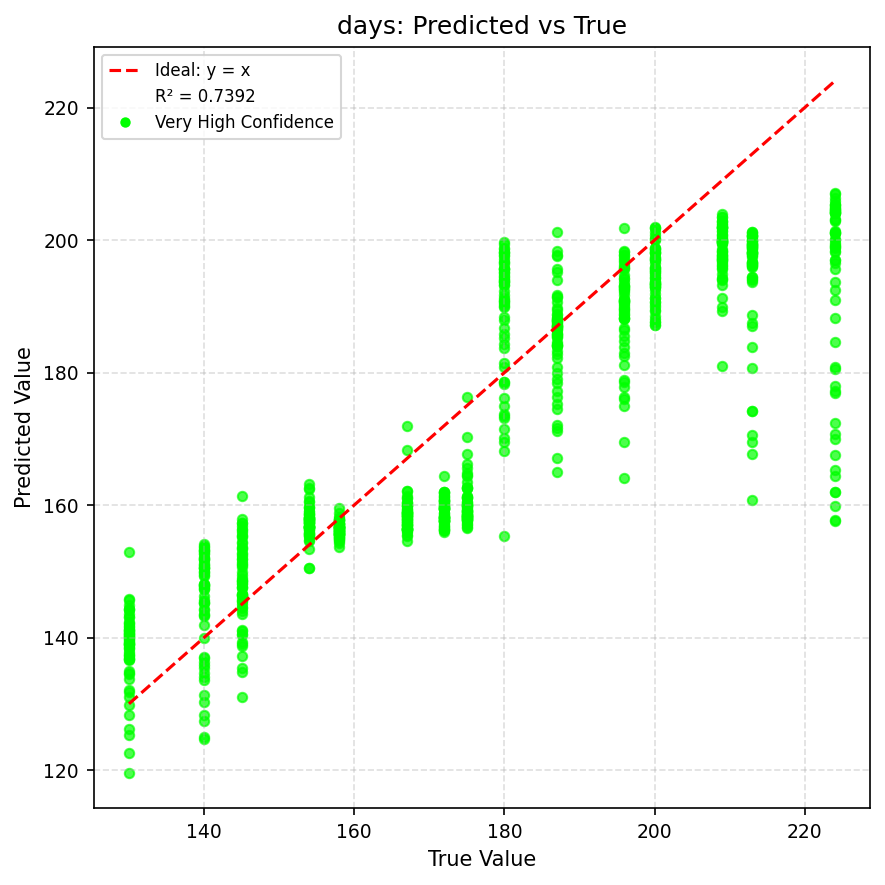


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
40
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_EfficientNetV2MWheatModelWithConfidence_from4.pth
dataPath:  ./2025_LAI_From4_Raw1.csv
modelTarget:  days
modelBackbone:  EfficientNetV2MWheatModelWithConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 720
Test-Only → Test Batches: 45


Testing: 100%|██████████| 45/45 [00:20<00:00,  2.14it/s]



Test Results:
R² Score : -0.8891
MAE      : 27.8175
RMSE     : 29.4795


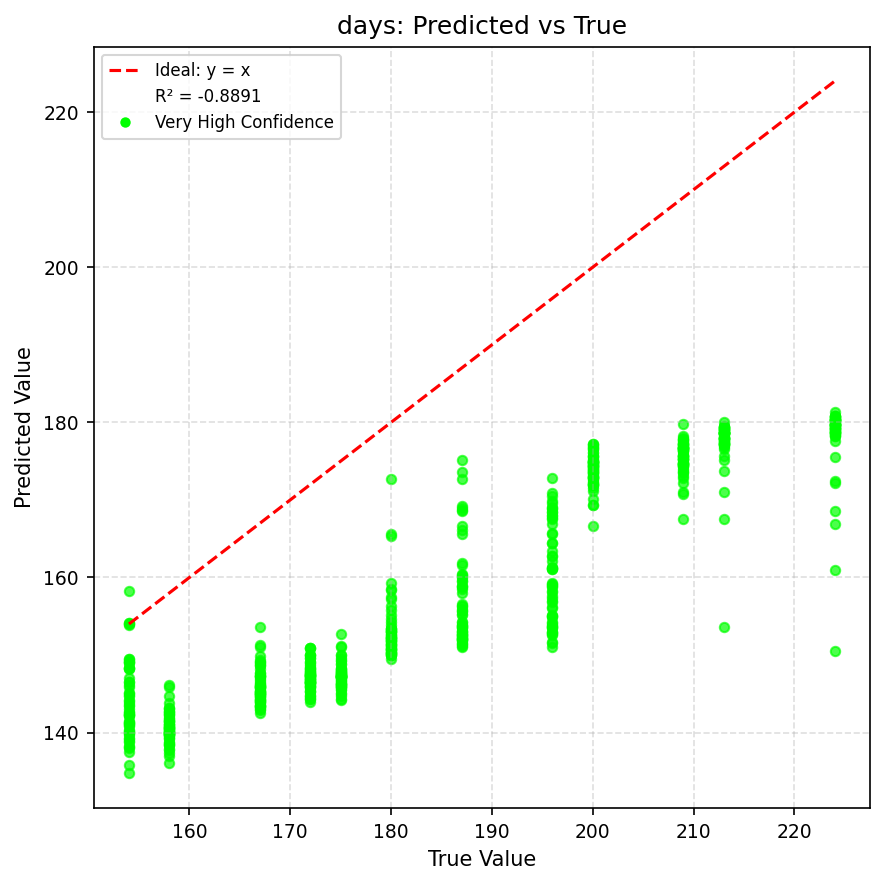


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
41
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_EfficientNetV2MWheatModelWithConfidence_noERR.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  EfficientNetV2MWheatModelWithConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.62it/s]



Test Results:
R² Score : -2.8214
MAE      : 49.2592
RMSE     : 53.2904


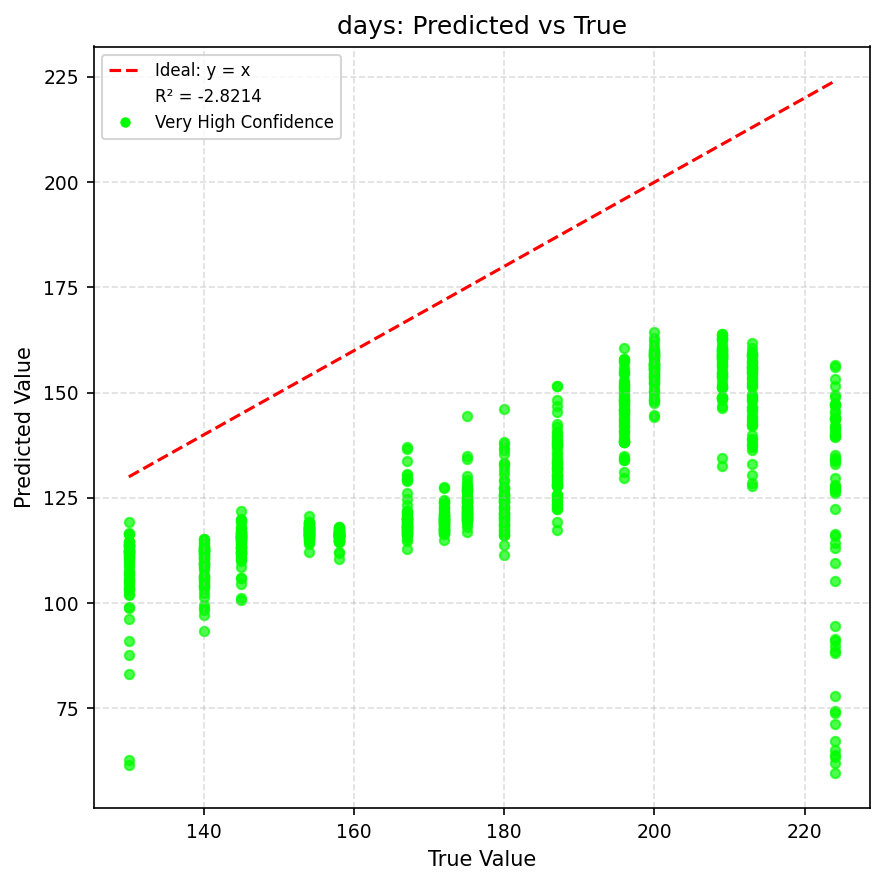


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
42
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_FocalNetConfidenceModel_from3.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  FocalNetConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.60it/s]



Test Results:
R² Score : 0.6351
MAE      : 13.2169
RMSE     : 16.4673


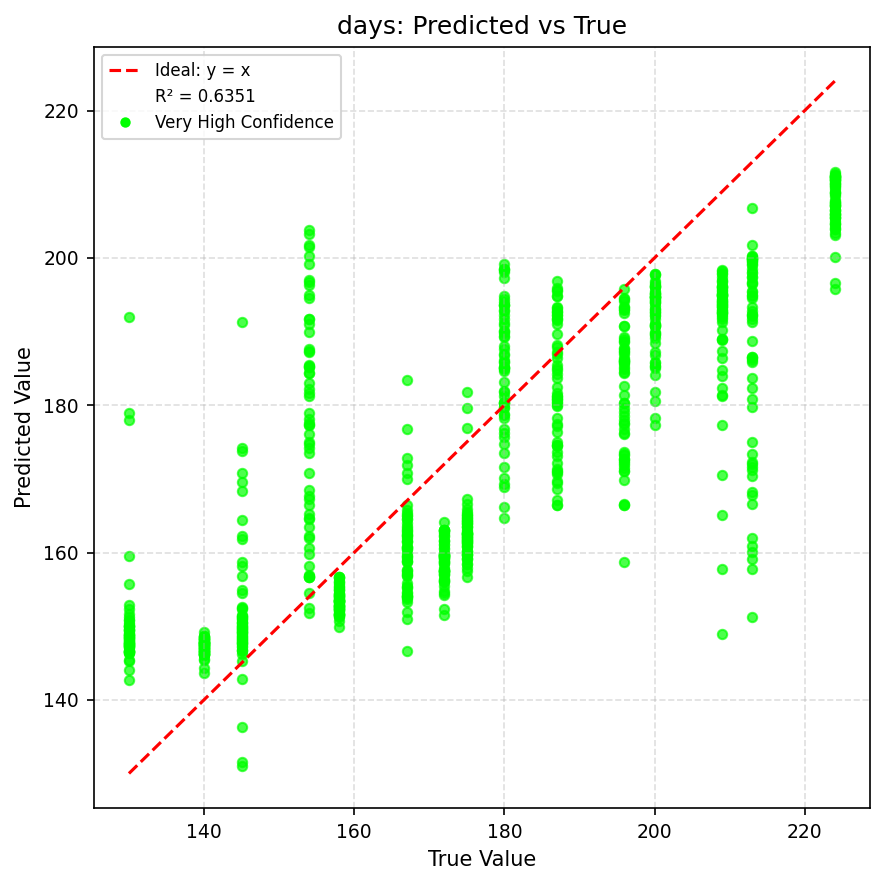


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
43
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_FocalNetConfidenceModel_from4.pth
dataPath:  ./2025_LAI_From4_Raw1.csv
modelTarget:  days
modelBackbone:  FocalNetConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 720
Test-Only → Test Batches: 45


Testing: 100%|██████████| 45/45 [00:20<00:00,  2.17it/s]



Test Results:
R² Score : -18.9768
MAE      : 93.4330
RMSE     : 95.8632


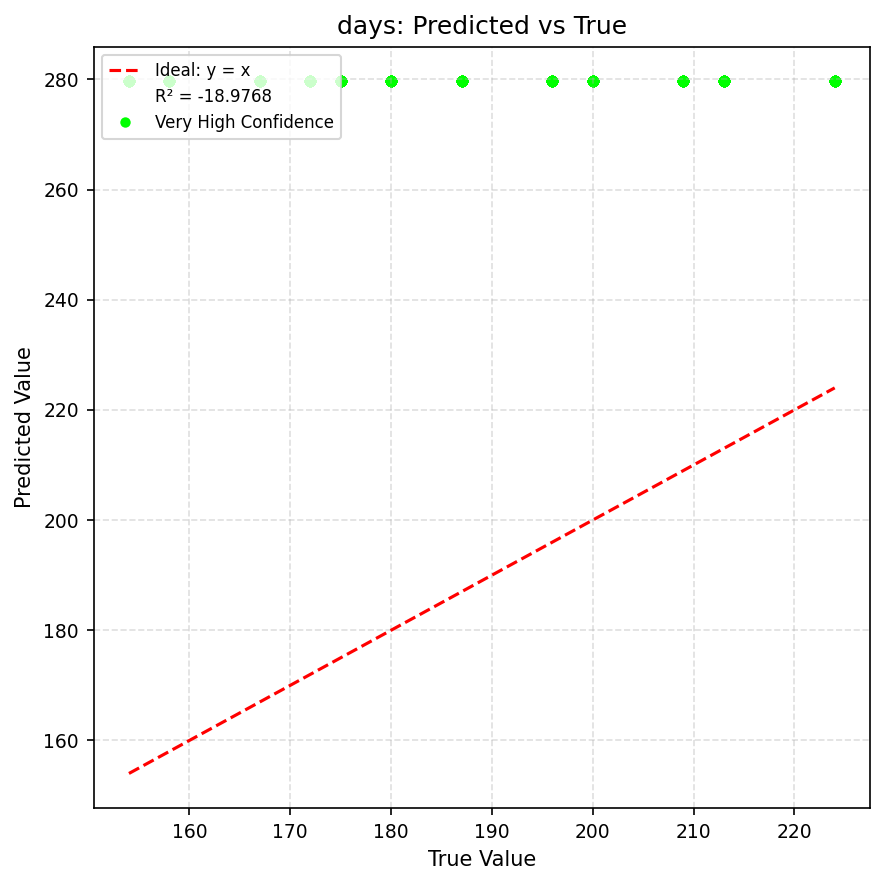


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
44
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_FocalNetConfidenceModel_noERR.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  FocalNetConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.65it/s]



Test Results:
R² Score : 0.4917
MAE      : 14.2481
RMSE     : 19.4362


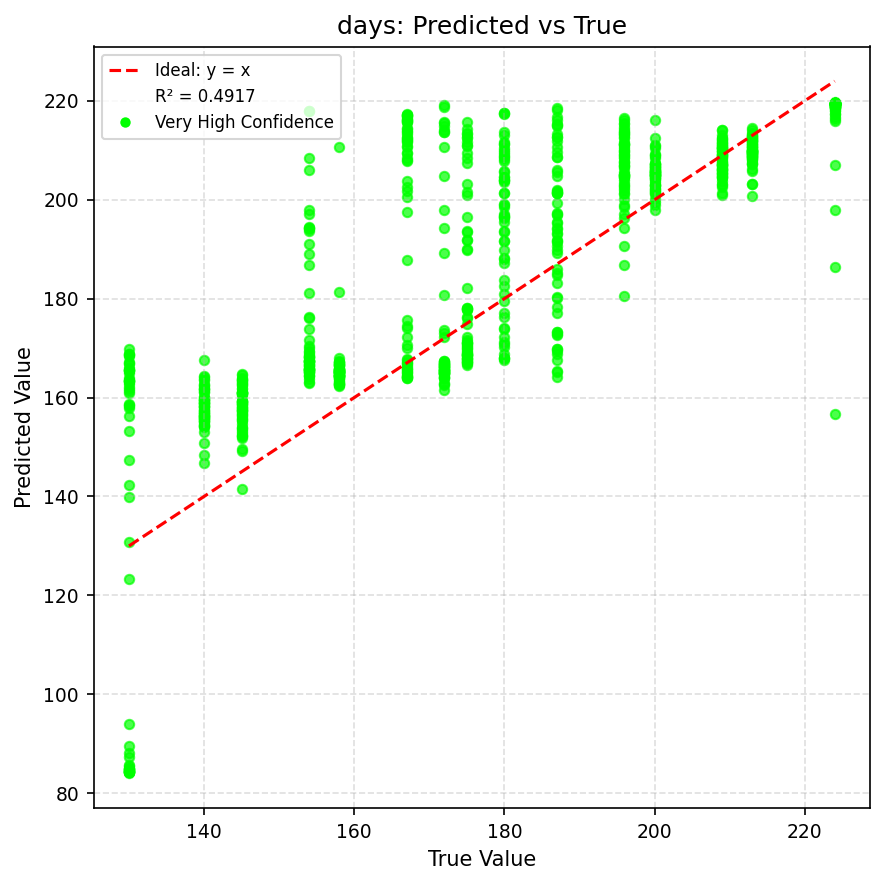


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
45
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_MaxViTConfidenceModel_from3.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  MaxViTConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.60it/s]



Test Results:
R² Score : -0.2524
MAE      : 26.6167
RMSE     : 30.5079


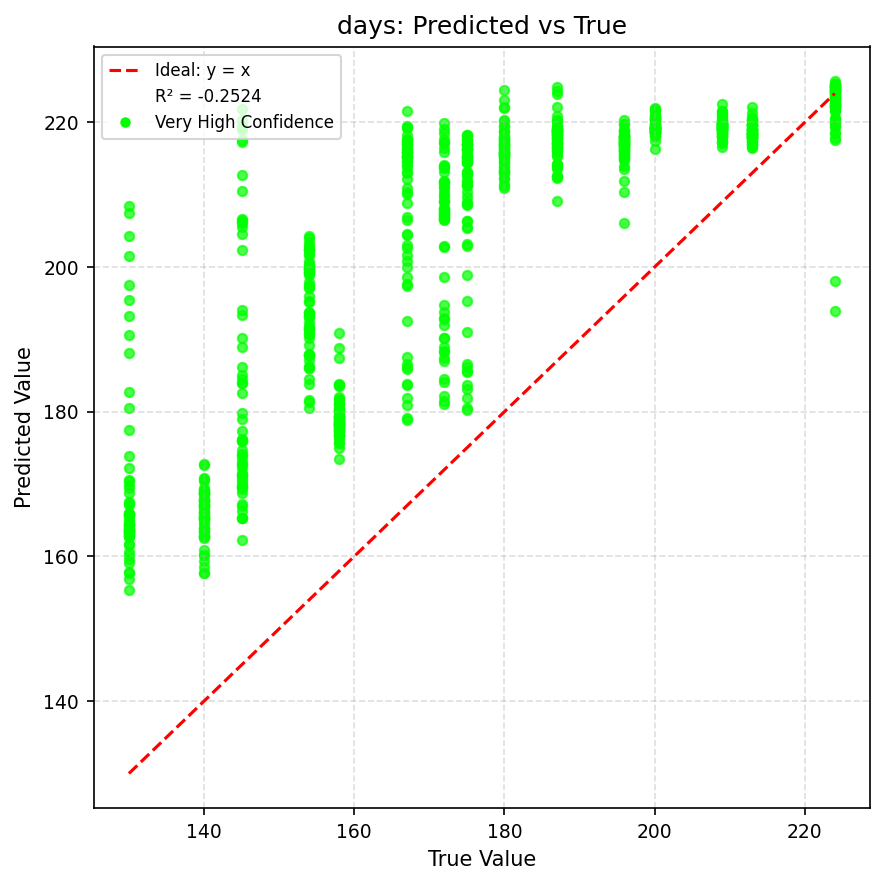


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
46
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_MaxViTConfidenceModel_from4.pth
dataPath:  ./2025_LAI_From4_Raw1.csv
modelTarget:  days
modelBackbone:  MaxViTConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 720
Test-Only → Test Batches: 45


Testing: 100%|██████████| 45/45 [00:20<00:00,  2.16it/s]



Test Results:
R² Score : 0.4481
MAE      : 13.4123
RMSE     : 15.9341


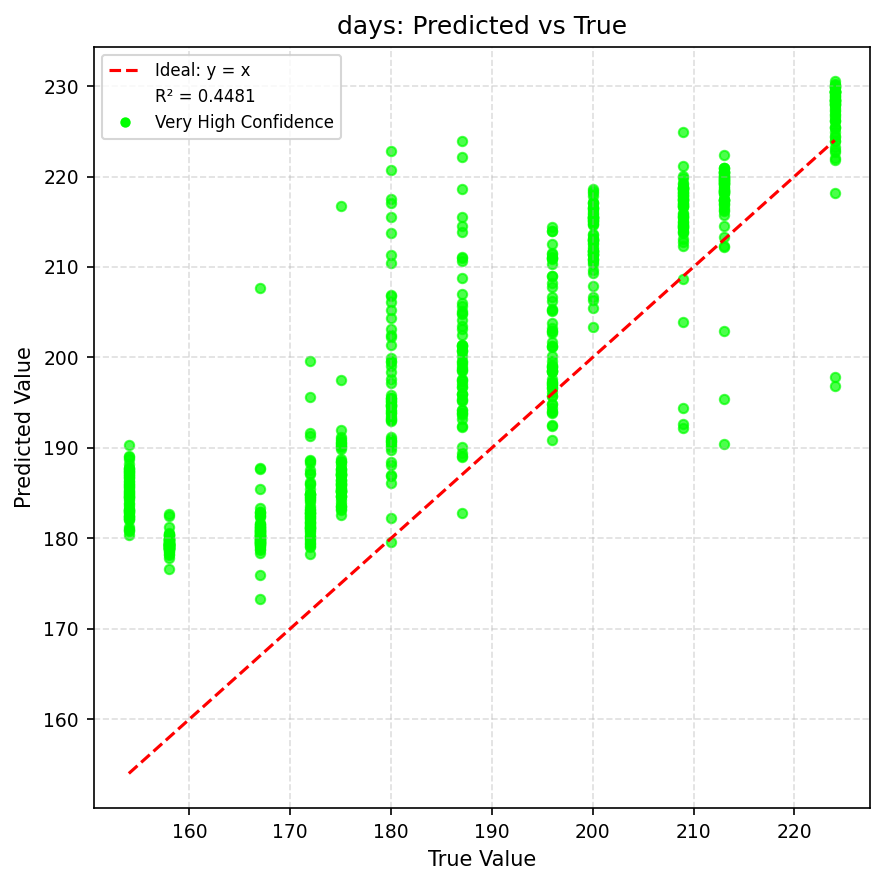


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
47
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_MaxViTConfidenceModel_noERR.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  MaxViTConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.60it/s]



Test Results:
R² Score : 0.4005
MAE      : 15.9028
RMSE     : 21.1072


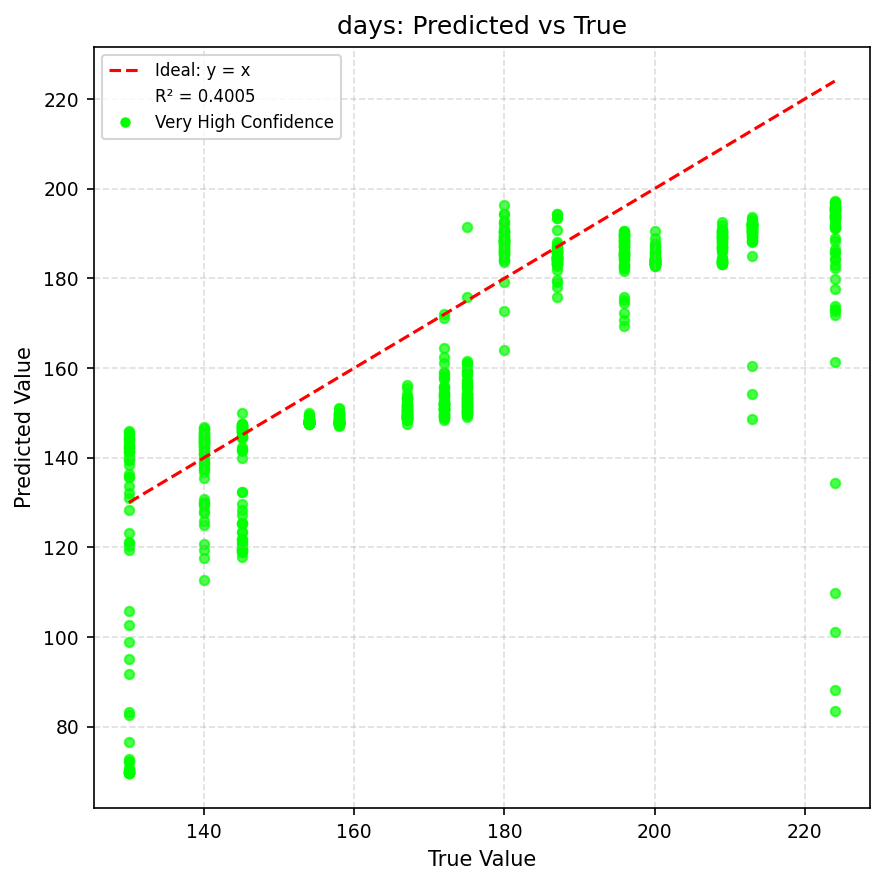


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
48
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_MobileOneConfidence_from3.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  MobileOneConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.62it/s]



Test Results:
R² Score : 0.3072
MAE      : 19.3939
RMSE     : 22.6897


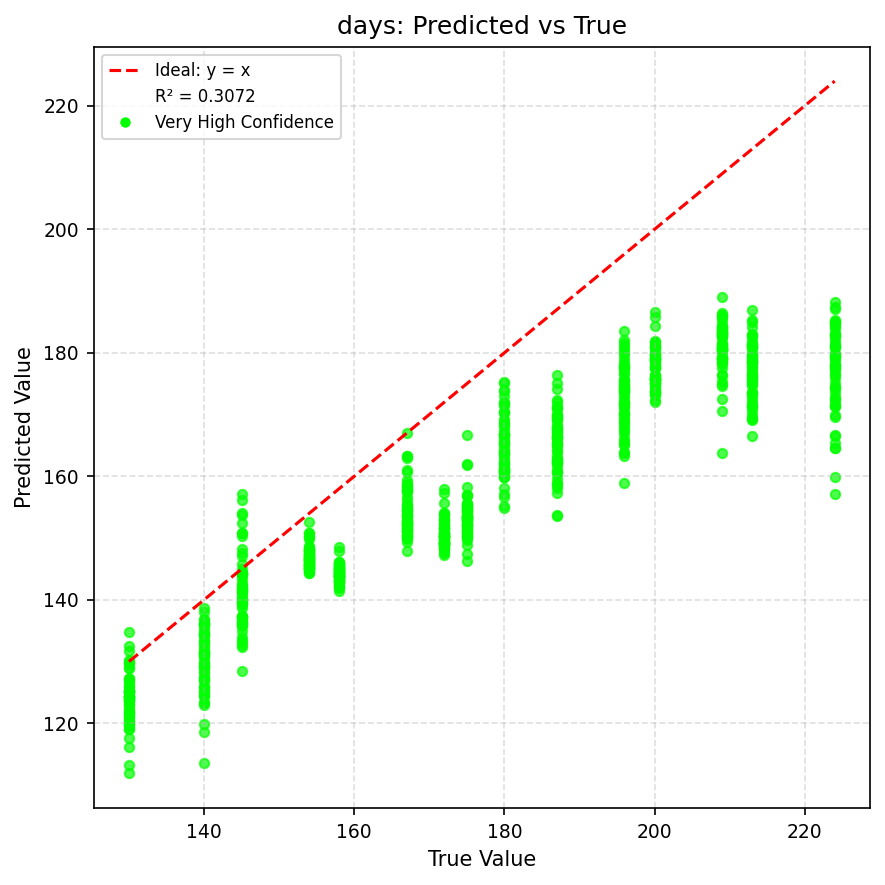


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
49
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_MobileOneConfidence_from4.pth
dataPath:  ./2025_LAI_From4_Raw1.csv
modelTarget:  days
modelBackbone:  MobileOneConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 720
Test-Only → Test Batches: 45


Testing: 100%|██████████| 45/45 [00:20<00:00,  2.18it/s]



Test Results:
R² Score : -3.9035
MAE      : 46.6293
RMSE     : 47.4942


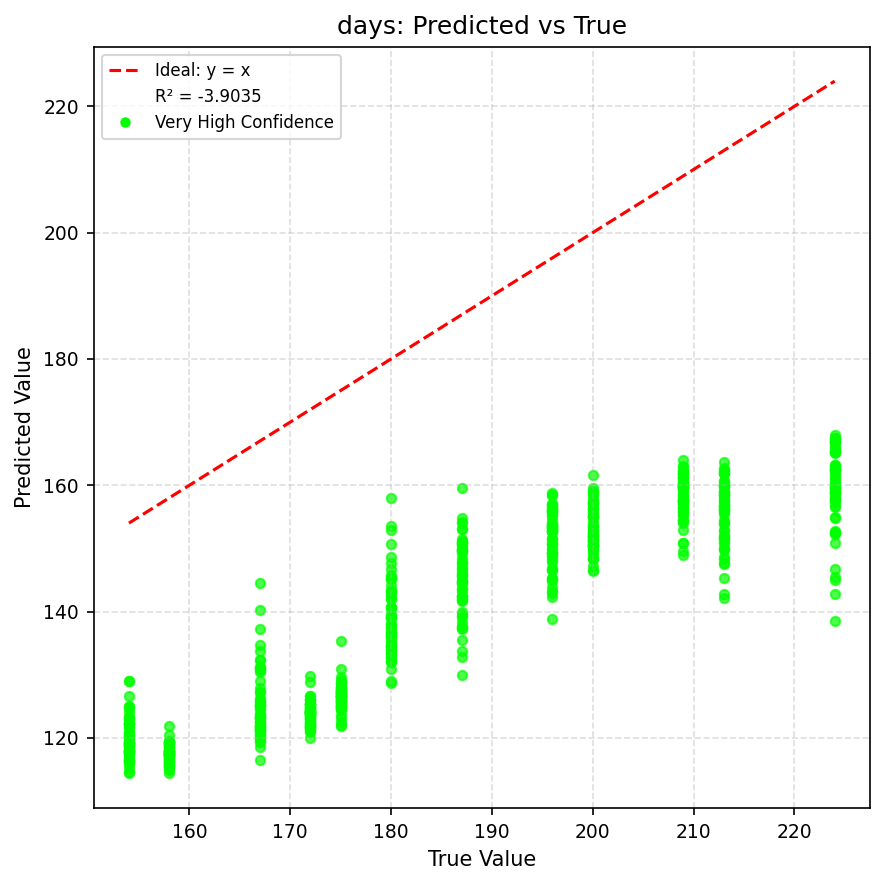


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
50
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_MobileOneConfidence_noERR.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  MobileOneConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.63it/s]



Test Results:
R² Score : 0.7081
MAE      : 12.2539
RMSE     : 14.7292


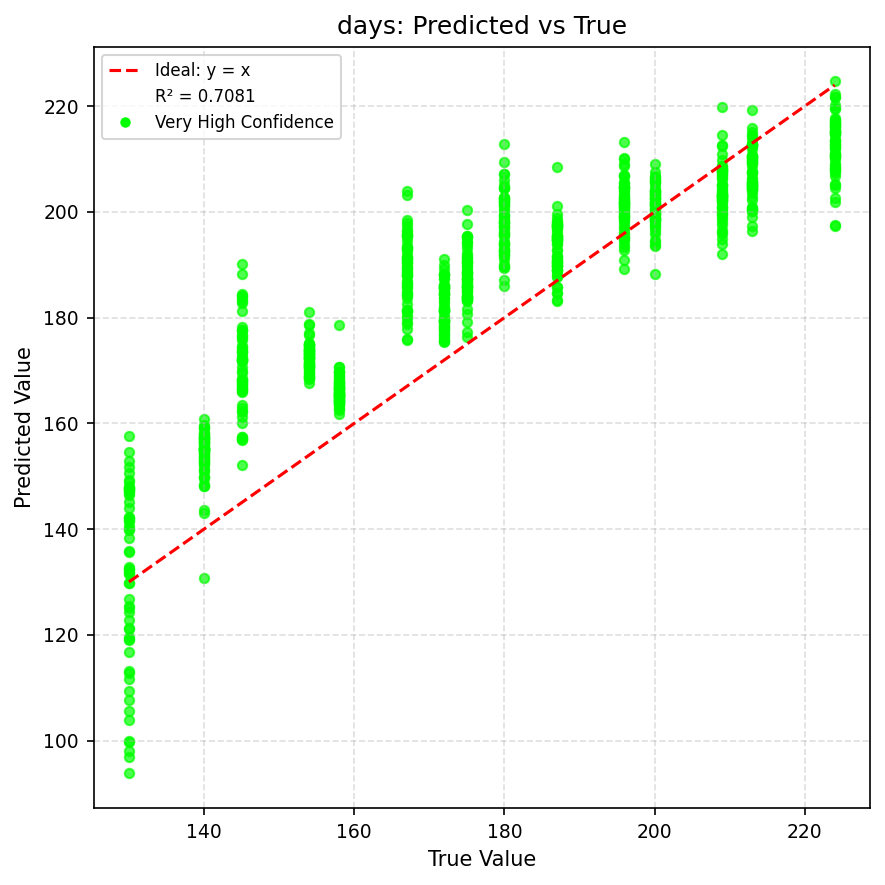


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
51
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_MobileViTV2WheatModel_from3.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  MobileViTV2WheatModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.63it/s]



Test Results:
R² Score : 0.4316
MAE      : 16.9568
RMSE     : 20.5525


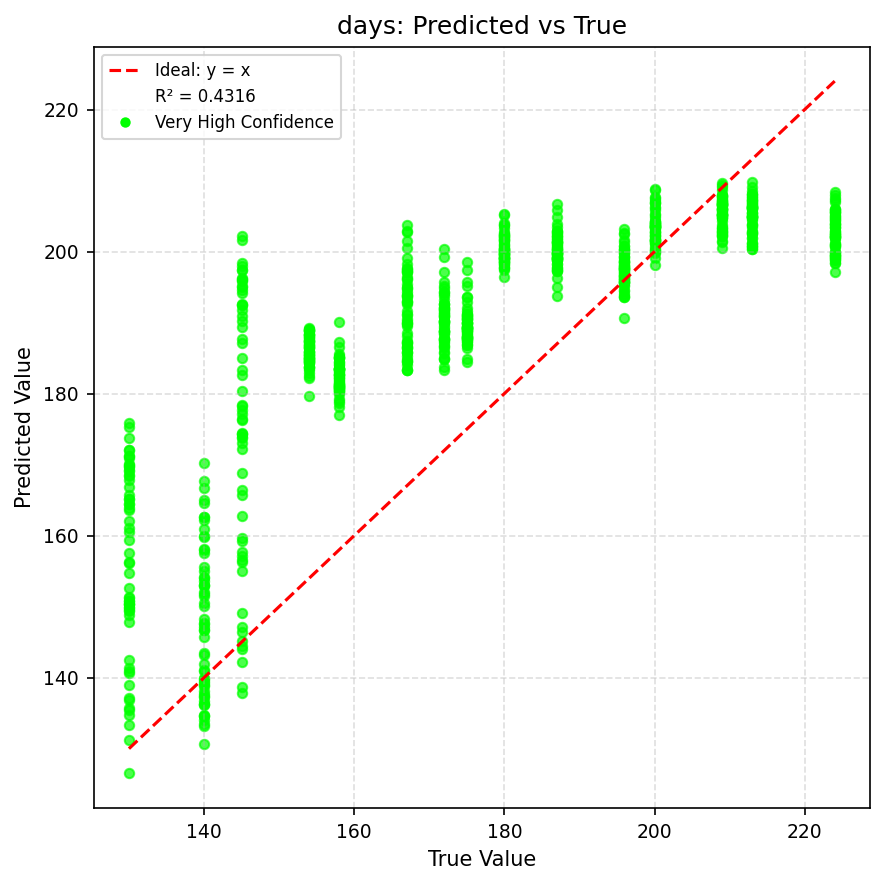


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
52
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_MobileViTV2WheatModel_from4.pth
dataPath:  ./2025_LAI_From4_Raw1.csv
modelTarget:  days
modelBackbone:  MobileViTV2WheatModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 720
Test-Only → Test Batches: 45


Testing: 100%|██████████| 45/45 [00:20<00:00,  2.16it/s]



Test Results:
R² Score : -2.3656
MAE      : 35.1763
RMSE     : 39.3479


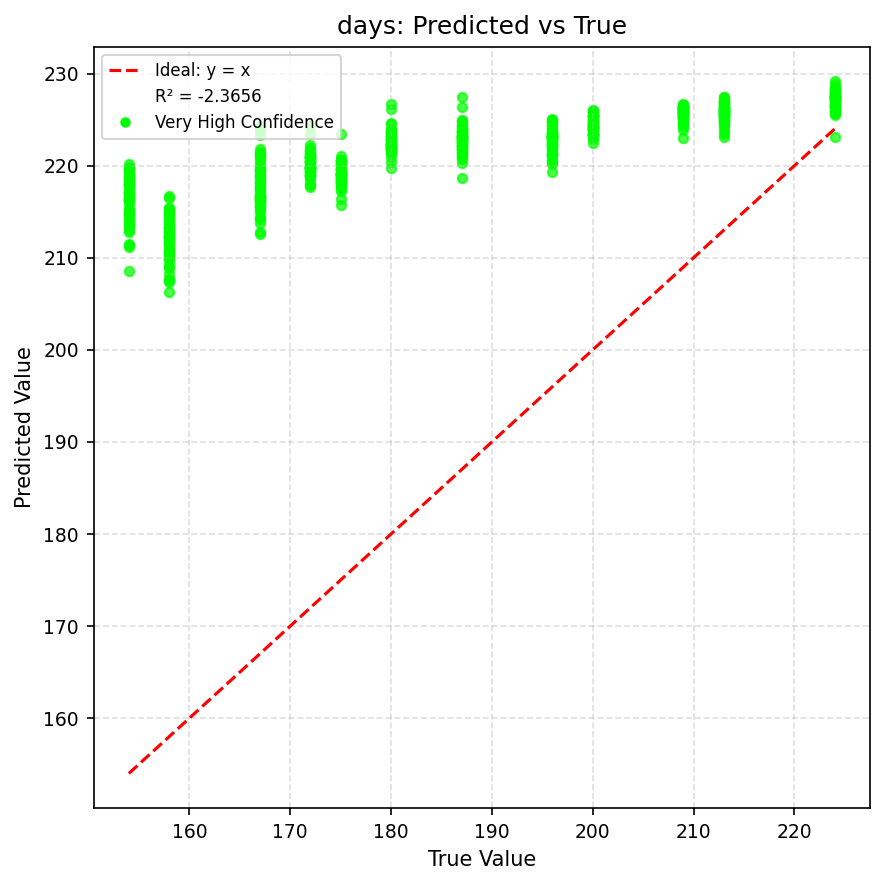


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
53
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_MobileViTV2WheatModel_noERR.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  MobileViTV2WheatModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.61it/s]



Test Results:
R² Score : -31.9177
MAE      : 155.0472
RMSE     : 156.4064


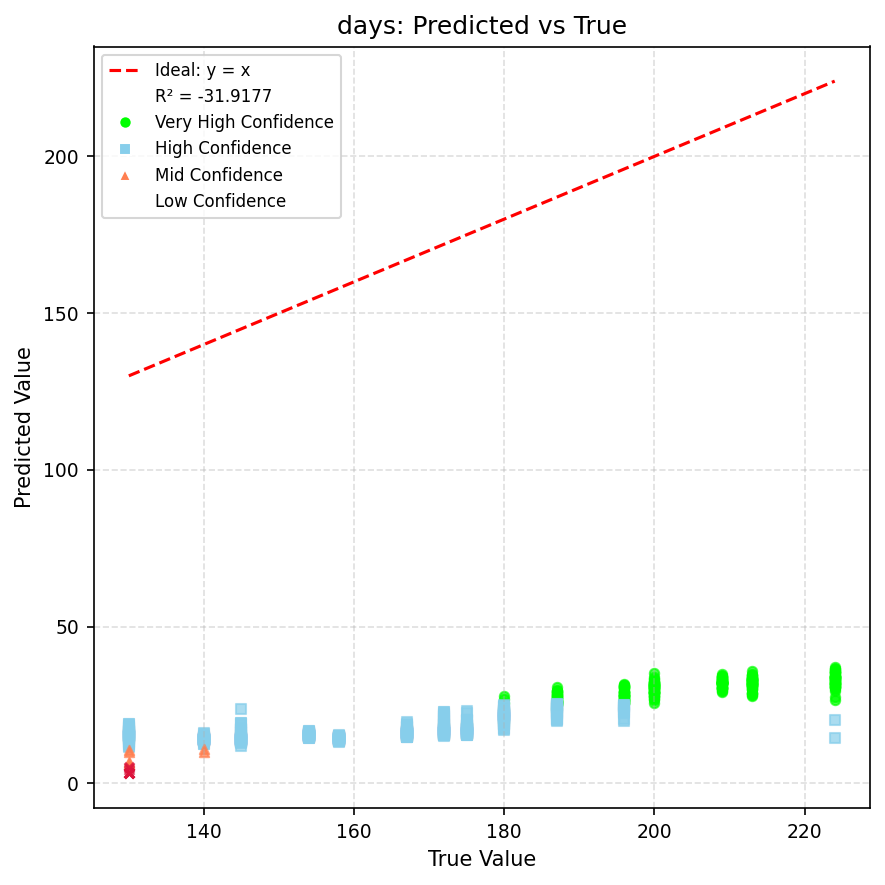


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
54
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_PoolFormerConfidenceModel_from3.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  PoolFormerConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.63it/s]



Test Results:
R² Score : 0.6744
MAE      : 12.0360
RMSE     : 15.5546


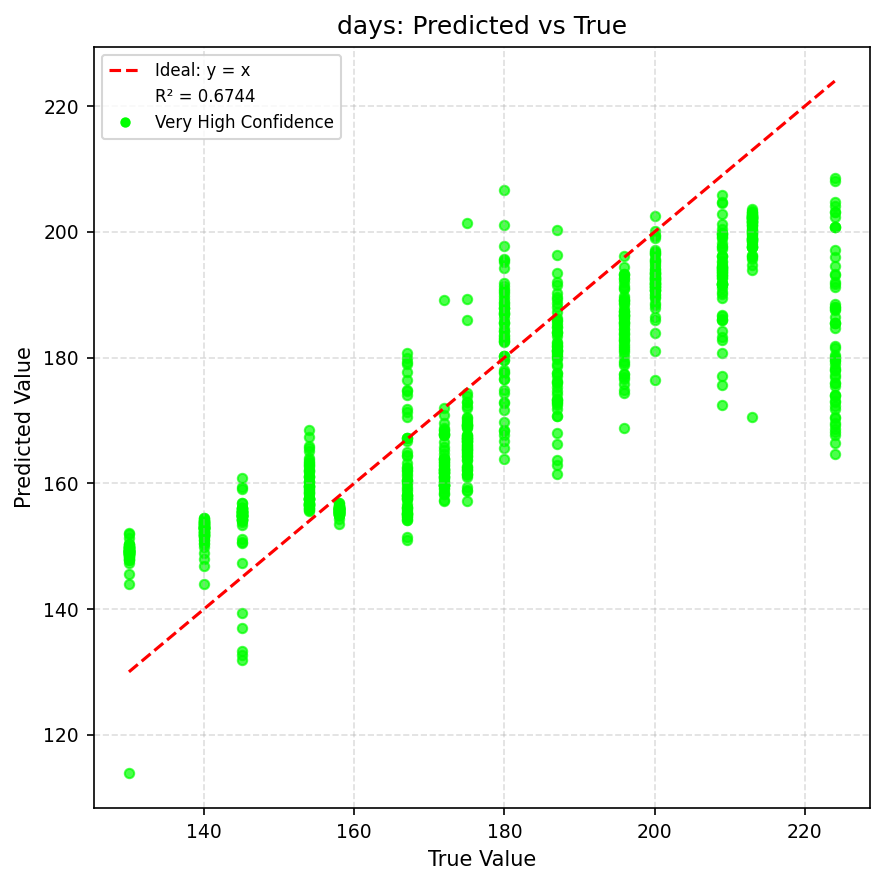


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
55
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_PoolFormerConfidenceModel_from4.pth
dataPath:  ./2025_LAI_From4_Raw1.csv
modelTarget:  days
modelBackbone:  PoolFormerConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 720
Test-Only → Test Batches: 45


Testing: 100%|██████████| 45/45 [00:21<00:00,  2.14it/s]



Test Results:
R² Score : -1.6256
MAE      : 33.0080
RMSE     : 34.7536


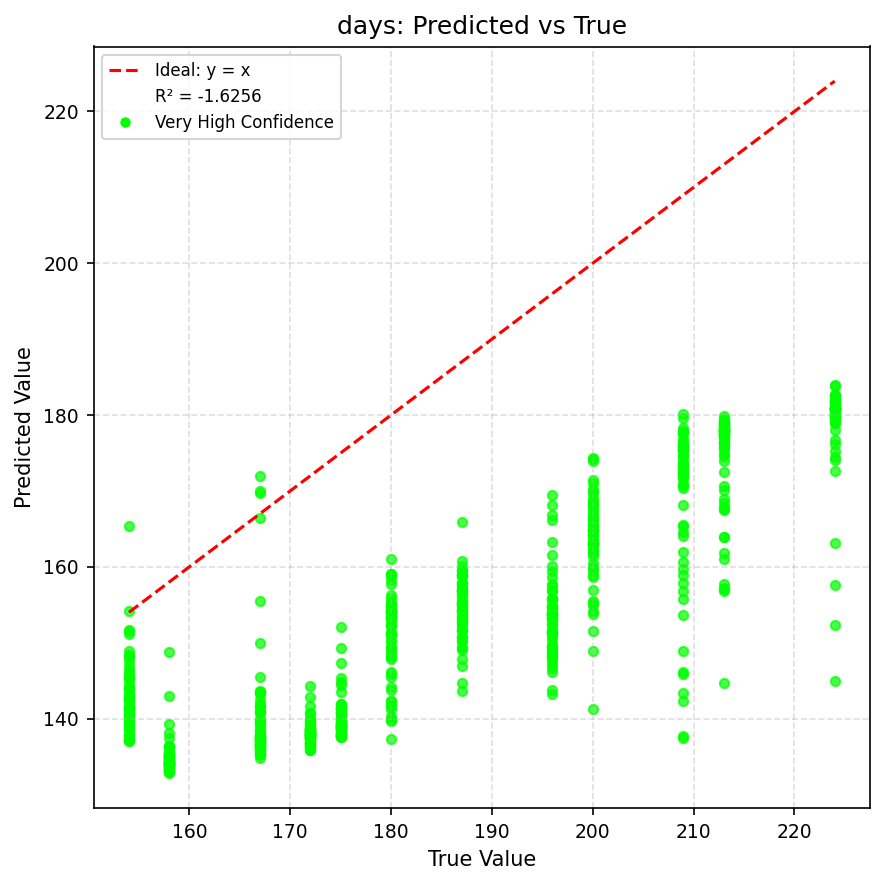


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
56
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_PoolFormerConfidenceModel_noERR.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  PoolFormerConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.63it/s]



Test Results:
R² Score : 0.7860
MAE      : 10.4584
RMSE     : 12.6096


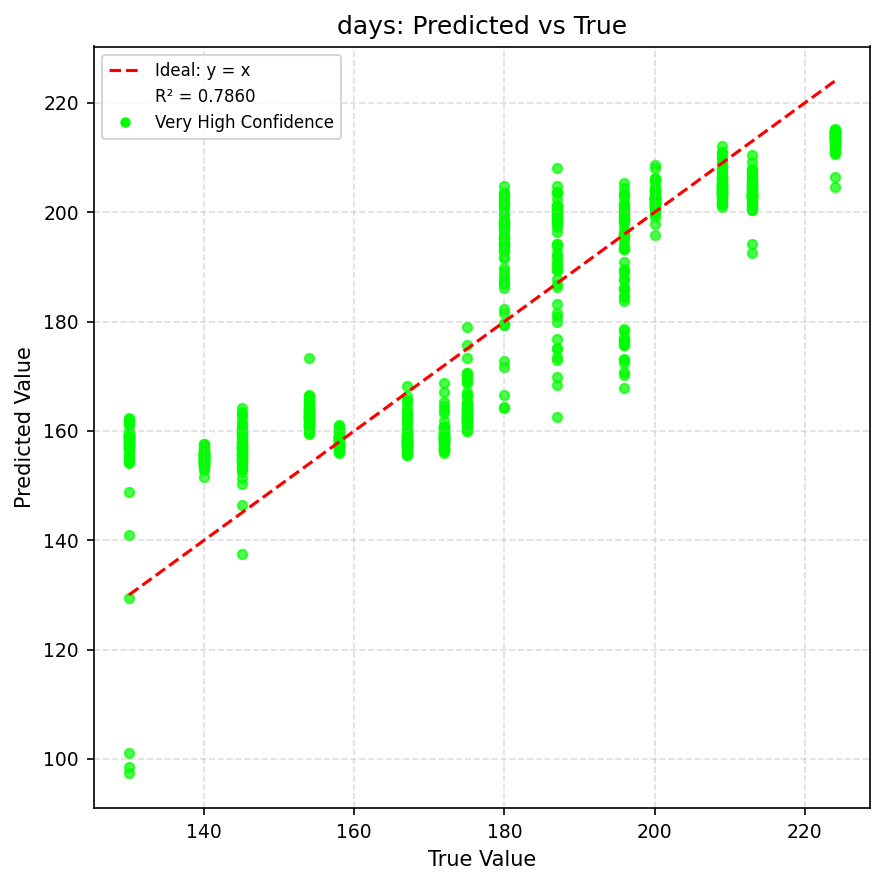


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
57
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_RegNetY8GFModel_from3.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  RegNetY8GFModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:22<00:00,  2.53it/s]



Test Results:
R² Score : 0.5134
MAE      : 15.6386
RMSE     : 19.0171


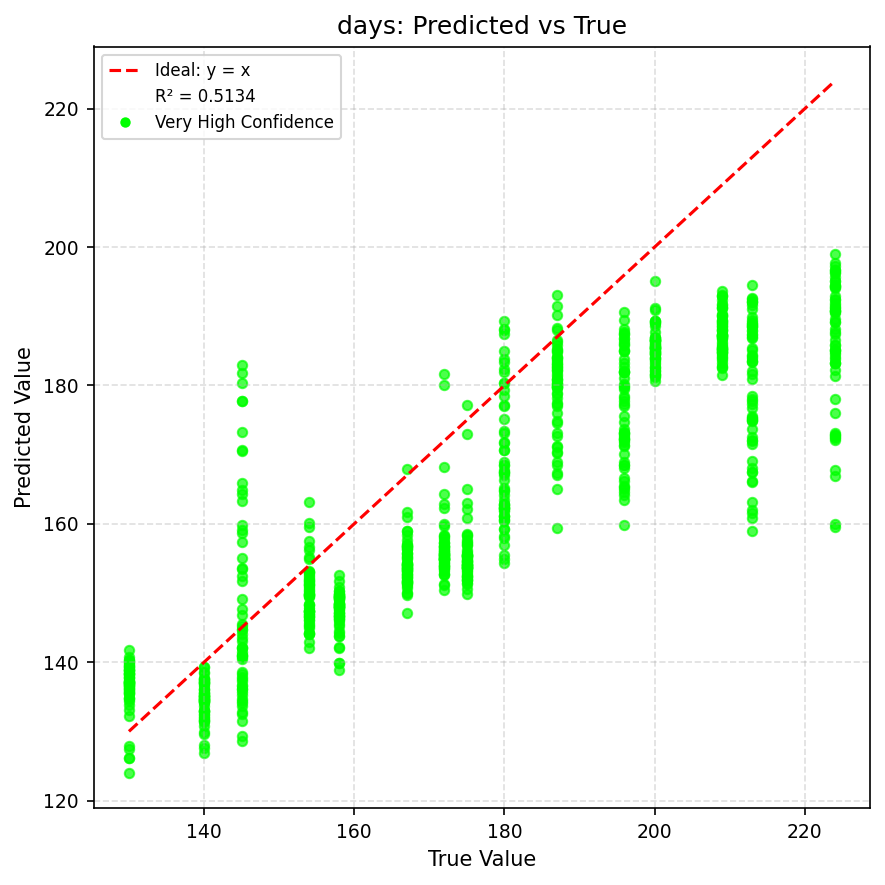


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
58
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_RegNetY8GFModel_from4.pth
dataPath:  ./2025_LAI_From4_Raw1.csv
modelTarget:  days
modelBackbone:  RegNetY8GFModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 720
Test-Only → Test Batches: 45


Testing: 100%|██████████| 45/45 [00:21<00:00,  2.08it/s]



Test Results:
R² Score : -4.7283
MAE      : 50.3166
RMSE     : 51.3336


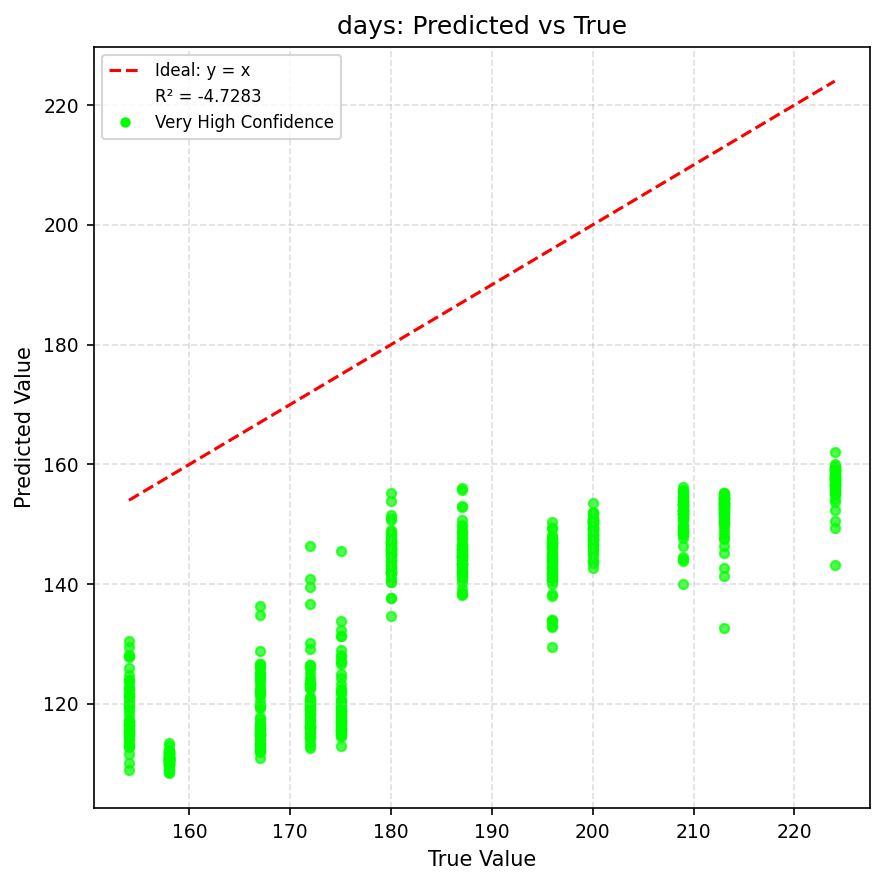


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
59
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_RegNetY8GFModel_noERR.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  RegNetY8GFModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:22<00:00,  2.51it/s]



Test Results:
R² Score : -3.5806
MAE      : 57.1467
RMSE     : 58.3444


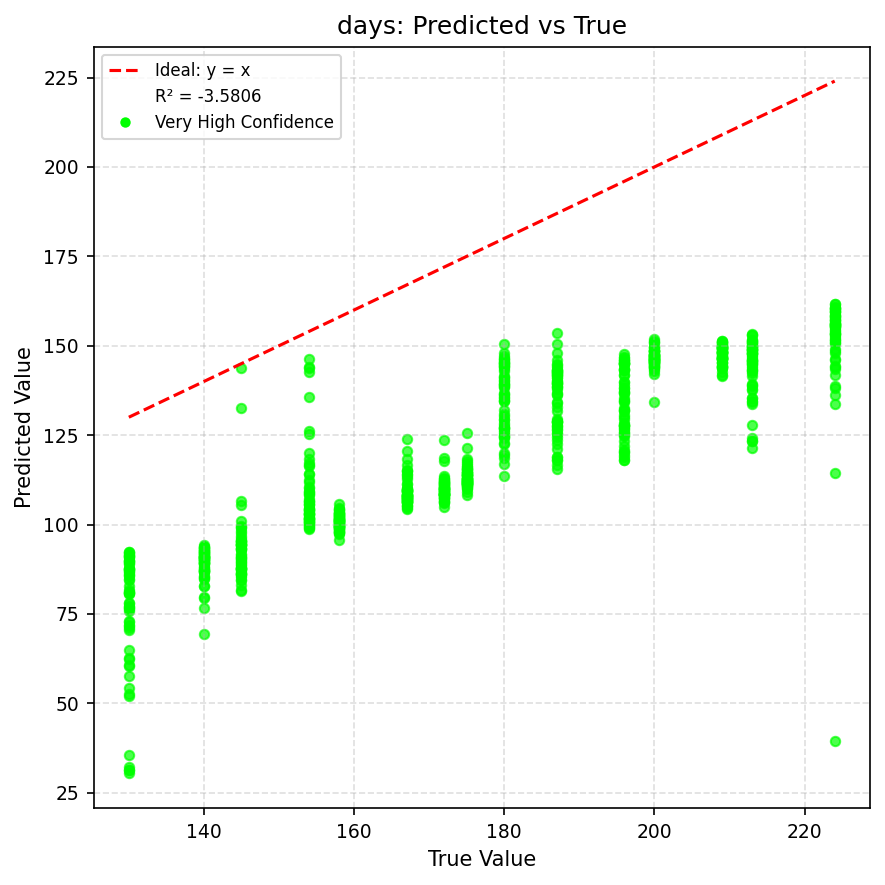


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
60
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_RepVGGB1g4Model_from3.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  RepVGGB1g4Model
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:22<00:00,  2.57it/s]



Test Results:
R² Score : 0.5163
MAE      : 16.8303
RMSE     : 18.9600


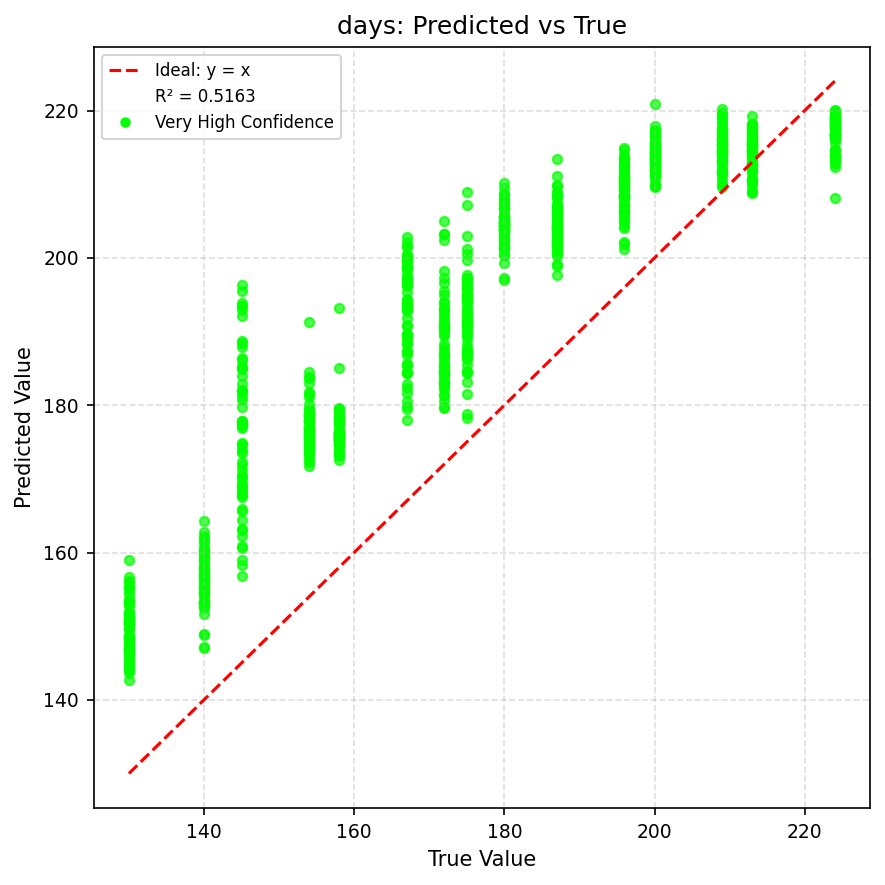


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
61
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_RepVGGB1g4Model_from4.pth
dataPath:  ./2025_LAI_From4_Raw1.csv
modelTarget:  days
modelBackbone:  RepVGGB1g4Model
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 720
Test-Only → Test Batches: 45


Testing: 100%|██████████| 45/45 [00:21<00:00,  2.12it/s]



Test Results:
R² Score : -31.1363
MAE      : 16.5891
RMSE     : 121.5868


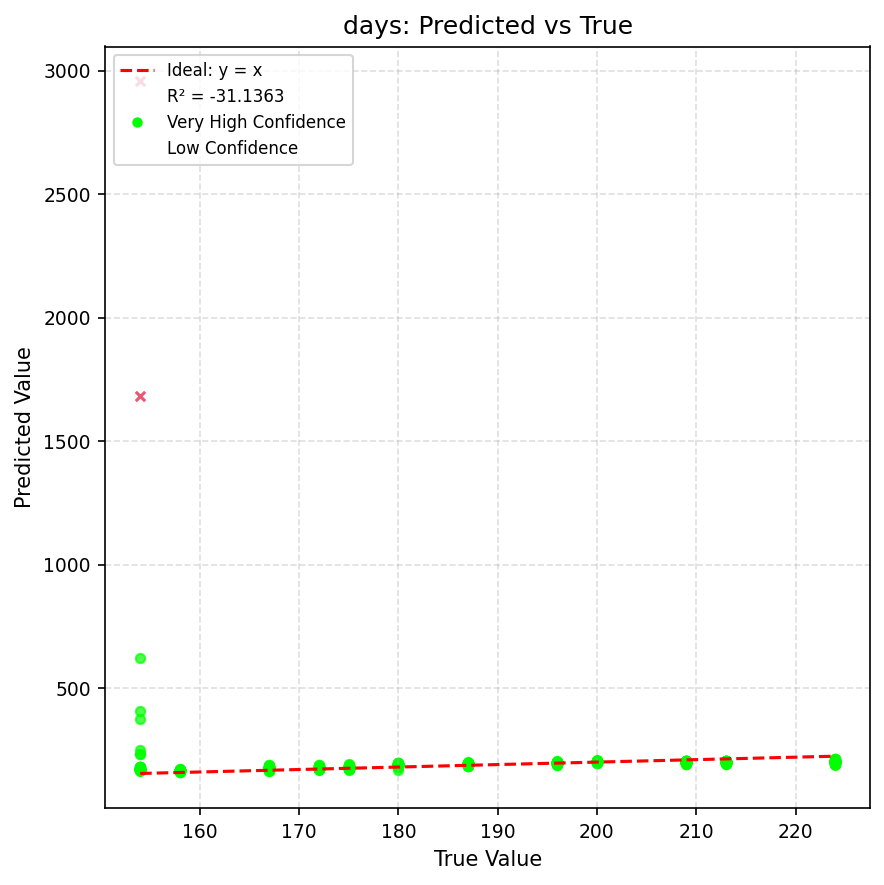


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
62
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_RepVGGB1g4Model_noERR.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  RepVGGB1g4Model
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.61it/s]



Test Results:
R² Score : 0.1572
MAE      : 22.8128
RMSE     : 25.0266


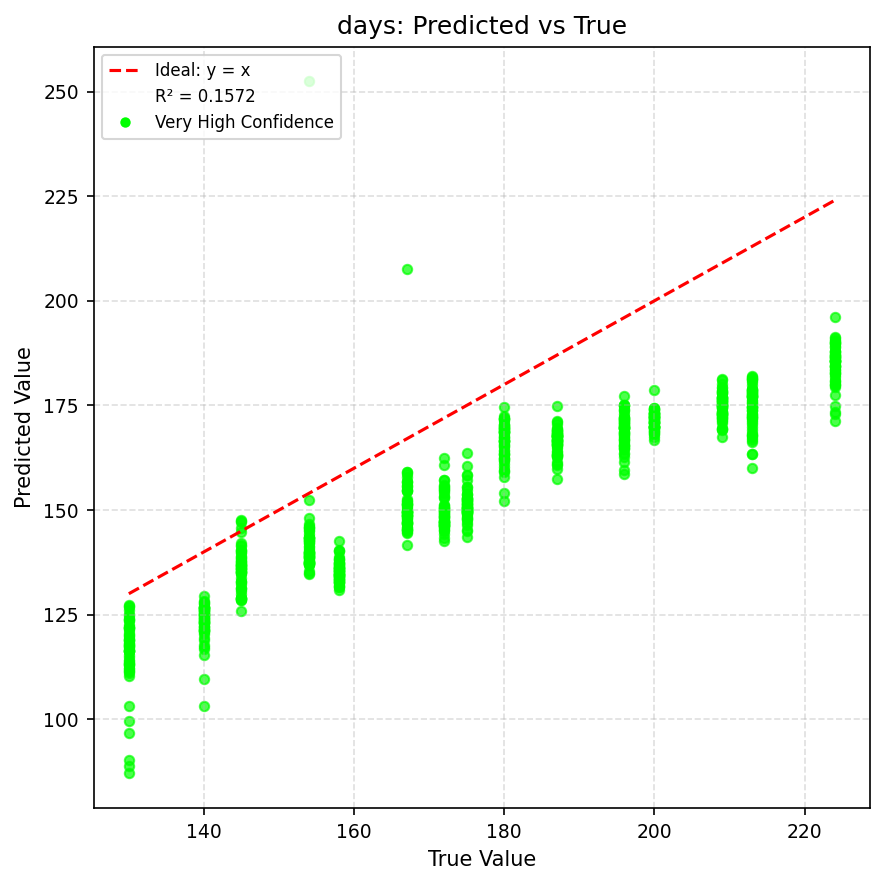


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
63
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_SwinV2ConfidenceModel_from3.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  SwinV2ConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.63it/s]



Test Results:
R² Score : -6.5705
MAE      : 69.8776
RMSE     : 75.0068


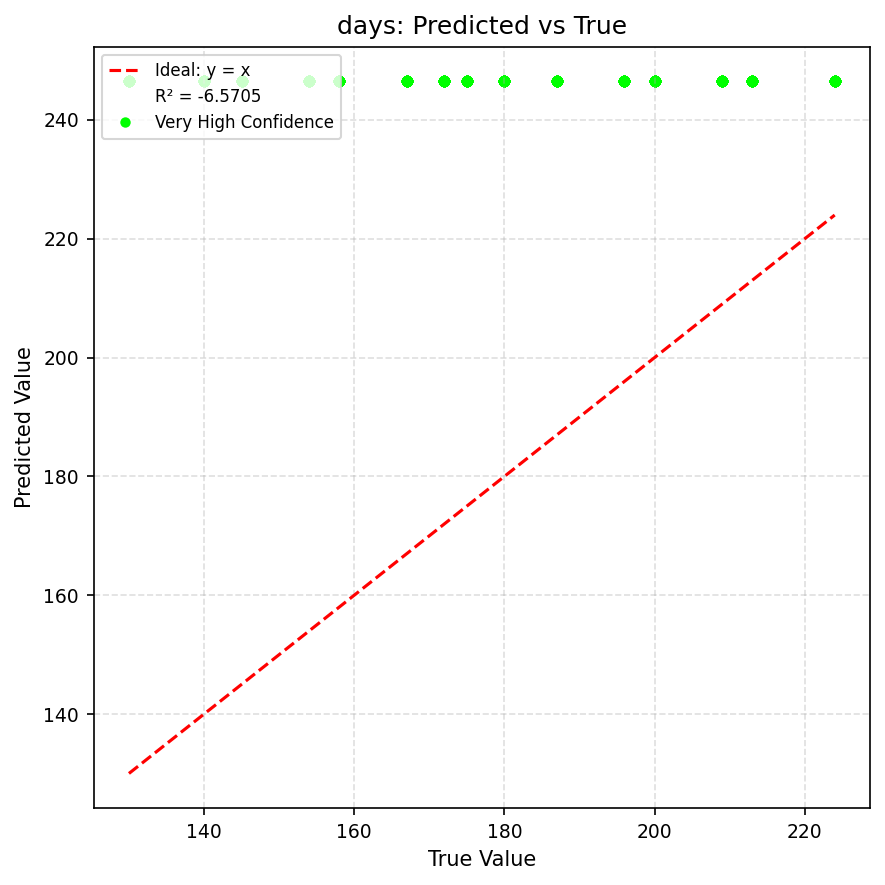


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
64
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_SwinV2ConfidenceModel_from4.pth
dataPath:  ./2025_LAI_From4_Raw1.csv
modelTarget:  days
modelBackbone:  SwinV2ConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 720
Test-Only → Test Batches: 45


Testing: 100%|██████████| 45/45 [00:20<00:00,  2.17it/s]



Test Results:
R² Score : -0.5746
MAE      : 24.6997
RMSE     : 26.9137


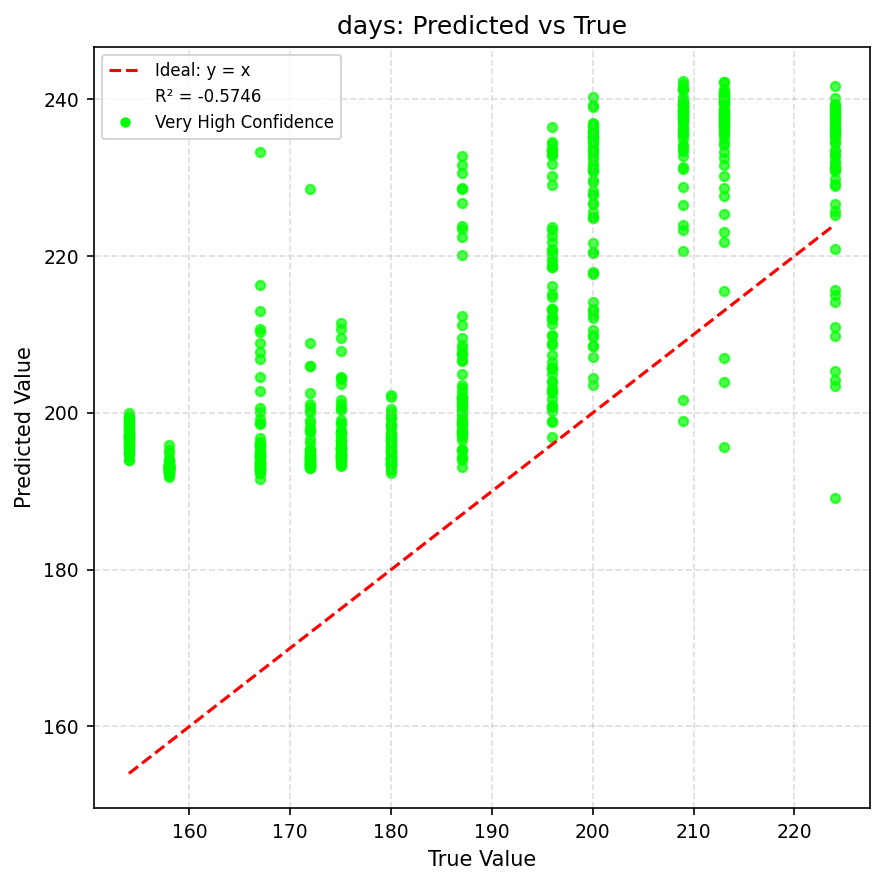


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
65
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/days_SwinV2ConfidenceModel_noERR.pth
dataPath:  ./2025_SPAD_Raw1.csv
modelTarget:  days
modelBackbone:  SwinV2ConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 900
Test-Only → Test Batches: 57


Testing: 100%|██████████| 57/57 [00:21<00:00,  2.62it/s]



Test Results:
R² Score : -1.1438
MAE      : 36.0230
RMSE     : 39.9143


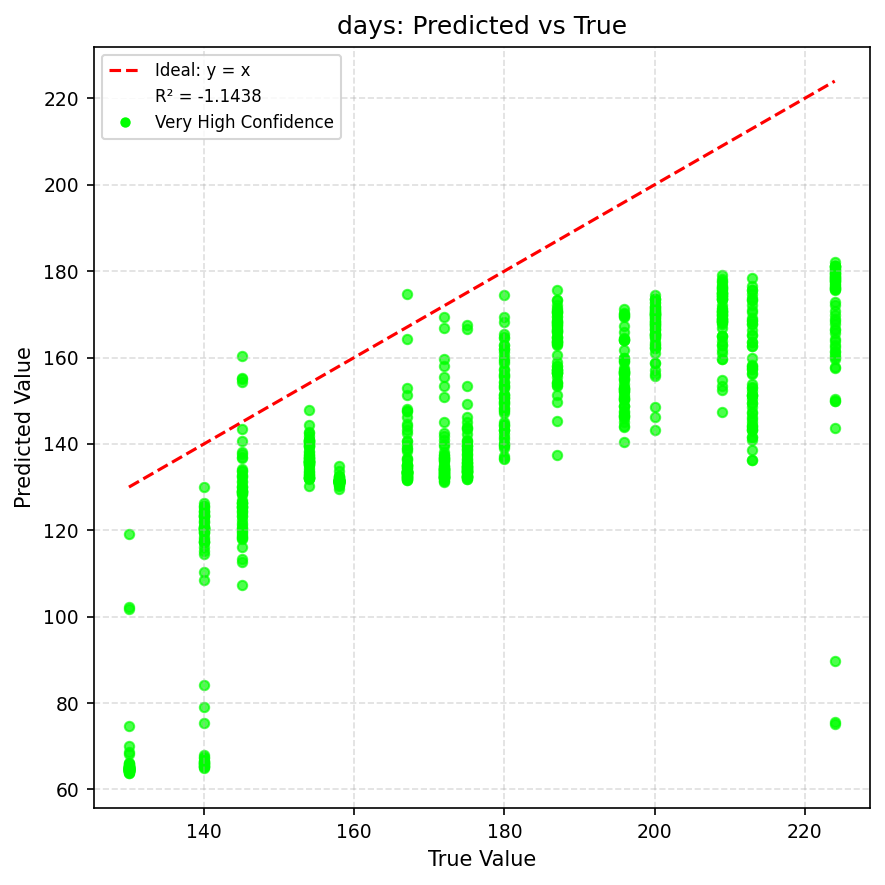


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
66
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/totEarNum_CoAtNetConfidenceModel_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  CoAtNetConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing: 100%|██████████| 60/60 [00:22<00:00,  2.68it/s]



Test Results:
R² Score : -4.8073
MAE      : 173.6696
RMSE     : 199.2031


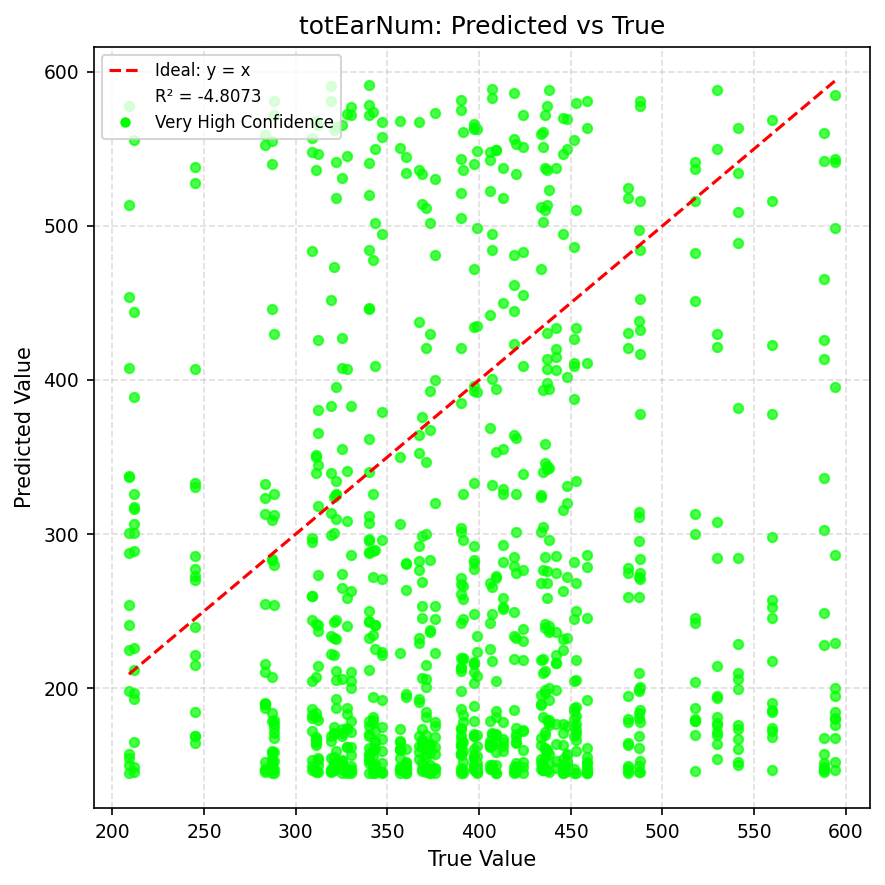


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
67
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/totEarNum_ConvNeXtTinyWheatModelWithConfidence_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  ConvNeXtTinyWheatModelWithConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing: 100%|██████████| 60/60 [00:22<00:00,  2.70it/s]



Test Results:
R² Score : -0.3590
MAE      : 75.2310
RMSE     : 96.3667


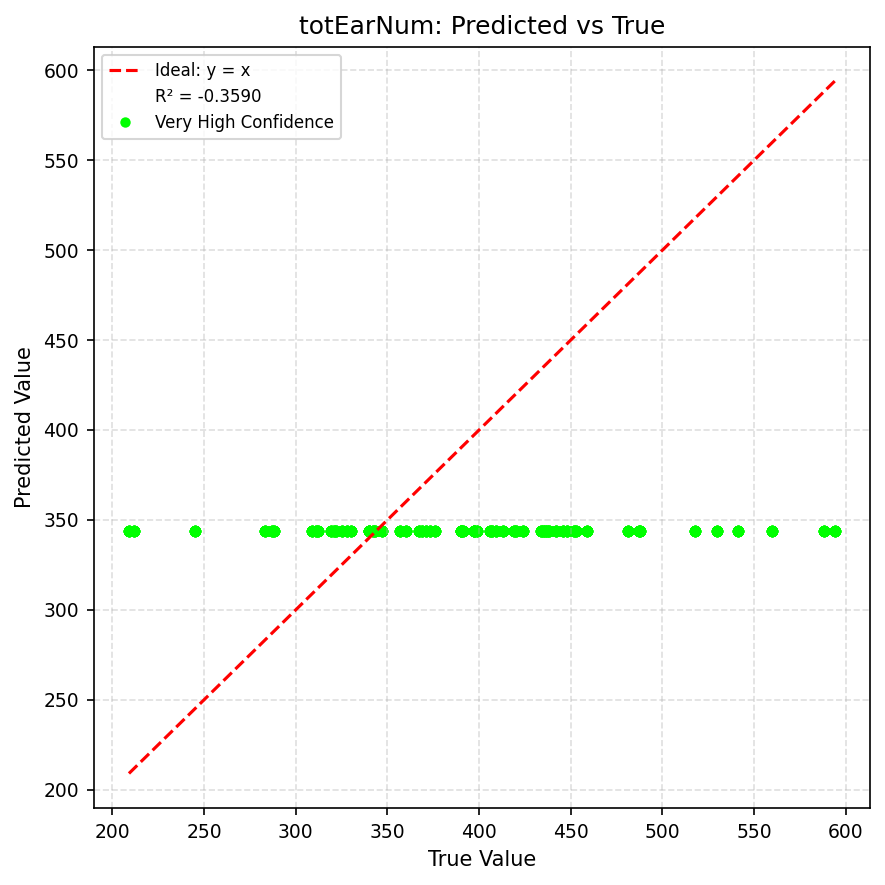


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
68
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/totEarNum_DenseNet121WheatModel_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  DenseNet121WheatModel
Using device: cuda


c:\Users\Crop2024_GA\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Crop2024_GA\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing: 100%|██████████| 60/60 [00:21<00:00,  2.76it/s]



Test Results:
R² Score : -3.8013
MAE      : 153.8932
RMSE     : 181.1294


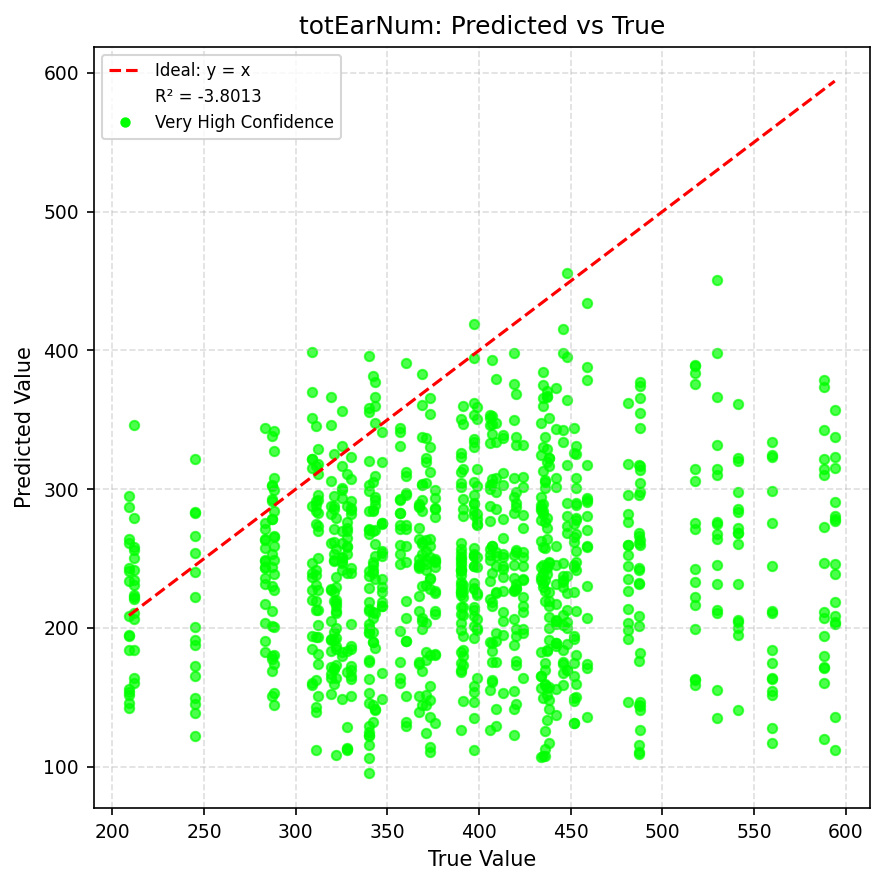


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
69
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/totEarNum_EfficientFormerConfidenceModel_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  EfficientFormerConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing: 100%|██████████| 60/60 [00:21<00:00,  2.77it/s]



Test Results:
R² Score : -122.9886
MAE      : 165.3586
RMSE     : 920.4518


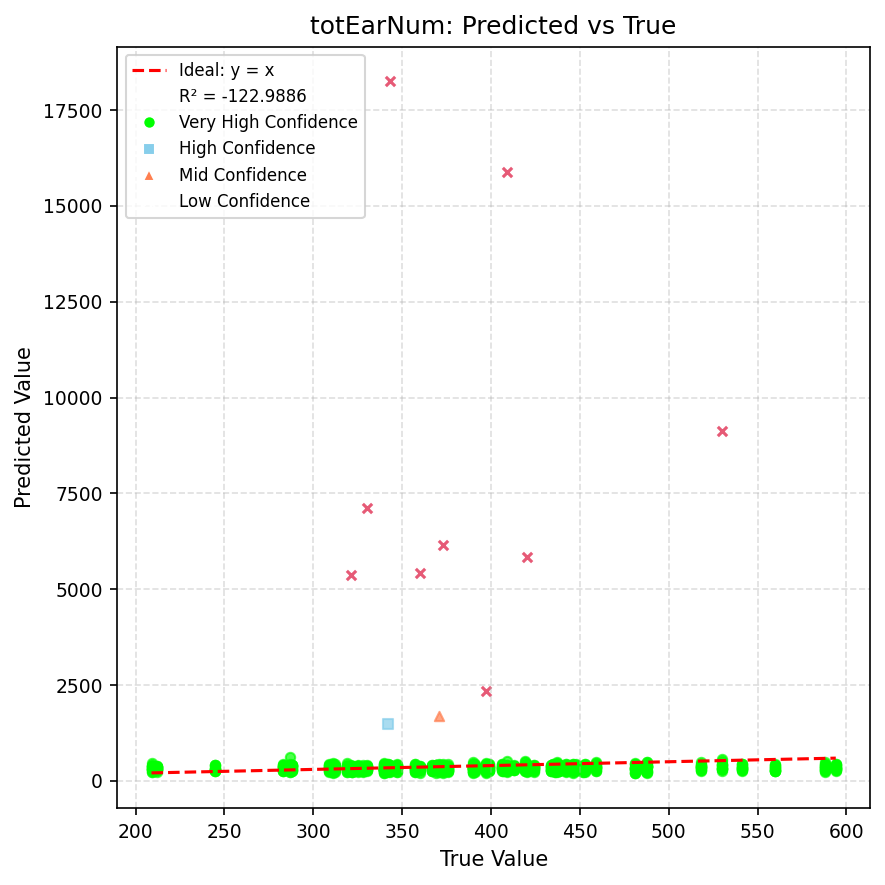


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
70
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/totEarNum_EfficientNetV2MWheatModelWithConfidence_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  EfficientNetV2MWheatModelWithConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing: 100%|██████████| 60/60 [00:21<00:00,  2.76it/s]



Test Results:
R² Score : -0.8341
MAE      : 88.8059
RMSE     : 111.9488


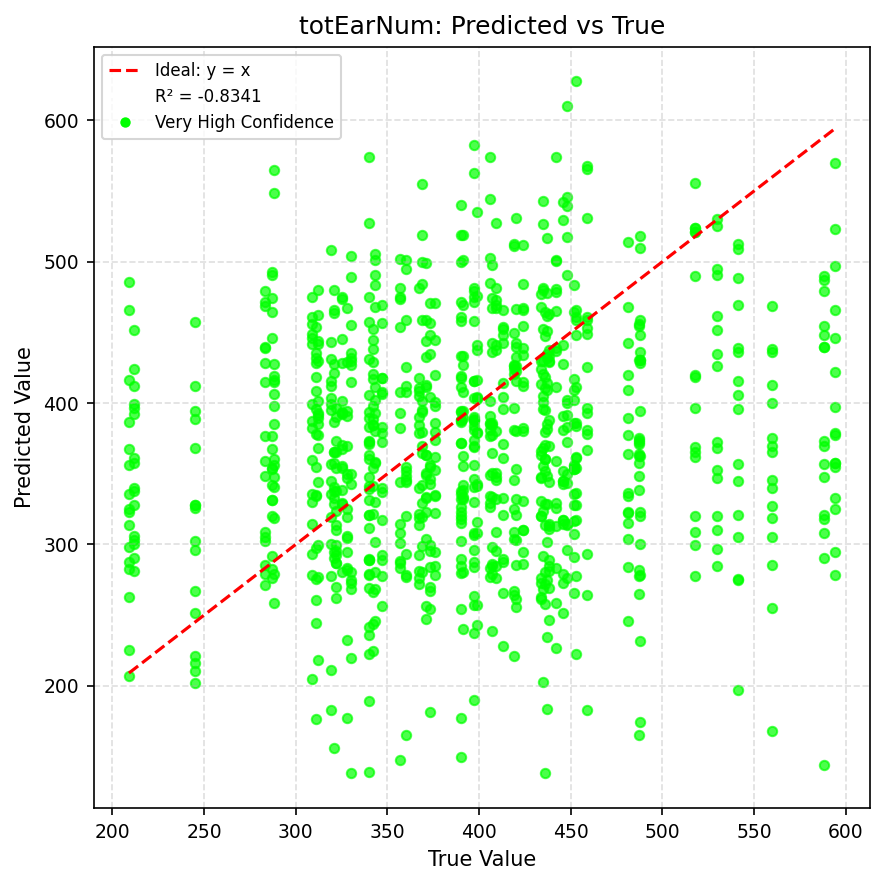


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
71
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/totEarNum_FocalNetConfidenceModel_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  FocalNetConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing: 100%|██████████| 60/60 [00:21<00:00,  2.75it/s]



Test Results:
R² Score : -2.9421
MAE      : 132.0022
RMSE     : 164.1257


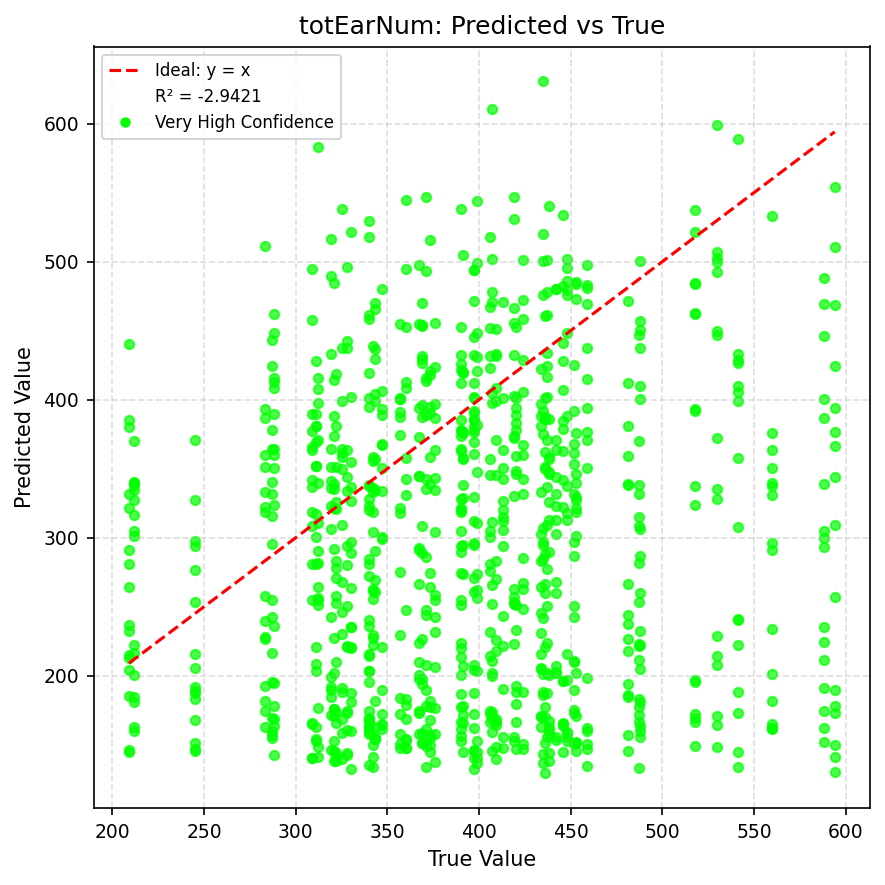


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
72
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/totEarNum_MaxViTConfidenceModel_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  MaxViTConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing: 100%|██████████| 60/60 [00:21<00:00,  2.77it/s]



Test Results:
R² Score : -1.5178
MAE      : 104.0752
RMSE     : 131.1665


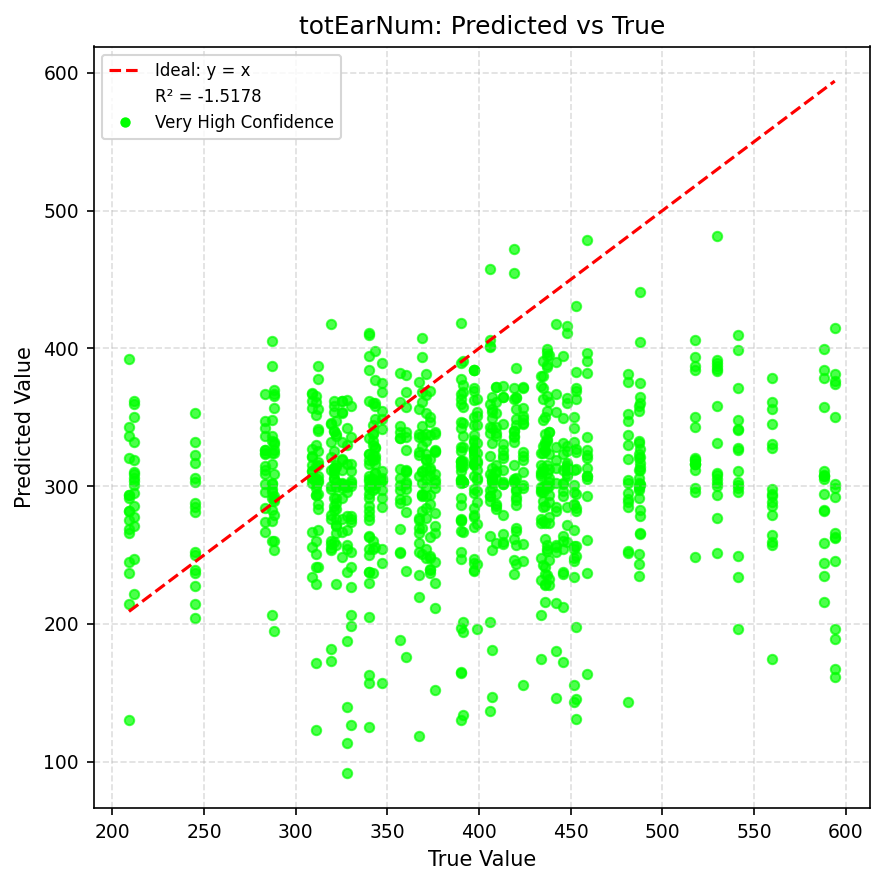


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
73
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/totEarNum_MobileOneConfidence_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  MobileOneConfidence
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing: 100%|██████████| 60/60 [00:21<00:00,  2.75it/s]



Test Results:
R² Score : -1.7853
MAE      : 112.8920
RMSE     : 137.9576


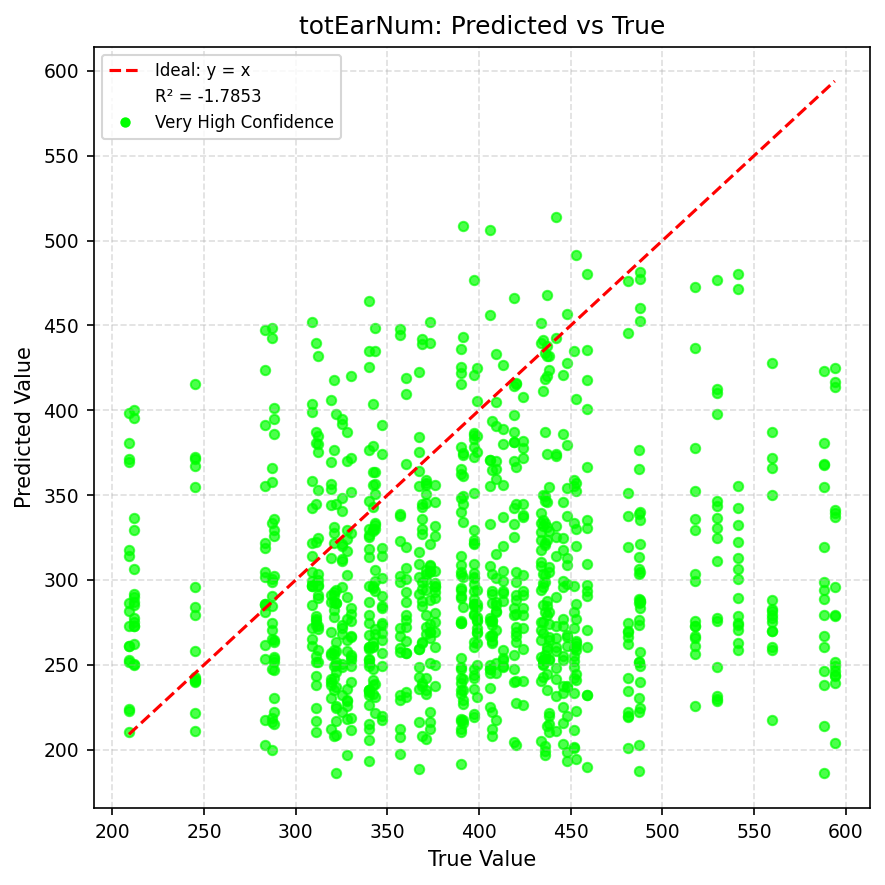


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
74
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/totEarNum_MobileViTV2WheatModel_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  MobileViTV2WheatModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing: 100%|██████████| 60/60 [00:22<00:00,  2.68it/s]



Test Results:
R² Score : -5.5859
MAE      : 187.5148
RMSE     : 212.1374


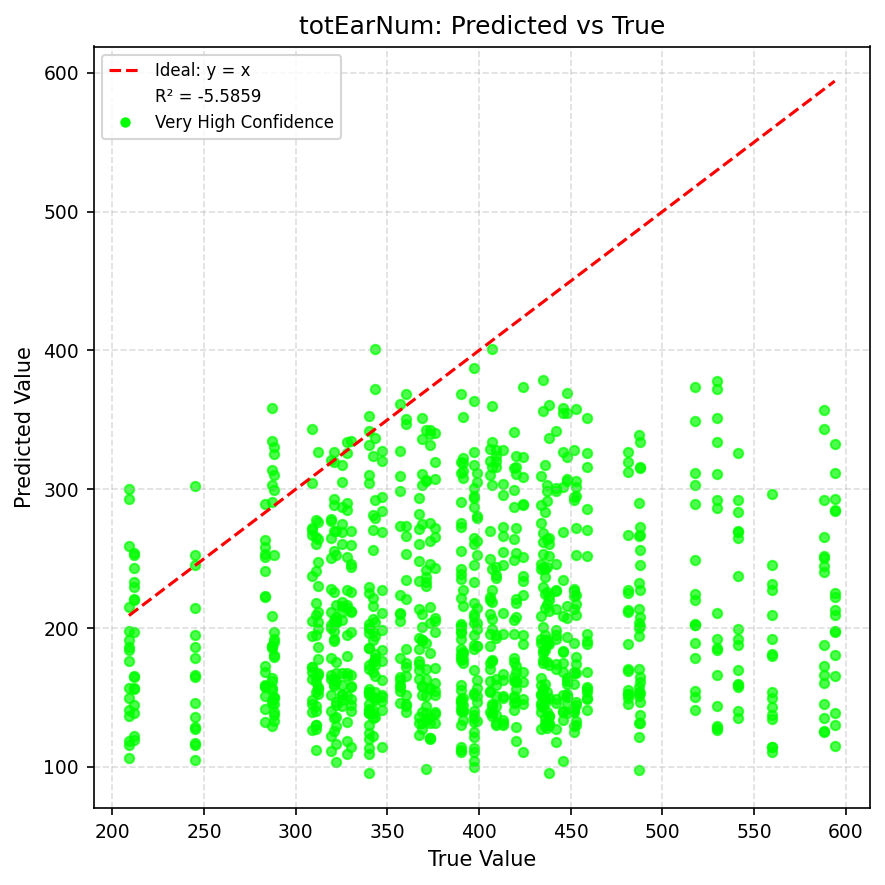


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
75
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/totEarNum_PoolFormerConfidenceModel_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  PoolFormerConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing: 100%|██████████| 60/60 [00:21<00:00,  2.74it/s]



Test Results:
R² Score : -1.2964
MAE      : 99.7717
RMSE     : 125.2663


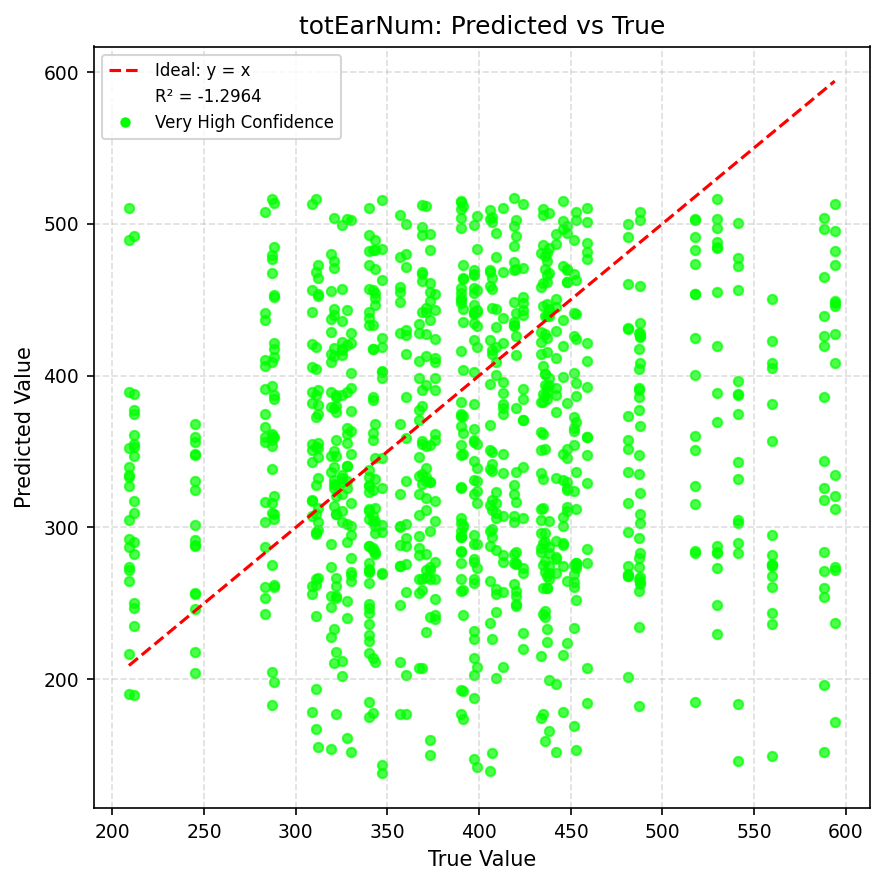


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
76
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/totEarNum_RegNetY8GFModel_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  RegNetY8GFModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing: 100%|██████████| 60/60 [00:22<00:00,  2.62it/s]



Test Results:
R² Score : -3.0741
MAE      : 132.0468
RMSE     : 166.8492


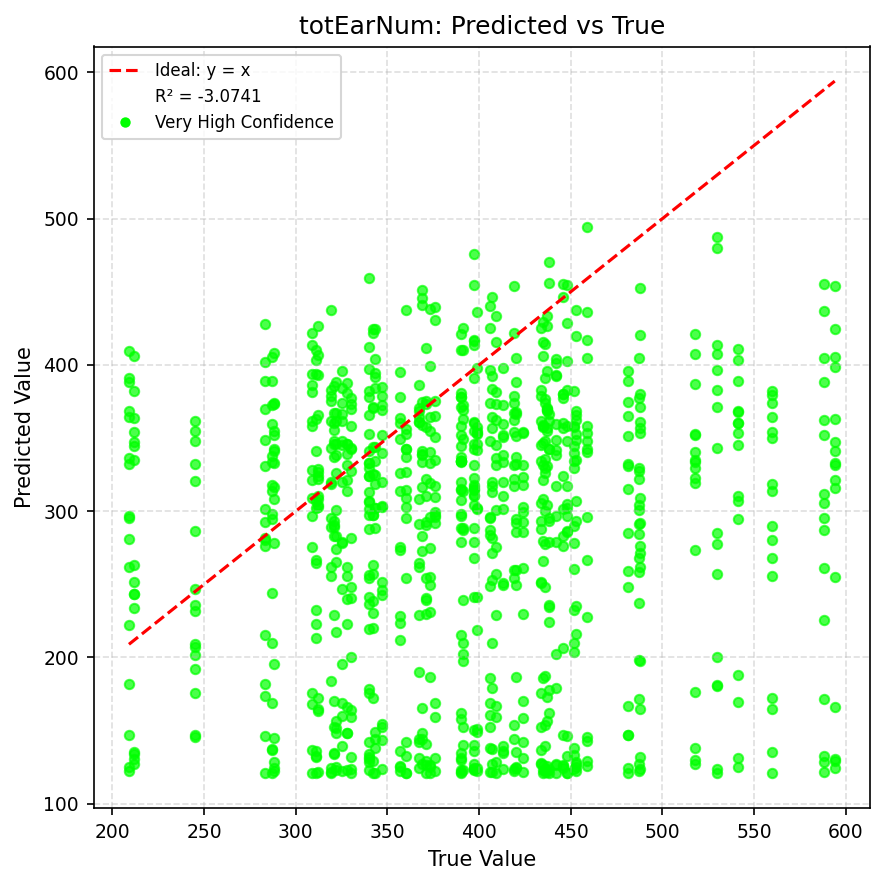


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
77
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/totEarNum_RepVGGB1g4Model_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  RepVGGB1g4Model
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing: 100%|██████████| 60/60 [00:22<00:00,  2.71it/s]



Test Results:
R² Score : -1.3584
MAE      : 100.0864
RMSE     : 126.9453


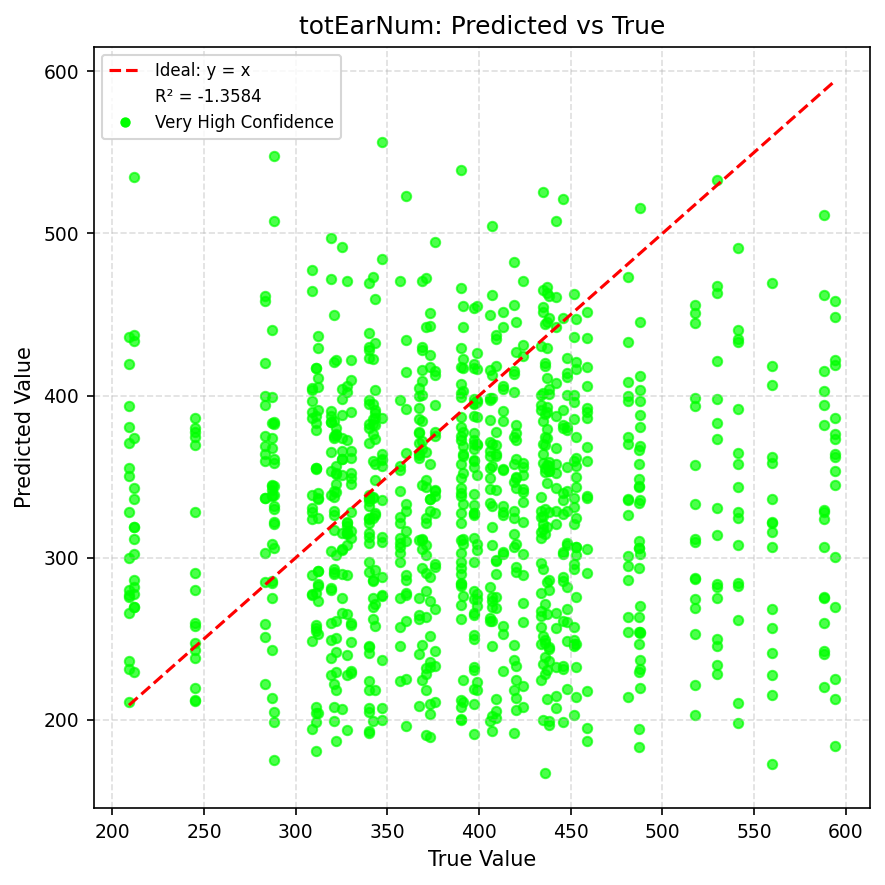


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv
78
modelPath:  H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/totEarNum_SwinV2ConfidenceModel_raw1.pth
dataPath:  ./2025_totEarNum_day_Raw1.csv
modelTarget:  totEarNum
modelBackbone:  SwinV2ConfidenceModel
Using device: cuda
✅ Loaded Test-Only Dataset → Total Samples: 960
Test-Only → Test Batches: 60


Testing: 100%|██████████| 60/60 [00:21<00:00,  2.75it/s]



Test Results:
R² Score : -3.0751
MAE      : 136.0252
RMSE     : 166.8704


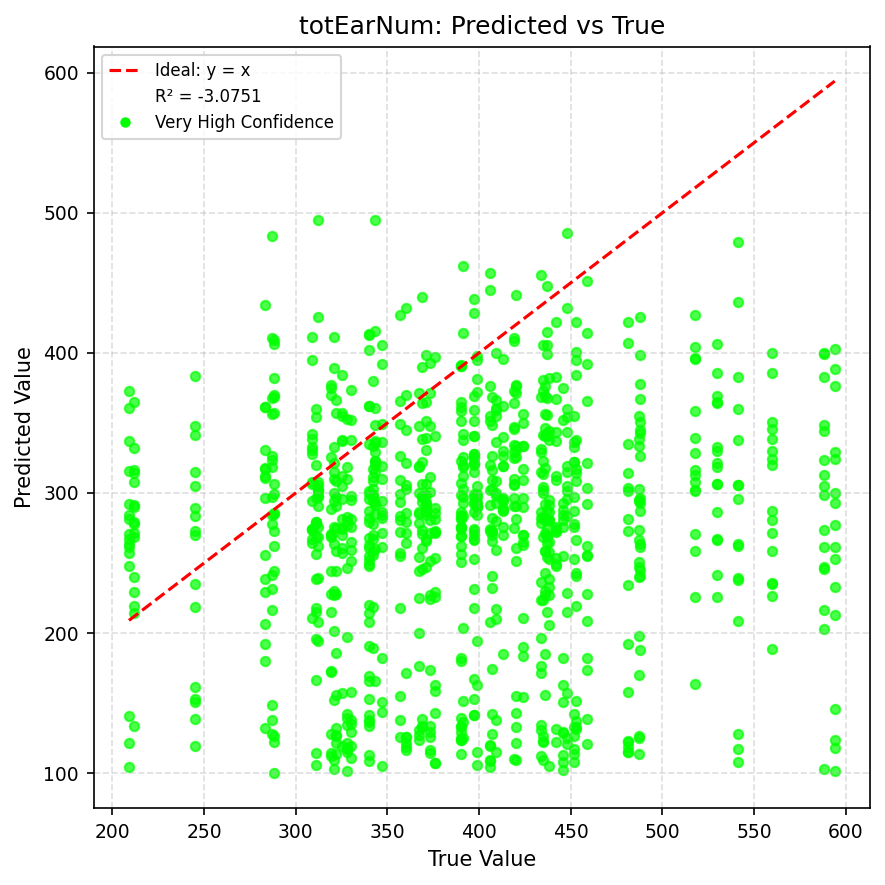


✅ Test results saved to: ./ModelTestResult/NoExtraInputModel/growthPredictions/all_test_metrics_growth.csv


In [8]:
loopTestModelNoExtraByPath("H:/MasterProj/Model_Creation/TraitPredictionModel/allModel/")
# loopTestModelExtraInputByPath("/Volumes/PortableSSD/MasterProj/Model_Creation/TraitPredictionModel/allModelExtraInput/")